Here we'll first be loading the FC matrices and explore their structure

In [1]:
#using read_dataset from Datasets/FC/create_dataset.py to read the dataset
from Datasets.FC.create_dataset import read_dataset

In [2]:
dataset = read_dataset()

In [3]:
#ok, let's explore the data a bit more
#dataset is a list object of torch_geometric.data objects

#let's see the first element
print(dataset[0])

#it's a dictionary object, let's see the keys
print(dataset[0].keys())

#ok, let's see the values
print(dataset[0].values())

#it has 4 keys, 'x', 'edge_index', 'edge_attr' and 'y' where y=0 menas the patient is healthy and y=1 means the patient has Autism Spectrum Disorder (ASD)
"""graph = Data(x=ROI.reshape(-1,116).float(),
                     edge_index=G.indices().reshape(2,-1).long(),
                     edge_attr=G.values().reshape(-1,1).float(),
                     y=y.long())"""

#how much data do we have?
len(dataset)


Data(x=[116, 116], edge_index=[2, 1016], edge_attr=[1016, 1], y=[1])
['edge_attr', 'x', 'edge_index', 'y']
ValuesView({'x': tensor([[ 0.0000,  0.4543,  0.2477,  ...,  0.1753,  0.2247, -0.1751],
        [ 0.4543,  0.0000, -0.2204,  ..., -0.1947, -0.2258, -0.1434],
        [ 0.2477, -0.2204,  0.0000,  ..., -0.0521, -0.0804, -0.2025],
        ...,
        [ 0.1753, -0.1947, -0.0521,  ...,  0.0000,  0.6875, -0.1364],
        [ 0.2247, -0.2258, -0.0804,  ...,  0.6875,  0.0000,  0.0929],
        [-0.1751, -0.1434, -0.2025,  ..., -0.1364,  0.0929,  0.0000]]), 'edge_index': tensor([[  0,   0,   0,  ..., 114, 115, 115],
        [  1,  10,  12,  ..., 113,  94, 109]]), 'edge_attr': tensor([[0.4543],
        [0.5913],
        [0.4224],
        ...,
        [0.6875],
        [0.4846],
        [0.5437]]), 'y': tensor([0])})


1099

In [4]:
#set the seed
import torch
torch.manual_seed(0)

DATASET = "FC"

MODEL = "GIN"
from models.models_FC import GIN_framework as framework # import the model
gnn = framework(dataset)

MODELbis = "GINbis"
from models.models_FC import GIN_framework_bis as framework # import the model
gnnbis = framework(dataset)

MODELtri = "GINtri"
from models.models_FC import GIN_framework_tri as framework # import the model
gnntri = framework(dataset)

MODEL2 = "GIN2"
from models.models_FC import GIN_framework2 as framework2 # import the model
gnn2 = framework2(dataset)

MODEL3 = "GIN3"
from models.models_FC import GIN_framework3 as framework3 # import the model
gnn3 = framework3(dataset)

/home/tpelletreaudur/.local/lib/python3.10/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
/home/tpelletreaudur/.local/lib/python3.10/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
/home/tpelletreaudur/.local/lib/python3.10/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
/home/tpelletreaudur/.local/lib/python3.10/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
/home/tpelletreaudur/.local/lib/python3.10/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [6]:
# gnn.iterate()

In [7]:
# gnnbis.iterate()

In [8]:
# gnntri.iterate()

In [9]:
# gnn2.iterate()

In [10]:
# gnn3.iterate()

In [11]:
# gnn3.cross_validate()

In [ ]:
#gnn.train()

In [9]:
#save the model 
# gnn.save_model(path="models/"+DATASET+"_"+MODEL+"server.pt")

# gnnbis.save_model(path="models/"+DATASET+"_"+MODELbis+"server.pt")

# gnntri.save_model(path="models/"+DATASET+"_"+MODELtri+"server.pt")

# gnn2.save_model(path="models/"+DATASET+"_"+MODEL2+"server.pt")

# gnn3.save_model(path="models/"+DATASET+"_"+MODEL3+"server.pt")

Model saved in: models/FC_GINserver.pt
Model saved in: models/FC_GINbisserver.pt
Model saved in: models/FC_GINtriserver.pt
Model saved in: models/FC_GIN3server.pt


In [5]:
#load the model
gnn.load_model(path="models/"+DATASET+"_"+MODEL+"server.pt", map_location=torch.device('cpu'))

gnn2.load_model(path="models/"+DATASET+"_"+MODEL2+"server.pt", map_location=torch.device('cpu'))

gnn3.load_model(path="models/"+DATASET+"_"+MODEL3+"server.pt", map_location=torch.device('cpu'))

gnnbis.load_model(path="models/"+DATASET+"_"+MODELbis+"server.pt", map_location=torch.device('cpu'))

gnntri.load_model(path="models/"+DATASET+"_"+MODELtri+"server.pt", map_location=torch.device('cpu'))

In [6]:
gnn.evaluate()

Test Loss: 1.936, Train Acc: 0.980 Test Acc: 0.527


In [7]:
gnnbis.evaluate()

Test Loss: 1.564, Train Acc: 0.999 Test Acc: 0.491


In [8]:
gnntri.evaluate()

Test Loss: 2.461, Train Acc: 1.000 Test Acc: 0.582


In [9]:
gnn2.evaluate()

Test Loss: 1.510, Train Acc: 0.482 Test Acc: 0.505


In [10]:
gnn3.evaluate()

Accuracy: 0.527, Loss: 1.743


In [13]:
from torch_geometric.data import DataLoader
test_loader = DataLoader(dataset[gnn.test_idx], batch_size=1, shuffle=False)

gnn3.evaluate2(test_loader)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\tomdu\miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\tomdu\AppData\Local\Temp\ipykernel_15308\2147926338.py", line 2, in <module>
    test_loader = DataLoader(dataset[gnn.test_idx], batch_size=1, shuffle=False)
TypeError: only integer tensors of a single element can be converted to an index

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\tomdu\miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "c:\Users\tomdu\miniconda3\lib\site-packages\IPython\core\ultratb.py", line 1428, in structured_traceback
    return FormattedTB.structured_traceback(
  File "c:\Users\tomdu\miniconda3\lib\site-packages\IPython\core\ultratb.py", line 1319, in structured_traceback
   

In [11]:
train_features, test_features = gnn.evaluate_with_features2()

In [12]:
print(len(train_features[0]))
len(train_features), len(test_features)

9


(1044, 55)

In [18]:
import networkx as nx
def calculate_avg_path_length(G):
    if nx.is_connected(G):
        return nx.average_shortest_path_length(G)
    else:
        # Alternative metrics for disconnected graphs
        # Option 1: Use the average path length of the largest connected component
        components = [G.subgraph(c).copy() for c in nx.connected_components(G)]
        largest_component = max(components, key=len)
        return nx.average_shortest_path_length(largest_component)
    

def compute_graph_properties(data):
    properties = []
    for graph_data in data:
        G = nx.from_edgelist(graph_data.edge_index.t().tolist())
        num_nodes = G.number_of_nodes()
        num_edges = G.number_of_edges()
        density = nx.density(G)
        avg_path_len = calculate_avg_path_length(G)
        num_cliques = len(list(nx.find_cliques(G)))
        num_triangles = sum(nx.triangles(G).values()) / 3
        num_squares = sum(nx.square_clustering(G).values()) / 4
        number_of_node_in_the_largest_fully_connected_component = len(max(nx.connected_components(G), key=len))
        #small_world = nx.algorithms.smallworld.sigma(G)

        properties.append((num_nodes, num_edges, density, avg_path_len, num_cliques, num_triangles, num_squares, number_of_node_in_the_largest_fully_connected_component)) #, small_world))
    return properties

train_idx_list = gnn.train_idx.tolist()
selected_dataset = [gnn.dataset[i] for i in train_idx_list]
train_properties = compute_graph_properties(selected_dataset)
test_idx_list = gnn.test_idx.tolist()
selected_dataset = [gnn.dataset[i] for i in test_idx_list]
test_properties = compute_graph_properties(selected_dataset)

In [19]:
print(len(train_properties))
train_properties[0:5]



1044


[(116,
  717,
  0.10749625187406296,
  2.6724137931034484,
  263,
  1735.0,
  6.64946643069199,
  116),
 (116,
  473,
  0.07091454272863568,
  3.4743628185907047,
  158,
  708.0,
  7.095858020333574,
  116),
 (116,
  997,
  0.1494752623688156,
  2.469265367316342,
  343,
  3591.0,
  7.864813698203321,
  116),
 (116,
  892,
  0.13373313343328336,
  2.874662668665667,
  144,
  3409.0,
  10.613595627764592,
  116),
 (116,
  504,
  0.07556221889055473,
  3.1734202763546033,
  155,
  861.0,
  6.351955841015705,
  114)]

In [13]:
import pickle as pkl
#save the properties in a file
# with open("results/"+DATASET+"_"+MODEL+"_train_properties.pkl", "wb") as f:
#     pkl.dump(train_properties, f)

# with open("results/"+DATASET+"_"+MODEL+"_test_properties.pkl", "wb") as f:
#     pkl.dump(test_properties, f)

#load the properties
with open("results/"+DATASET+"_"+MODEL+"_train_properties.pkl", "rb") as f:
    train_properties = pkl.load(f)

with open("results/"+DATASET+"_"+MODEL+"_test_properties.pkl", "rb") as f:
    test_properties = pkl.load(f)

In [20]:
"""
The embeddings of GIN are like this:
return F.log_softmax(x7, dim=-1), (x1, x2, x3, x4, x5, x_global, x6, x7, x8)
"""


import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
output_size = 1  # Predicting one property at a time
# Define the linear model
class LinearModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

# Assume we have already evaluated to get features
train_features, test_features = gnn.evaluate_with_features2()

# Extract x embeddings
train_x = np.array([feat[0] for feat in train_features])
test_x = np.array([feat[0] for feat in test_features])

# Extract 2, 3, 4, global, 5, 6, 7 embeddings
train_x2 = np.array([feat[1] for feat in train_features])
test_x2 = np.array([feat[1] for feat in test_features])

train_x3 = np.array([feat[2] for feat in train_features])
test_x3 = np.array([feat[2] for feat in test_features])

train_x4 = np.array([feat[3] for feat in train_features])
test_x4 = np.array([feat[3] for feat in test_features])

train_x5 = np.array([feat[4] for feat in train_features])
test_x5 = np.array([feat[4] for feat in test_features])

train_x5 = np.array([feat[5] for feat in train_features])
test_x5 = np.array([feat[5] for feat in test_features])

train_x_global = np.array([feat[6] for feat in train_features])
test_x_global = np.array([feat[6] for feat in test_features])

train_x6 = np.array([feat[7] for feat in train_features])
test_x6 = np.array([feat[7] for feat in test_features])

train_x7 = np.array([feat[8] for feat in train_features])
test_x7 = np.array([feat[8] for feat in test_features])

# train_x8 = np.array([feat[9] for feat in train_features])
# test_x8 = np.array([feat[9] for feat in test_features])


# Compute graph properties
# train_properties = compute_graph_properties(gnn.dataset[gnn.train_idx])
# test_properties = compute_graph_properties(gnn.dataset[gnn.test_idx])

# Convert to PyTorch tensors
train_x = torch.tensor(train_x, dtype=torch.float32)
train_x2 = torch.tensor(train_x2, dtype=torch.float32)
train_x3 = torch.tensor(train_x3, dtype=torch.float32)
train_x4 = torch.tensor(train_x4, dtype=torch.float32)
train_x5 = torch.tensor(train_x5, dtype=torch.float32)
train_x_global = torch.tensor(train_x_global, dtype=torch.float32)
train_x6 = torch.tensor(train_x6, dtype=torch.float32)
train_x7 = torch.tensor(train_x7, dtype=torch.float32)
# train_x8 = torch.tensor(train_x8, dtype=torch.float32)

test_x = torch.tensor(test_x, dtype=torch.float32)
test_x2 = torch.tensor(test_x2, dtype=torch.float32)
test_x3 = torch.tensor(test_x3, dtype=torch.float32)
test_x4 = torch.tensor(test_x4, dtype=torch.float32)
test_x_global = torch.tensor(test_x_global, dtype=torch.float32)
test_x5 = torch.tensor(test_x5, dtype=torch.float32)
test_x6 = torch.tensor(test_x6, dtype=torch.float32)
test_x7 = torch.tensor(test_x7, dtype=torch.float32)
# test_x8 = torch.tensor(test_x8, dtype=torch.float32)

train_y = torch.tensor(train_properties, dtype=torch.float32)
test_y = torch.tensor(test_properties, dtype=torch.float32)

# Train and evaluate a model for each graph property and each embedding
property_names = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'num_cliques', 'num_triangles', 'num_squares', 'number_of_nodes_in_the_largest_fully_connected_component']
embeddings = [(train_x, test_x), (train_x2, test_x2), (train_x3, test_x3), (train_x4, test_x4), (train_x5, test_x5), (train_x_global, test_x_global), (train_x6, test_x6), (train_x7, test_x7)]#, (train_x8, test_x8)]
embeddings_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x_global',  'x6', 'x7']#, 'x8']

In [21]:
#create a dictionary where we will sotre the results for each embeddings, each property
results = {}

ii = 0

for train_embedding, test_embedding in embeddings:
    input_size = train_embedding.shape[1]

    for i, property_name in enumerate(property_names):
        model = LinearModel(input_size, output_size)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        num_epochs = 100000  # Adjust this as needed

        for epoch in range(num_epochs):
            model.train()
            optimizer.zero_grad()

            outputs = model(train_embedding).squeeze()
            target = train_y[:, i].squeeze()

            loss = criterion(outputs, target)
            loss.backward()
            optimizer.step()

            if (epoch+1) % 1000 == 0:  # Adjust this for more frequent/lower print frequency
                print(f'Epoch [{epoch+1}/{num_epochs}], Property: {property_name}, Loss: {loss.item():.4f}')

        # Evaluate the model
        model.eval()
        with torch.no_grad():
            train_pred = model(train_embedding).squeeze().cpu().numpy()
            test_pred = model(test_embedding).squeeze().cpu().numpy()

            train_target = train_y[:, i].cpu().numpy()
            test_target = test_y[:, i].cpu().numpy()

            train_mse = mean_squared_error(train_target, train_pred)
            test_mse = mean_squared_error(test_target, test_pred)

            train_r2 = r2_score(train_target, train_pred)
            test_r2 = r2_score(test_target, test_pred)

            print(f'Embedding: {train_embedding.shape}')
            print(f'Property: {property_name}')
            print(f'  Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')
            print(f'  Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}')

            #add the results to the dictionary
            name_of_embdedding = embeddings_names[ii]
            results[(name_of_embdedding, property_name)] = (train_mse, test_mse, train_r2, test_r2)

    ii += 1

#save results
with open("results/"+DATASET+"_"+MODEL+"_results.pkl", "wb") as f:
    pkl.dump(results, f)

Epoch [1000/100000], Property: num_nodes, Loss: 6131.0508
Epoch [2000/100000], Property: num_nodes, Loss: 3175.4385
Epoch [3000/100000], Property: num_nodes, Loss: 2062.5942
Epoch [4000/100000], Property: num_nodes, Loss: 1414.1060
Epoch [5000/100000], Property: num_nodes, Loss: 925.7609
Epoch [6000/100000], Property: num_nodes, Loss: 591.5538
Epoch [7000/100000], Property: num_nodes, Loss: 389.8927
Epoch [8000/100000], Property: num_nodes, Loss: 280.6020
Epoch [9000/100000], Property: num_nodes, Loss: 222.4181
Epoch [10000/100000], Property: num_nodes, Loss: 186.1776
Epoch [11000/100000], Property: num_nodes, Loss: 159.2336
Epoch [12000/100000], Property: num_nodes, Loss: 138.1376
Epoch [13000/100000], Property: num_nodes, Loss: 121.3432
Epoch [14000/100000], Property: num_nodes, Loss: 107.6520
Epoch [15000/100000], Property: num_nodes, Loss: 96.5000
Epoch [16000/100000], Property: num_nodes, Loss: 87.5714
Epoch [17000/100000], Property: num_nodes, Loss: 80.5017
Epoch [18000/100000], 

Epoch [41000/100000], Property: num_edges, Loss: 22002.3145
Epoch [42000/100000], Property: num_edges, Loss: 21886.3672
Epoch [43000/100000], Property: num_edges, Loss: 21777.6895
Epoch [44000/100000], Property: num_edges, Loss: 21675.6934
Epoch [45000/100000], Property: num_edges, Loss: 21579.9277
Epoch [46000/100000], Property: num_edges, Loss: 21490.0449
Epoch [47000/100000], Property: num_edges, Loss: 21405.5859
Epoch [48000/100000], Property: num_edges, Loss: 21326.0293
Epoch [49000/100000], Property: num_edges, Loss: 21250.9023
Epoch [50000/100000], Property: num_edges, Loss: 21179.8945
Epoch [51000/100000], Property: num_edges, Loss: 21112.8613
Epoch [52000/100000], Property: num_edges, Loss: 21049.6289
Epoch [53000/100000], Property: num_edges, Loss: 20989.9102
Epoch [54000/100000], Property: num_edges, Loss: 20933.3105
Epoch [55000/100000], Property: num_edges, Loss: 20879.5977
Epoch [56000/100000], Property: num_edges, Loss: 20828.5195
Epoch [57000/100000], Property: num_edge

Epoch [84000/100000], Property: density, Loss: 0.0004
Epoch [85000/100000], Property: density, Loss: 0.0004
Epoch [86000/100000], Property: density, Loss: 0.0004
Epoch [87000/100000], Property: density, Loss: 0.0004
Epoch [88000/100000], Property: density, Loss: 0.0004
Epoch [89000/100000], Property: density, Loss: 0.0004
Epoch [90000/100000], Property: density, Loss: 0.0004
Epoch [91000/100000], Property: density, Loss: 0.0004
Epoch [92000/100000], Property: density, Loss: 0.0004
Epoch [93000/100000], Property: density, Loss: 0.0004
Epoch [94000/100000], Property: density, Loss: 0.0004
Epoch [95000/100000], Property: density, Loss: 0.0004
Epoch [96000/100000], Property: density, Loss: 0.0004
Epoch [97000/100000], Property: density, Loss: 0.0004
Epoch [98000/100000], Property: density, Loss: 0.0004
Epoch [99000/100000], Property: density, Loss: 0.0004
Epoch [100000/100000], Property: density, Loss: 0.0004
Embedding: torch.Size([1044, 128])
Property: density
  Train MSE: 0.0004, Test MS

Epoch [20000/100000], Property: num_cliques, Loss: 1104.1050
Epoch [21000/100000], Property: num_cliques, Loss: 1092.0156
Epoch [22000/100000], Property: num_cliques, Loss: 1081.7953
Epoch [23000/100000], Property: num_cliques, Loss: 1073.0400
Epoch [24000/100000], Property: num_cliques, Loss: 1065.5206
Epoch [25000/100000], Property: num_cliques, Loss: 1059.0973
Epoch [26000/100000], Property: num_cliques, Loss: 1053.6123
Epoch [27000/100000], Property: num_cliques, Loss: 1048.9025
Epoch [28000/100000], Property: num_cliques, Loss: 1044.8307
Epoch [29000/100000], Property: num_cliques, Loss: 1041.2831
Epoch [30000/100000], Property: num_cliques, Loss: 1038.1613
Epoch [31000/100000], Property: num_cliques, Loss: 1035.3782
Epoch [32000/100000], Property: num_cliques, Loss: 1032.8619
Epoch [33000/100000], Property: num_cliques, Loss: 1030.5590
Epoch [34000/100000], Property: num_cliques, Loss: 1028.4357
Epoch [35000/100000], Property: num_cliques, Loss: 1026.4694
Epoch [36000/100000], Pr

Epoch [50000/100000], Property: num_triangles, Loss: 587244.3750
Epoch [51000/100000], Property: num_triangles, Loss: 585374.7500
Epoch [52000/100000], Property: num_triangles, Loss: 583601.8750
Epoch [53000/100000], Property: num_triangles, Loss: 581911.9375
Epoch [54000/100000], Property: num_triangles, Loss: 580297.3125
Epoch [55000/100000], Property: num_triangles, Loss: 578751.5625
Epoch [56000/100000], Property: num_triangles, Loss: 577268.1875
Epoch [57000/100000], Property: num_triangles, Loss: 575842.5625
Epoch [58000/100000], Property: num_triangles, Loss: 574473.8125
Epoch [59000/100000], Property: num_triangles, Loss: 573160.9375
Epoch [60000/100000], Property: num_triangles, Loss: 571900.4375
Epoch [61000/100000], Property: num_triangles, Loss: 570688.0625
Epoch [62000/100000], Property: num_triangles, Loss: 569520.2500
Epoch [63000/100000], Property: num_triangles, Loss: 568394.2500
Epoch [64000/100000], Property: num_triangles, Loss: 567305.5625
Epoch [65000/100000], Pro

Epoch [83000/100000], Property: num_squares, Loss: 1.5060
Epoch [84000/100000], Property: num_squares, Loss: 1.5060
Epoch [85000/100000], Property: num_squares, Loss: 1.5060
Epoch [86000/100000], Property: num_squares, Loss: 1.5060
Epoch [87000/100000], Property: num_squares, Loss: 1.5060
Epoch [88000/100000], Property: num_squares, Loss: 1.5060
Epoch [89000/100000], Property: num_squares, Loss: 1.5060
Epoch [90000/100000], Property: num_squares, Loss: 1.5060
Epoch [91000/100000], Property: num_squares, Loss: 1.5060
Epoch [92000/100000], Property: num_squares, Loss: 1.5060
Epoch [93000/100000], Property: num_squares, Loss: 1.5060
Epoch [94000/100000], Property: num_squares, Loss: 1.5060
Epoch [95000/100000], Property: num_squares, Loss: 1.5060
Epoch [96000/100000], Property: num_squares, Loss: 1.5060
Epoch [97000/100000], Property: num_squares, Loss: 1.5060
Epoch [98000/100000], Property: num_squares, Loss: 1.5060
Epoch [99000/100000], Property: num_squares, Loss: 1.5060
Epoch [100000/

Epoch [69000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 22.8559
Epoch [70000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 22.2475
Epoch [71000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 21.6497
Epoch [72000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 21.0618
Epoch [73000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 20.4853
Epoch [74000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 19.9229
Epoch [75000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 19.3729
Epoch [76000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 18.8343
Epoch [77000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 18.3069
Epoch [78000/100000], Property: number_of_nodes_in_the_largest_f

Epoch [84000/100000], Property: num_nodes, Loss: 6.6542
Epoch [85000/100000], Property: num_nodes, Loss: 6.4062
Epoch [86000/100000], Property: num_nodes, Loss: 6.1646
Epoch [87000/100000], Property: num_nodes, Loss: 5.9293
Epoch [88000/100000], Property: num_nodes, Loss: 5.7009
Epoch [89000/100000], Property: num_nodes, Loss: 5.4798
Epoch [90000/100000], Property: num_nodes, Loss: 5.2650
Epoch [91000/100000], Property: num_nodes, Loss: 5.0565
Epoch [92000/100000], Property: num_nodes, Loss: 4.8542
Epoch [93000/100000], Property: num_nodes, Loss: 4.6582
Epoch [94000/100000], Property: num_nodes, Loss: 4.4683
Epoch [95000/100000], Property: num_nodes, Loss: 4.2848
Epoch [96000/100000], Property: num_nodes, Loss: 4.1076
Epoch [97000/100000], Property: num_nodes, Loss: 3.9377
Epoch [98000/100000], Property: num_nodes, Loss: 3.7740
Epoch [99000/100000], Property: num_nodes, Loss: 3.6165
Epoch [100000/100000], Property: num_nodes, Loss: 3.4651
Embedding: torch.Size([1044, 128])
Property: nu

Epoch [20000/100000], Property: density, Loss: 0.0004
Epoch [21000/100000], Property: density, Loss: 0.0004
Epoch [22000/100000], Property: density, Loss: 0.0004
Epoch [23000/100000], Property: density, Loss: 0.0004
Epoch [24000/100000], Property: density, Loss: 0.0004
Epoch [25000/100000], Property: density, Loss: 0.0004
Epoch [26000/100000], Property: density, Loss: 0.0004
Epoch [27000/100000], Property: density, Loss: 0.0004
Epoch [28000/100000], Property: density, Loss: 0.0004
Epoch [29000/100000], Property: density, Loss: 0.0004
Epoch [30000/100000], Property: density, Loss: 0.0004
Epoch [31000/100000], Property: density, Loss: 0.0004
Epoch [32000/100000], Property: density, Loss: 0.0004
Epoch [33000/100000], Property: density, Loss: 0.0004
Epoch [34000/100000], Property: density, Loss: 0.0004
Epoch [35000/100000], Property: density, Loss: 0.0004
Epoch [36000/100000], Property: density, Loss: 0.0004
Epoch [37000/100000], Property: density, Loss: 0.0004
Epoch [38000/100000], Proper

Epoch [64000/100000], Property: avg_path_len, Loss: 0.2381
Epoch [65000/100000], Property: avg_path_len, Loss: 0.2381
Epoch [66000/100000], Property: avg_path_len, Loss: 0.2381
Epoch [67000/100000], Property: avg_path_len, Loss: 0.2381
Epoch [68000/100000], Property: avg_path_len, Loss: 0.2381
Epoch [69000/100000], Property: avg_path_len, Loss: 0.2381
Epoch [70000/100000], Property: avg_path_len, Loss: 0.2381
Epoch [71000/100000], Property: avg_path_len, Loss: 0.2381
Epoch [72000/100000], Property: avg_path_len, Loss: 0.2381
Epoch [73000/100000], Property: avg_path_len, Loss: 0.2381
Epoch [74000/100000], Property: avg_path_len, Loss: 0.2381
Epoch [75000/100000], Property: avg_path_len, Loss: 0.2381
Epoch [76000/100000], Property: avg_path_len, Loss: 0.2381
Epoch [77000/100000], Property: avg_path_len, Loss: 0.2381
Epoch [78000/100000], Property: avg_path_len, Loss: 0.2381
Epoch [79000/100000], Property: avg_path_len, Loss: 0.2381
Epoch [80000/100000], Property: avg_path_len, Loss: 0.23

Epoch [99000/100000], Property: num_cliques, Loss: 930.9355
Epoch [100000/100000], Property: num_cliques, Loss: 930.5014
Embedding: torch.Size([1044, 128])
Property: num_cliques
  Train MSE: 930.5011, Test MSE: 8384.6816
  Train R²: 0.1304, Test R²: -9.9273
Epoch [1000/100000], Property: num_triangles, Loss: 1623024.2500
Epoch [2000/100000], Property: num_triangles, Loss: 1557382.1250
Epoch [3000/100000], Property: num_triangles, Loss: 1496120.8750
Epoch [4000/100000], Property: num_triangles, Loss: 1438851.5000
Epoch [5000/100000], Property: num_triangles, Loss: 1385338.3750
Epoch [6000/100000], Property: num_triangles, Loss: 1335441.3750
Epoch [7000/100000], Property: num_triangles, Loss: 1289072.7500
Epoch [8000/100000], Property: num_triangles, Loss: 1246163.8750
Epoch [9000/100000], Property: num_triangles, Loss: 1206649.5000
Epoch [10000/100000], Property: num_triangles, Loss: 1170452.8750
Epoch [11000/100000], Property: num_triangles, Loss: 1137467.6250
Epoch [12000/100000], Pro

Epoch [24000/100000], Property: num_squares, Loss: 1.5338
Epoch [25000/100000], Property: num_squares, Loss: 1.5338
Epoch [26000/100000], Property: num_squares, Loss: 1.5338
Epoch [27000/100000], Property: num_squares, Loss: 1.5338
Epoch [28000/100000], Property: num_squares, Loss: 1.5338
Epoch [29000/100000], Property: num_squares, Loss: 1.5338
Epoch [30000/100000], Property: num_squares, Loss: 1.5338
Epoch [31000/100000], Property: num_squares, Loss: 1.5338
Epoch [32000/100000], Property: num_squares, Loss: 1.5338
Epoch [33000/100000], Property: num_squares, Loss: 1.5338
Epoch [34000/100000], Property: num_squares, Loss: 1.5338
Epoch [35000/100000], Property: num_squares, Loss: 1.5338
Epoch [36000/100000], Property: num_squares, Loss: 1.5338
Epoch [37000/100000], Property: num_squares, Loss: 1.5345
Epoch [38000/100000], Property: num_squares, Loss: 1.5338
Epoch [39000/100000], Property: num_squares, Loss: 1.5338
Epoch [40000/100000], Property: num_squares, Loss: 1.5338
Epoch [41000/1

Epoch [36000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 30.2397
Epoch [37000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 29.6738
Epoch [38000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 29.1181
Epoch [39000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 28.5724
Epoch [40000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 28.0343
Epoch [41000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 27.5035
Epoch [42000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 26.9793
Epoch [43000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 26.4614
Epoch [44000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 25.9501
Epoch [45000/100000], Property: number_of_nodes_in_the_largest_f

Epoch [23000/100000], Property: num_nodes, Loss: 46.1423
Epoch [24000/100000], Property: num_nodes, Loss: 41.1302
Epoch [25000/100000], Property: num_nodes, Loss: 36.8614
Epoch [26000/100000], Property: num_nodes, Loss: 33.2622
Epoch [27000/100000], Property: num_nodes, Loss: 30.2677
Epoch [28000/100000], Property: num_nodes, Loss: 27.8039
Epoch [29000/100000], Property: num_nodes, Loss: 25.7823
Epoch [30000/100000], Property: num_nodes, Loss: 24.1150
Epoch [31000/100000], Property: num_nodes, Loss: 22.7190
Epoch [32000/100000], Property: num_nodes, Loss: 21.5244
Epoch [33000/100000], Property: num_nodes, Loss: 20.4789
Epoch [34000/100000], Property: num_nodes, Loss: 19.5476
Epoch [35000/100000], Property: num_nodes, Loss: 18.7147
Epoch [36000/100000], Property: num_nodes, Loss: 17.9732
Epoch [37000/100000], Property: num_nodes, Loss: 17.3169
Epoch [38000/100000], Property: num_nodes, Loss: 16.7365
Epoch [39000/100000], Property: num_nodes, Loss: 16.2193
Epoch [40000/100000], Property:

Epoch [62000/100000], Property: num_edges, Loss: 21903.7812
Epoch [63000/100000], Property: num_edges, Loss: 21838.0215
Epoch [64000/100000], Property: num_edges, Loss: 21774.0605
Epoch [65000/100000], Property: num_edges, Loss: 21711.8281
Epoch [66000/100000], Property: num_edges, Loss: 21651.3066
Epoch [67000/100000], Property: num_edges, Loss: 21592.5547
Epoch [68000/100000], Property: num_edges, Loss: 21535.5625
Epoch [69000/100000], Property: num_edges, Loss: 21480.2676
Epoch [70000/100000], Property: num_edges, Loss: 21426.5664
Epoch [71000/100000], Property: num_edges, Loss: 21374.4121
Epoch [72000/100000], Property: num_edges, Loss: 21323.7598
Epoch [73000/100000], Property: num_edges, Loss: 21274.5273
Epoch [74000/100000], Property: num_edges, Loss: 21226.6328
Epoch [75000/100000], Property: num_edges, Loss: 21180.0234
Epoch [76000/100000], Property: num_edges, Loss: 21134.6758
Epoch [77000/100000], Property: num_edges, Loss: 21090.5508
Epoch [78000/100000], Property: num_edge

Epoch [5000/100000], Property: avg_path_len, Loss: 0.2774
Epoch [6000/100000], Property: avg_path_len, Loss: 0.2660
Epoch [7000/100000], Property: avg_path_len, Loss: 0.2580
Epoch [8000/100000], Property: avg_path_len, Loss: 0.2520
Epoch [9000/100000], Property: avg_path_len, Loss: 0.2471
Epoch [10000/100000], Property: avg_path_len, Loss: 0.2431
Epoch [11000/100000], Property: avg_path_len, Loss: 0.2399
Epoch [12000/100000], Property: avg_path_len, Loss: 0.2377
Epoch [13000/100000], Property: avg_path_len, Loss: 0.2366
Epoch [14000/100000], Property: avg_path_len, Loss: 0.2360
Epoch [15000/100000], Property: avg_path_len, Loss: 0.2359
Epoch [16000/100000], Property: avg_path_len, Loss: 0.2359
Epoch [17000/100000], Property: avg_path_len, Loss: 0.2358
Epoch [18000/100000], Property: avg_path_len, Loss: 0.2358
Epoch [19000/100000], Property: avg_path_len, Loss: 0.2358
Epoch [20000/100000], Property: avg_path_len, Loss: 0.2358
Epoch [21000/100000], Property: avg_path_len, Loss: 0.2358
Ep

Epoch [41000/100000], Property: num_cliques, Loss: 998.4535
Epoch [42000/100000], Property: num_cliques, Loss: 994.7366
Epoch [43000/100000], Property: num_cliques, Loss: 991.2143
Epoch [44000/100000], Property: num_cliques, Loss: 987.8708
Epoch [45000/100000], Property: num_cliques, Loss: 984.7004
Epoch [46000/100000], Property: num_cliques, Loss: 981.6962
Epoch [47000/100000], Property: num_cliques, Loss: 978.8495
Epoch [48000/100000], Property: num_cliques, Loss: 976.1523
Epoch [49000/100000], Property: num_cliques, Loss: 973.5964
Epoch [50000/100000], Property: num_cliques, Loss: 971.1712
Epoch [51000/100000], Property: num_cliques, Loss: 968.8674
Epoch [52000/100000], Property: num_cliques, Loss: 966.6785
Epoch [53000/100000], Property: num_cliques, Loss: 964.5933
Epoch [54000/100000], Property: num_cliques, Loss: 962.6100
Epoch [55000/100000], Property: num_cliques, Loss: 960.7226
Epoch [56000/100000], Property: num_cliques, Loss: 958.9279
Epoch [57000/100000], Property: num_cliq

Epoch [70000/100000], Property: num_triangles, Loss: 592352.8125
Epoch [71000/100000], Property: num_triangles, Loss: 591563.5000
Epoch [72000/100000], Property: num_triangles, Loss: 590794.5625
Epoch [73000/100000], Property: num_triangles, Loss: 590046.0625
Epoch [74000/100000], Property: num_triangles, Loss: 589317.0625
Epoch [75000/100000], Property: num_triangles, Loss: 588606.6875
Epoch [76000/100000], Property: num_triangles, Loss: 587913.9375
Epoch [77000/100000], Property: num_triangles, Loss: 587238.2500
Epoch [78000/100000], Property: num_triangles, Loss: 586579.1250
Epoch [79000/100000], Property: num_triangles, Loss: 585935.5000
Epoch [80000/100000], Property: num_triangles, Loss: 585306.7500
Epoch [81000/100000], Property: num_triangles, Loss: 584692.3750
Epoch [82000/100000], Property: num_triangles, Loss: 584091.8750
Epoch [83000/100000], Property: num_triangles, Loss: 583504.4375
Epoch [84000/100000], Property: num_triangles, Loss: 582929.8750
Epoch [85000/100000], Pro

Epoch [3000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 4127.3862
Epoch [4000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 2719.7102
Epoch [5000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 1695.0435
Epoch [6000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 1008.1035
Epoch [7000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 600.1840
Epoch [8000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 396.4124
Epoch [9000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 311.1717
Epoch [10000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 269.1559
Epoch [11000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 234.3085
Epoch [12000/100000], Property: number_of_nodes_in_the_lar

Epoch [82000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 9.0963
Epoch [83000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 8.9486
Epoch [84000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 8.8048
Epoch [85000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 8.6647
Epoch [86000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 8.5289
Epoch [87000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 8.3973
Epoch [88000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 8.2694
Epoch [89000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 8.1453
Epoch [90000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 8.0249
Epoch [91000/100000], Property: number_of_nodes_in_the_largest_fully_conn

Epoch [6000/100000], Property: num_edges, Loss: 191504.7656
Epoch [7000/100000], Property: num_edges, Loss: 179271.3281
Epoch [8000/100000], Property: num_edges, Loss: 167581.6562
Epoch [9000/100000], Property: num_edges, Loss: 156389.8281
Epoch [10000/100000], Property: num_edges, Loss: 145682.4688
Epoch [11000/100000], Property: num_edges, Loss: 135464.8594
Epoch [12000/100000], Property: num_edges, Loss: 125740.2969
Epoch [13000/100000], Property: num_edges, Loss: 116506.2734
Epoch [14000/100000], Property: num_edges, Loss: 107760.7656
Epoch [15000/100000], Property: num_edges, Loss: 99498.1406
Epoch [16000/100000], Property: num_edges, Loss: 91710.9375
Epoch [17000/100000], Property: num_edges, Loss: 84395.0156
Epoch [18000/100000], Property: num_edges, Loss: 77547.3438
Epoch [19000/100000], Property: num_edges, Loss: 71165.5000
Epoch [20000/100000], Property: num_edges, Loss: 65245.7930
Epoch [21000/100000], Property: num_edges, Loss: 59781.8008
Epoch [22000/100000], Property: num

Epoch [45000/100000], Property: density, Loss: 0.0004
Epoch [46000/100000], Property: density, Loss: 0.0004
Epoch [47000/100000], Property: density, Loss: 0.0004
Epoch [48000/100000], Property: density, Loss: 0.0004
Epoch [49000/100000], Property: density, Loss: 0.0004
Epoch [50000/100000], Property: density, Loss: 0.0004
Epoch [51000/100000], Property: density, Loss: 0.0004
Epoch [52000/100000], Property: density, Loss: 0.0004
Epoch [53000/100000], Property: density, Loss: 0.0004
Epoch [54000/100000], Property: density, Loss: 0.0004
Epoch [55000/100000], Property: density, Loss: 0.0004
Epoch [56000/100000], Property: density, Loss: 0.0004
Epoch [57000/100000], Property: density, Loss: 0.0004
Epoch [58000/100000], Property: density, Loss: 0.0004
Epoch [59000/100000], Property: density, Loss: 0.0004
Epoch [60000/100000], Property: density, Loss: 0.0004
Epoch [61000/100000], Property: density, Loss: 0.0004
Epoch [62000/100000], Property: density, Loss: 0.0004
Epoch [63000/100000], Proper

Epoch [87000/100000], Property: avg_path_len, Loss: 0.2427
Epoch [88000/100000], Property: avg_path_len, Loss: 0.2427
Epoch [89000/100000], Property: avg_path_len, Loss: 0.2427
Epoch [90000/100000], Property: avg_path_len, Loss: 0.2427
Epoch [91000/100000], Property: avg_path_len, Loss: 0.2427
Epoch [92000/100000], Property: avg_path_len, Loss: 0.2427
Epoch [93000/100000], Property: avg_path_len, Loss: 0.2427
Epoch [94000/100000], Property: avg_path_len, Loss: 0.2427
Epoch [95000/100000], Property: avg_path_len, Loss: 0.2427
Epoch [96000/100000], Property: avg_path_len, Loss: 0.2427
Epoch [97000/100000], Property: avg_path_len, Loss: 0.2427
Epoch [98000/100000], Property: avg_path_len, Loss: 0.2427
Epoch [99000/100000], Property: avg_path_len, Loss: 0.2427
Epoch [100000/100000], Property: avg_path_len, Loss: 0.2427
Embedding: torch.Size([1044, 128])
Property: avg_path_len
  Train MSE: 0.2427, Test MSE: 6.4245
  Train R²: 0.0993, Test R²: -20.7017
Epoch [1000/100000], Property: num_cliq

Epoch [18000/100000], Property: num_triangles, Loss: 1133410.6250
Epoch [19000/100000], Property: num_triangles, Loss: 1111031.6250
Epoch [20000/100000], Property: num_triangles, Loss: 1089179.3750
Epoch [21000/100000], Property: num_triangles, Loss: 1067845.6250
Epoch [22000/100000], Property: num_triangles, Loss: 1047025.0625
Epoch [23000/100000], Property: num_triangles, Loss: 1026715.6250
Epoch [24000/100000], Property: num_triangles, Loss: 1006908.2500
Epoch [25000/100000], Property: num_triangles, Loss: 987591.6250
Epoch [26000/100000], Property: num_triangles, Loss: 968766.5000
Epoch [27000/100000], Property: num_triangles, Loss: 950437.1250
Epoch [28000/100000], Property: num_triangles, Loss: 932601.7500
Epoch [29000/100000], Property: num_triangles, Loss: 915258.1875
Epoch [30000/100000], Property: num_triangles, Loss: 898408.6875
Epoch [31000/100000], Property: num_triangles, Loss: 882048.5000
Epoch [32000/100000], Property: num_triangles, Loss: 866175.3125
Epoch [33000/10000

Epoch [47000/100000], Property: num_squares, Loss: 1.5128
Epoch [48000/100000], Property: num_squares, Loss: 1.5128
Epoch [49000/100000], Property: num_squares, Loss: 1.5128
Epoch [50000/100000], Property: num_squares, Loss: 1.5128
Epoch [51000/100000], Property: num_squares, Loss: 1.5128
Epoch [52000/100000], Property: num_squares, Loss: 1.5128
Epoch [53000/100000], Property: num_squares, Loss: 1.5128
Epoch [54000/100000], Property: num_squares, Loss: 1.5128
Epoch [55000/100000], Property: num_squares, Loss: 1.5128
Epoch [56000/100000], Property: num_squares, Loss: 1.5128
Epoch [57000/100000], Property: num_squares, Loss: 1.5128
Epoch [58000/100000], Property: num_squares, Loss: 1.5128
Epoch [59000/100000], Property: num_squares, Loss: 1.5128
Epoch [60000/100000], Property: num_squares, Loss: 1.5128
Epoch [61000/100000], Property: num_squares, Loss: 1.5128
Epoch [62000/100000], Property: num_squares, Loss: 1.5128
Epoch [63000/100000], Property: num_squares, Loss: 1.5128
Epoch [64000/1

Epoch [49000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 11.7830
Epoch [50000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 11.5934
Epoch [51000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 11.4119
Epoch [52000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 11.2384
Epoch [53000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 11.0718
Epoch [54000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 10.9117
Epoch [55000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 10.7578
Epoch [56000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 10.6098
Epoch [57000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 10.4674
Epoch [58000/100000], Property: number_of_nodes_in_the_largest_f

Epoch [48000/100000], Property: num_nodes, Loss: 24.9702
Epoch [49000/100000], Property: num_nodes, Loss: 24.2974
Epoch [50000/100000], Property: num_nodes, Loss: 23.6446
Epoch [51000/100000], Property: num_nodes, Loss: 23.0111
Epoch [52000/100000], Property: num_nodes, Loss: 22.3962
Epoch [53000/100000], Property: num_nodes, Loss: 21.7992
Epoch [54000/100000], Property: num_nodes, Loss: 21.2188
Epoch [55000/100000], Property: num_nodes, Loss: 20.6533
Epoch [56000/100000], Property: num_nodes, Loss: 20.1014
Epoch [57000/100000], Property: num_nodes, Loss: 19.5621
Epoch [58000/100000], Property: num_nodes, Loss: 19.0344
Epoch [59000/100000], Property: num_nodes, Loss: 18.5169
Epoch [60000/100000], Property: num_nodes, Loss: 18.0082
Epoch [61000/100000], Property: num_nodes, Loss: 17.5087
Epoch [62000/100000], Property: num_nodes, Loss: 17.0181
Epoch [63000/100000], Property: num_nodes, Loss: 16.5362
Epoch [64000/100000], Property: num_nodes, Loss: 16.0625
Epoch [65000/100000], Property:

Epoch [86000/100000], Property: num_edges, Loss: 9594.7646
Epoch [87000/100000], Property: num_edges, Loss: 9476.5928
Epoch [88000/100000], Property: num_edges, Loss: 9361.4521
Epoch [89000/100000], Property: num_edges, Loss: 9249.3350
Epoch [90000/100000], Property: num_edges, Loss: 9140.1553
Epoch [91000/100000], Property: num_edges, Loss: 9033.7812
Epoch [92000/100000], Property: num_edges, Loss: 8930.0381
Epoch [93000/100000], Property: num_edges, Loss: 8828.8779
Epoch [94000/100000], Property: num_edges, Loss: 8730.2988
Epoch [95000/100000], Property: num_edges, Loss: 8634.1885
Epoch [96000/100000], Property: num_edges, Loss: 8540.4541
Epoch [97000/100000], Property: num_edges, Loss: 8449.0020
Epoch [98000/100000], Property: num_edges, Loss: 8359.6875
Epoch [99000/100000], Property: num_edges, Loss: 8272.4121
Epoch [100000/100000], Property: num_edges, Loss: 8187.0928
Embedding: torch.Size([1044, 128])
Property: num_edges
  Train MSE: 8187.0098, Test MSE: 33082.7266
  Train R²: 0.

Epoch [30000/100000], Property: avg_path_len, Loss: 0.0822
Epoch [31000/100000], Property: avg_path_len, Loss: 0.0822
Epoch [32000/100000], Property: avg_path_len, Loss: 0.0822
Epoch [33000/100000], Property: avg_path_len, Loss: 0.0822
Epoch [34000/100000], Property: avg_path_len, Loss: 0.0822
Epoch [35000/100000], Property: avg_path_len, Loss: 0.0822
Epoch [36000/100000], Property: avg_path_len, Loss: 0.0822
Epoch [37000/100000], Property: avg_path_len, Loss: 0.0822
Epoch [38000/100000], Property: avg_path_len, Loss: 0.0822
Epoch [39000/100000], Property: avg_path_len, Loss: 0.0822
Epoch [40000/100000], Property: avg_path_len, Loss: 0.0822
Epoch [41000/100000], Property: avg_path_len, Loss: 0.0822
Epoch [42000/100000], Property: avg_path_len, Loss: 0.0822
Epoch [43000/100000], Property: avg_path_len, Loss: 0.0822
Epoch [44000/100000], Property: avg_path_len, Loss: 0.0822
Epoch [45000/100000], Property: avg_path_len, Loss: 0.0822
Epoch [46000/100000], Property: avg_path_len, Loss: 0.08

Epoch [66000/100000], Property: num_cliques, Loss: 541.2870
Epoch [67000/100000], Property: num_cliques, Loss: 537.2262
Epoch [68000/100000], Property: num_cliques, Loss: 533.2814
Epoch [69000/100000], Property: num_cliques, Loss: 529.4485
Epoch [70000/100000], Property: num_cliques, Loss: 525.7177
Epoch [71000/100000], Property: num_cliques, Loss: 522.0822
Epoch [72000/100000], Property: num_cliques, Loss: 518.5410
Epoch [73000/100000], Property: num_cliques, Loss: 515.0933
Epoch [74000/100000], Property: num_cliques, Loss: 511.7373
Epoch [75000/100000], Property: num_cliques, Loss: 508.4697
Epoch [76000/100000], Property: num_cliques, Loss: 505.2876
Epoch [77000/100000], Property: num_cliques, Loss: 502.1880
Epoch [78000/100000], Property: num_cliques, Loss: 499.1671
Epoch [79000/100000], Property: num_cliques, Loss: 496.2192
Epoch [80000/100000], Property: num_cliques, Loss: 493.3387
Epoch [81000/100000], Property: num_cliques, Loss: 490.5205
Epoch [82000/100000], Property: num_cliq

Epoch [93000/100000], Property: num_triangles, Loss: 272284.2500
Epoch [94000/100000], Property: num_triangles, Loss: 269811.4375
Epoch [95000/100000], Property: num_triangles, Loss: 267363.0938
Epoch [96000/100000], Property: num_triangles, Loss: 264939.7500
Epoch [97000/100000], Property: num_triangles, Loss: 262541.1250
Epoch [98000/100000], Property: num_triangles, Loss: 260167.3281
Epoch [99000/100000], Property: num_triangles, Loss: 257818.1719
Epoch [100000/100000], Property: num_triangles, Loss: 255493.1875
Embedding: torch.Size([1044, 128])
Property: num_triangles
  Train MSE: 255490.8125, Test MSE: 243209.5938
  Train R²: 0.5595, Test R²: 0.4501
Epoch [1000/100000], Property: num_squares, Loss: 2.4623
Epoch [2000/100000], Property: num_squares, Loss: 1.9033
Epoch [3000/100000], Property: num_squares, Loss: 1.6547
Epoch [4000/100000], Property: num_squares, Loss: 1.4490
Epoch [5000/100000], Property: num_squares, Loss: 1.2742
Epoch [6000/100000], Property: num_squares, Loss: 1

Epoch [17000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 106.7664
Epoch [18000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 98.3476
Epoch [19000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 90.8029
Epoch [20000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 84.1432
Epoch [21000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 78.3386
Epoch [22000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 73.3025
Epoch [23000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 68.9298
Epoch [24000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 65.1421
Epoch [25000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 61.8440
Epoch [26000/100000], Property: number_of_nodes_in_the_largest_

Epoch [96000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 9.1814
Epoch [97000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 8.9420
Epoch [98000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 8.7096
Epoch [99000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 8.4843
Epoch [100000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 8.2660
Embedding: torch.Size([1044, 128])
Property: number_of_nodes_in_the_largest_fully_connected_component
  Train MSE: 8.2658, Test MSE: 50.7531
  Train R²: -0.1819, Test R²: -15.8453
Epoch [1000/100000], Property: num_nodes, Loss: 11172.5625
Epoch [2000/100000], Property: num_nodes, Loss: 9793.1543
Epoch [3000/100000], Property: num_nodes, Loss: 8532.9209
Epoch [4000/100000], Property: num_nodes, Loss: 7399.5820
Epoch [5000/100000], Property: num_nodes, Loss: 6391.9551
Epoch [6000/1

Epoch [28000/100000], Property: num_edges, Loss: 116238.3984
Epoch [29000/100000], Property: num_edges, Loss: 112449.0156
Epoch [30000/100000], Property: num_edges, Loss: 108781.5000
Epoch [31000/100000], Property: num_edges, Loss: 105233.2734
Epoch [32000/100000], Property: num_edges, Loss: 101801.6641
Epoch [33000/100000], Property: num_edges, Loss: 98484.0000
Epoch [34000/100000], Property: num_edges, Loss: 95279.0781
Epoch [35000/100000], Property: num_edges, Loss: 92183.6797
Epoch [36000/100000], Property: num_edges, Loss: 89194.0234
Epoch [37000/100000], Property: num_edges, Loss: 86306.3984
Epoch [38000/100000], Property: num_edges, Loss: 83517.9219
Epoch [39000/100000], Property: num_edges, Loss: 80827.7188
Epoch [40000/100000], Property: num_edges, Loss: 78234.6953
Epoch [41000/100000], Property: num_edges, Loss: 75737.9141
Epoch [42000/100000], Property: num_edges, Loss: 73336.2578
Epoch [43000/100000], Property: num_edges, Loss: 71027.8438
Epoch [44000/100000], Property: num

Epoch [70000/100000], Property: density, Loss: 0.0000
Epoch [71000/100000], Property: density, Loss: 0.0000
Epoch [72000/100000], Property: density, Loss: 0.0000
Epoch [73000/100000], Property: density, Loss: 0.0000
Epoch [74000/100000], Property: density, Loss: 0.0000
Epoch [75000/100000], Property: density, Loss: 0.0000
Epoch [76000/100000], Property: density, Loss: 0.0000
Epoch [77000/100000], Property: density, Loss: 0.0000
Epoch [78000/100000], Property: density, Loss: 0.0000
Epoch [79000/100000], Property: density, Loss: 0.0000
Epoch [80000/100000], Property: density, Loss: 0.0000
Epoch [81000/100000], Property: density, Loss: 0.0002
Epoch [82000/100000], Property: density, Loss: 0.0000
Epoch [83000/100000], Property: density, Loss: 0.0000
Epoch [84000/100000], Property: density, Loss: 0.0000
Epoch [85000/100000], Property: density, Loss: 0.0000
Epoch [86000/100000], Property: density, Loss: 0.0000
Epoch [87000/100000], Property: density, Loss: 0.0000
Epoch [88000/100000], Proper

Epoch [8000/100000], Property: num_cliques, Loss: 10866.4541
Epoch [9000/100000], Property: num_cliques, Loss: 9764.4102
Epoch [10000/100000], Property: num_cliques, Loss: 8774.2832
Epoch [11000/100000], Property: num_cliques, Loss: 7886.6826
Epoch [12000/100000], Property: num_cliques, Loss: 7096.7212
Epoch [13000/100000], Property: num_cliques, Loss: 6398.8242
Epoch [14000/100000], Property: num_cliques, Loss: 5785.2856
Epoch [15000/100000], Property: num_cliques, Loss: 5248.0181
Epoch [16000/100000], Property: num_cliques, Loss: 4778.7607
Epoch [17000/100000], Property: num_cliques, Loss: 4369.2310
Epoch [18000/100000], Property: num_cliques, Loss: 4011.9915
Epoch [19000/100000], Property: num_cliques, Loss: 3701.0239
Epoch [20000/100000], Property: num_cliques, Loss: 3429.3516
Epoch [21000/100000], Property: num_cliques, Loss: 3188.0657
Epoch [22000/100000], Property: num_cliques, Loss: 2969.7915
Epoch [23000/100000], Property: num_cliques, Loss: 2770.6423
Epoch [24000/100000], Pro

Epoch [39000/100000], Property: num_triangles, Loss: 930956.0625
Epoch [40000/100000], Property: num_triangles, Loss: 917178.1875
Epoch [41000/100000], Property: num_triangles, Loss: 903601.2500
Epoch [42000/100000], Property: num_triangles, Loss: 890215.5000
Epoch [43000/100000], Property: num_triangles, Loss: 877011.6875
Epoch [44000/100000], Property: num_triangles, Loss: 863989.2500
Epoch [45000/100000], Property: num_triangles, Loss: 851149.5000
Epoch [46000/100000], Property: num_triangles, Loss: 838491.1875
Epoch [47000/100000], Property: num_triangles, Loss: 826013.0625
Epoch [48000/100000], Property: num_triangles, Loss: 813713.0625
Epoch [49000/100000], Property: num_triangles, Loss: 801590.8125
Epoch [50000/100000], Property: num_triangles, Loss: 789646.5625
Epoch [51000/100000], Property: num_triangles, Loss: 777882.9375
Epoch [52000/100000], Property: num_triangles, Loss: 766297.2500
Epoch [53000/100000], Property: num_triangles, Loss: 754886.5625
Epoch [54000/100000], Pro

Epoch [71000/100000], Property: num_squares, Loss: 0.6625
Epoch [72000/100000], Property: num_squares, Loss: 0.6624
Epoch [73000/100000], Property: num_squares, Loss: 0.6624
Epoch [74000/100000], Property: num_squares, Loss: 0.6623
Epoch [75000/100000], Property: num_squares, Loss: 0.6622
Epoch [76000/100000], Property: num_squares, Loss: 0.6622
Epoch [77000/100000], Property: num_squares, Loss: 0.6621
Epoch [78000/100000], Property: num_squares, Loss: 0.6620
Epoch [79000/100000], Property: num_squares, Loss: 0.6620
Epoch [80000/100000], Property: num_squares, Loss: 0.6619
Epoch [81000/100000], Property: num_squares, Loss: 0.6619
Epoch [82000/100000], Property: num_squares, Loss: 0.6618
Epoch [83000/100000], Property: num_squares, Loss: 0.6618
Epoch [84000/100000], Property: num_squares, Loss: 0.6617
Epoch [85000/100000], Property: num_squares, Loss: 0.6617
Epoch [86000/100000], Property: num_squares, Loss: 0.6616
Epoch [87000/100000], Property: num_squares, Loss: 0.6615
Epoch [88000/1

Epoch [62000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 35.7449
Epoch [63000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 33.5286
Epoch [64000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 31.5074
Epoch [65000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 29.6567
Epoch [66000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 27.9547
Epoch [67000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 26.3797
Epoch [68000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 24.9227
Epoch [69000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 23.5725
Epoch [70000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 22.3163
Epoch [71000/100000], Property: number_of_nodes_in_the_largest_f

Epoch [70000/100000], Property: num_nodes, Loss: 66.8569
Epoch [71000/100000], Property: num_nodes, Loss: 64.1954
Epoch [72000/100000], Property: num_nodes, Loss: 61.6092
Epoch [73000/100000], Property: num_nodes, Loss: 59.0974
Epoch [74000/100000], Property: num_nodes, Loss: 56.6587
Epoch [75000/100000], Property: num_nodes, Loss: 54.2903
Epoch [76000/100000], Property: num_nodes, Loss: 51.9869
Epoch [77000/100000], Property: num_nodes, Loss: 49.7394
Epoch [78000/100000], Property: num_nodes, Loss: 47.5426
Epoch [79000/100000], Property: num_nodes, Loss: 45.3969
Epoch [80000/100000], Property: num_nodes, Loss: 43.3030
Epoch [81000/100000], Property: num_nodes, Loss: 41.2609
Epoch [82000/100000], Property: num_nodes, Loss: 39.2707
Epoch [83000/100000], Property: num_nodes, Loss: 37.3392
Epoch [84000/100000], Property: num_nodes, Loss: 35.4671
Epoch [85000/100000], Property: num_nodes, Loss: 33.6463
Epoch [86000/100000], Property: num_nodes, Loss: 31.8766
Epoch [87000/100000], Property:

Epoch [5000/100000], Property: density, Loss: 0.0000
Epoch [6000/100000], Property: density, Loss: 0.0000
Epoch [7000/100000], Property: density, Loss: 0.0000
Epoch [8000/100000], Property: density, Loss: 0.0000
Epoch [9000/100000], Property: density, Loss: 0.0000
Epoch [10000/100000], Property: density, Loss: 0.0000
Epoch [11000/100000], Property: density, Loss: 0.0000
Epoch [12000/100000], Property: density, Loss: 0.0000
Epoch [13000/100000], Property: density, Loss: 0.0000
Epoch [14000/100000], Property: density, Loss: 0.0000
Epoch [15000/100000], Property: density, Loss: 0.0000
Epoch [16000/100000], Property: density, Loss: 0.0000
Epoch [17000/100000], Property: density, Loss: 0.0000
Epoch [18000/100000], Property: density, Loss: 0.0000
Epoch [19000/100000], Property: density, Loss: 0.0000
Epoch [20000/100000], Property: density, Loss: 0.0000
Epoch [21000/100000], Property: density, Loss: 0.0000
Epoch [22000/100000], Property: density, Loss: 0.0000
Epoch [23000/100000], Property: d

Epoch [51000/100000], Property: avg_path_len, Loss: 0.1020
Epoch [52000/100000], Property: avg_path_len, Loss: 0.1020
Epoch [53000/100000], Property: avg_path_len, Loss: 0.1020
Epoch [54000/100000], Property: avg_path_len, Loss: 0.1020
Epoch [55000/100000], Property: avg_path_len, Loss: 0.1020
Epoch [56000/100000], Property: avg_path_len, Loss: 0.1020
Epoch [57000/100000], Property: avg_path_len, Loss: 0.1020
Epoch [58000/100000], Property: avg_path_len, Loss: 0.1020
Epoch [59000/100000], Property: avg_path_len, Loss: 0.1020
Epoch [60000/100000], Property: avg_path_len, Loss: 0.1020
Epoch [61000/100000], Property: avg_path_len, Loss: 0.1020
Epoch [62000/100000], Property: avg_path_len, Loss: 0.1020
Epoch [63000/100000], Property: avg_path_len, Loss: 0.1020
Epoch [64000/100000], Property: avg_path_len, Loss: 0.1020
Epoch [65000/100000], Property: avg_path_len, Loss: 0.1020
Epoch [66000/100000], Property: avg_path_len, Loss: 0.1020
Epoch [67000/100000], Property: avg_path_len, Loss: 0.10

Epoch [86000/100000], Property: num_cliques, Loss: 443.9736
Epoch [87000/100000], Property: num_cliques, Loss: 440.9222
Epoch [88000/100000], Property: num_cliques, Loss: 437.9465
Epoch [89000/100000], Property: num_cliques, Loss: 435.0459
Epoch [90000/100000], Property: num_cliques, Loss: 432.2195
Epoch [91000/100000], Property: num_cliques, Loss: 429.4656
Epoch [92000/100000], Property: num_cliques, Loss: 426.7810
Epoch [93000/100000], Property: num_cliques, Loss: 424.1594
Epoch [94000/100000], Property: num_cliques, Loss: 421.5916
Epoch [95000/100000], Property: num_cliques, Loss: 419.0744
Epoch [96000/100000], Property: num_cliques, Loss: 416.6086
Epoch [97000/100000], Property: num_cliques, Loss: 414.1945
Epoch [98000/100000], Property: num_cliques, Loss: 411.8323
Epoch [99000/100000], Property: num_cliques, Loss: 409.5220
Epoch [100000/100000], Property: num_cliques, Loss: 407.2637
Embedding: torch.Size([1044, 128])
Property: num_cliques
  Train MSE: 407.2614, Test MSE: 2625.0945

Epoch [10000/100000], Property: num_squares, Loss: 0.7837
Epoch [11000/100000], Property: num_squares, Loss: 0.7504
Epoch [12000/100000], Property: num_squares, Loss: 0.7334
Epoch [13000/100000], Property: num_squares, Loss: 0.7267
Epoch [14000/100000], Property: num_squares, Loss: 0.7250
Epoch [15000/100000], Property: num_squares, Loss: 0.7248
Epoch [16000/100000], Property: num_squares, Loss: 0.7248
Epoch [17000/100000], Property: num_squares, Loss: 0.7247
Epoch [18000/100000], Property: num_squares, Loss: 0.7247
Epoch [19000/100000], Property: num_squares, Loss: 0.7248
Epoch [20000/100000], Property: num_squares, Loss: 0.7248
Epoch [21000/100000], Property: num_squares, Loss: 0.7247
Epoch [22000/100000], Property: num_squares, Loss: 0.7247
Epoch [23000/100000], Property: num_squares, Loss: 0.7247
Epoch [24000/100000], Property: num_squares, Loss: 0.7247
Epoch [25000/100000], Property: num_squares, Loss: 0.7247
Epoch [26000/100000], Property: num_squares, Loss: 0.7247
Epoch [27000/1

Epoch [28000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 267.6510
Epoch [29000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 258.6880
Epoch [30000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 250.2056
Epoch [31000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 242.1652
Epoch [32000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 234.5311
Epoch [33000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 227.2549
Epoch [34000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 220.3058
Epoch [35000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 213.6501
Epoch [36000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 207.2595
Epoch [37000/100000], Property: number_of_nodes_in_the_

Epoch [8000/100000], Property: num_nodes, Loss: 11022.0713
Epoch [9000/100000], Property: num_nodes, Loss: 10818.6602
Epoch [10000/100000], Property: num_nodes, Loss: 10616.7910
Epoch [11000/100000], Property: num_nodes, Loss: 10416.5000
Epoch [12000/100000], Property: num_nodes, Loss: 10217.7969
Epoch [13000/100000], Property: num_nodes, Loss: 10020.8262
Epoch [14000/100000], Property: num_nodes, Loss: 9825.7246
Epoch [15000/100000], Property: num_nodes, Loss: 9632.5215
Epoch [16000/100000], Property: num_nodes, Loss: 9441.2959
Epoch [17000/100000], Property: num_nodes, Loss: 9252.0879
Epoch [18000/100000], Property: num_nodes, Loss: 9064.9053
Epoch [19000/100000], Property: num_nodes, Loss: 8879.7520
Epoch [20000/100000], Property: num_nodes, Loss: 8696.6250
Epoch [21000/100000], Property: num_nodes, Loss: 8515.5254
Epoch [22000/100000], Property: num_nodes, Loss: 8336.4502
Epoch [23000/100000], Property: num_nodes, Loss: 8159.3926
Epoch [24000/100000], Property: num_nodes, Loss: 798

Epoch [44000/100000], Property: num_edges, Loss: 240056.5000
Epoch [45000/100000], Property: num_edges, Loss: 239116.3906
Epoch [46000/100000], Property: num_edges, Loss: 238178.3594
Epoch [47000/100000], Property: num_edges, Loss: 237242.4375
Epoch [48000/100000], Property: num_edges, Loss: 236308.6250
Epoch [49000/100000], Property: num_edges, Loss: 235376.9219
Epoch [50000/100000], Property: num_edges, Loss: 234447.3438
Epoch [51000/100000], Property: num_edges, Loss: 233519.8281
Epoch [52000/100000], Property: num_edges, Loss: 232594.4062
Epoch [53000/100000], Property: num_edges, Loss: 231671.0781
Epoch [54000/100000], Property: num_edges, Loss: 230749.8594
Epoch [55000/100000], Property: num_edges, Loss: 229830.6562
Epoch [56000/100000], Property: num_edges, Loss: 228913.5781
Epoch [57000/100000], Property: num_edges, Loss: 227998.5781
Epoch [58000/100000], Property: num_edges, Loss: 227085.6406
Epoch [59000/100000], Property: num_edges, Loss: 226174.7656
Epoch [60000/100000], Pr

Epoch [86000/100000], Property: density, Loss: 0.0004
Epoch [87000/100000], Property: density, Loss: 0.0004
Epoch [88000/100000], Property: density, Loss: 0.0004
Epoch [89000/100000], Property: density, Loss: 0.0004
Epoch [90000/100000], Property: density, Loss: 0.0004
Epoch [91000/100000], Property: density, Loss: 0.0004
Epoch [92000/100000], Property: density, Loss: 0.0004
Epoch [93000/100000], Property: density, Loss: 0.0004
Epoch [94000/100000], Property: density, Loss: 0.0004
Epoch [95000/100000], Property: density, Loss: 0.0004
Epoch [96000/100000], Property: density, Loss: 0.0004
Epoch [97000/100000], Property: density, Loss: 0.0004
Epoch [98000/100000], Property: density, Loss: 0.0004
Epoch [99000/100000], Property: density, Loss: 0.0004
Epoch [100000/100000], Property: density, Loss: 0.0004
Embedding: torch.Size([1044, 2])
Property: density
  Train MSE: 0.0004, Test MSE: 0.0004
  Train R²: 0.0641, Test R²: 0.1128
Epoch [1000/100000], Property: avg_path_len, Loss: 6.5587
Epoch 

Epoch [22000/100000], Property: num_cliques, Loss: 18178.9766
Epoch [23000/100000], Property: num_cliques, Loss: 17922.4805
Epoch [24000/100000], Property: num_cliques, Loss: 17668.0312
Epoch [25000/100000], Property: num_cliques, Loss: 17415.6211
Epoch [26000/100000], Property: num_cliques, Loss: 17165.2520
Epoch [27000/100000], Property: num_cliques, Loss: 16916.9238
Epoch [28000/100000], Property: num_cliques, Loss: 16670.6328
Epoch [29000/100000], Property: num_cliques, Loss: 16426.3750
Epoch [30000/100000], Property: num_cliques, Loss: 16184.1533
Epoch [31000/100000], Property: num_cliques, Loss: 15943.9658
Epoch [32000/100000], Property: num_cliques, Loss: 15705.8086
Epoch [33000/100000], Property: num_cliques, Loss: 15469.6787
Epoch [34000/100000], Property: num_cliques, Loss: 15235.5791
Epoch [35000/100000], Property: num_cliques, Loss: 15003.5088
Epoch [36000/100000], Property: num_cliques, Loss: 14773.4639
Epoch [37000/100000], Property: num_cliques, Loss: 14545.4443
Epoch [3

Epoch [50000/100000], Property: num_triangles, Loss: 1578865.3750
Epoch [51000/100000], Property: num_triangles, Loss: 1576740.0000
Epoch [52000/100000], Property: num_triangles, Loss: 1574617.0000
Epoch [53000/100000], Property: num_triangles, Loss: 1572496.1250
Epoch [54000/100000], Property: num_triangles, Loss: 1570377.8750
Epoch [55000/100000], Property: num_triangles, Loss: 1568261.8750
Epoch [56000/100000], Property: num_triangles, Loss: 1566148.0000
Epoch [57000/100000], Property: num_triangles, Loss: 1564036.6250
Epoch [58000/100000], Property: num_triangles, Loss: 1561928.1250
Epoch [59000/100000], Property: num_triangles, Loss: 1559821.7500
Epoch [60000/100000], Property: num_triangles, Loss: 1557717.3750
Epoch [61000/100000], Property: num_triangles, Loss: 1555615.6250
Epoch [62000/100000], Property: num_triangles, Loss: 1553516.1250
Epoch [63000/100000], Property: num_triangles, Loss: 1551419.0000
Epoch [64000/100000], Property: num_triangles, Loss: 1549324.3750
Epoch [650

Epoch [82000/100000], Property: num_squares, Loss: 1.6230
Epoch [83000/100000], Property: num_squares, Loss: 1.6230
Epoch [84000/100000], Property: num_squares, Loss: 1.6230
Epoch [85000/100000], Property: num_squares, Loss: 1.6230
Epoch [86000/100000], Property: num_squares, Loss: 1.6230
Epoch [87000/100000], Property: num_squares, Loss: 1.6230
Epoch [88000/100000], Property: num_squares, Loss: 1.6230
Epoch [89000/100000], Property: num_squares, Loss: 1.6230
Epoch [90000/100000], Property: num_squares, Loss: 1.6230
Epoch [91000/100000], Property: num_squares, Loss: 1.6230
Epoch [92000/100000], Property: num_squares, Loss: 1.6230
Epoch [93000/100000], Property: num_squares, Loss: 1.6230
Epoch [94000/100000], Property: num_squares, Loss: 1.6230
Epoch [95000/100000], Property: num_squares, Loss: 1.6230
Epoch [96000/100000], Property: num_squares, Loss: 1.6230
Epoch [97000/100000], Property: num_squares, Loss: 1.6230
Epoch [98000/100000], Property: num_squares, Loss: 1.6230
Epoch [99000/1

Epoch [67000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 2226.6370
Epoch [68000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 2137.3323
Epoch [69000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 2049.8618
Epoch [70000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 1964.2244
Epoch [71000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 1880.4209
Epoch [72000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 1798.4508
Epoch [73000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 1718.3142
Epoch [74000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 1640.0114
Epoch [75000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 1563.5419
Epoch [76000/100000], Property: number_of_node

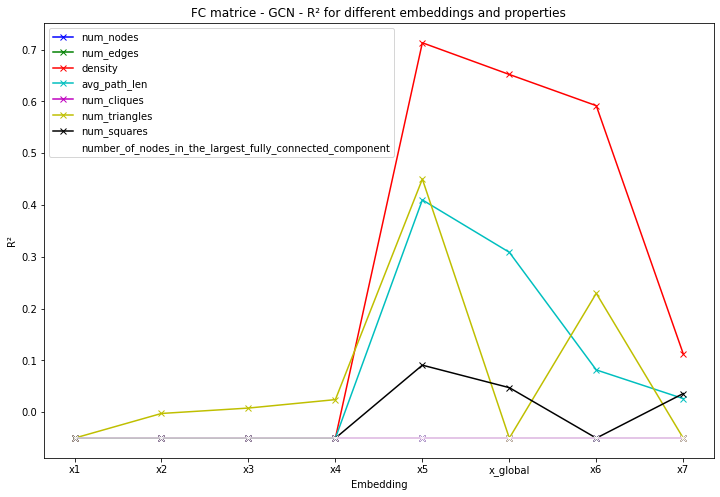

<Figure size 432x288 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt

# Assuming results, embeddings, and other necessary variables are defined as in your context
# property_names = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'num_cliques', 'num_triangles', 'num_squares', 'number_of_nodes_in_the_largest_fully_connected_component']
# embeddings_names = ['x', 'x2', 'x3', 'x4', 'x5', 'x_global', 'x6', 'x7', 'x8']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'orange']

plt.figure(figsize=(12, 8))

for i, property_name in enumerate(property_names):
    x_points = []
    y_points = []
    for j, embedding in enumerate(embeddings):
        name_of_embedding = embeddings_names[j]
        test_r2 = results[(name_of_embedding, property_name)][3]
        if test_r2 < -0.05:  # Handle negative R² values
            test_r2 = -0.05
        x_points.append(j)
        y_points.append(test_r2)
    
    # Plotting the line for the current property
    plt.plot(x_points, y_points, label=property_name, color=colors[i], marker='x')

plt.xticks(range(len(embeddings)), embeddings_names)
plt.xlabel('Embedding')
plt.ylabel('R²')
plt.legend()
plt.title('FC matrice - GCN - R² for different embeddings and properties')
plt.show()

#save the plot
plt.savefig("results/"+DATASET+"_"+MODEL+"test_R2_plot.png")


In [23]:
import matplotlib.pyplot as plt

# Assuming results, embeddings, and other necessary variables are defined as in your context
property_names = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'num_cliques', 'num_triangles', 'num_squares', 'number_of_nodes_in_the_largest_fully_connected_component']
embeddings_names = ['x', 'x2', 'x3', 'x4', 'x5', 'x_global', 'x6', 'x7', 'x8']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'orange']

plt.figure(figsize=(12, 8))

for i, property_name in enumerate(property_names):
    x_points = []
    y_points = []
    for j, embedding in enumerate(embeddings):
        name_of_embedding = embeddings_names[j]
        train_r2 = results[(name_of_embedding, property_name)][2]
        if train_r2 < -0.05:
            train_r2 = -0.05
        x_points.append(j)
        y_points.append(train_r2)

    # Plotting the line for the current property
    plt.plot(x_points, y_points, label=property_name, color=colors[i], marker='x')

plt.xticks(range(len(embeddings)), embeddings_names)
plt.xlabel('Embedding')
plt.ylabel('R²')
plt.legend()
plt.title('FC matrice - GCN - R² for different embeddings and properties')
plt.show()

#save the plot
plt.savefig("results/"+DATASET+"_"+MODEL+"train_R2_plot.png")

KeyError: ('x', 'num_nodes')

<Figure size 864x576 with 0 Axes>

#### Test with more properties

In [25]:
import networkx as nx
import numpy as np

def calculate_avg_path_length(G):
    if nx.is_connected(G):
        return nx.average_shortest_path_length(G)
    else:
        # Use the average path length of the largest connected component for disconnected graphs
        components = [G.subgraph(c).copy() for c in nx.connected_components(G)]
        largest_component = max(components, key=len)
        return nx.average_shortest_path_length(largest_component)
    
def betweenness_centralization(G):
    n = len(G)
    betweenness = nx.betweenness_centrality(G)
    max_betweenness = max(betweenness.values())
    centralization = sum(max_betweenness - bet for bet in betweenness.values())
    if n > 2:
        centralization /= (n - 1) * (n - 2) / 2
    return centralization

def pagerank_centralization(G, alpha=0.85):
    n = len(G)
    pagerank = nx.pagerank(G, alpha=alpha)
    max_pagerank = max(pagerank.values())
    centralization = sum(max_pagerank - pr for pr in pagerank.values())
    if n > 1:
        centralization /= (n - 1)
    return centralization

def clustering_properties(G):
    average_clustering = nx.average_clustering(G)
    transitivity = nx.transitivity(G)
    return average_clustering, transitivity

def compute_graph_properties(data):
    properties = []
    for graph_data in data:
        G = nx.from_edgelist(graph_data.edge_index.t().tolist())
        
        # Number of nodes
        num_nodes = G.number_of_nodes()
        
        # Number of edges
        num_edges = G.number_of_edges()
        
        # Density
        density = nx.density(G)
        
        # Average Path Length
        avg_path_len = calculate_avg_path_length(G)
        
        # Diameter
        if nx.is_connected(G):
            diameter = nx.diameter(G)
        else:
            # Use the diameter of the largest connected component for disconnected graphs
            components = [G.subgraph(c).copy() for c in nx.connected_components(G)]
            largest_component = max(components, key=len)
            diameter = nx.diameter(largest_component)
        
        # Radius
        if nx.is_connected(G):
            radius = nx.radius(G)
        else:
            radius = nx.radius(largest_component)
        
        # Clustering Coefficient
        clustering_coeff = nx.average_clustering(G)
        
        # Transitivity
        transitivity = nx.transitivity(G)
        
        # Assortativity
        assortativity = nx.degree_assortativity_coefficient(G)
        
        # Number of Cliques
        num_cliques = len(list(nx.find_cliques(G)))
        
        # Number of Triangles
        num_triangles = sum(nx.triangles(G).values()) / 3
        
        # Number of Squares (4-cycles)
        num_squares = sum(nx.square_clustering(G).values()) / 4
        
        # Size of the Largest Connected Component
        largest_component_size = len(max(nx.connected_components(G), key=len))
        
        # Average Degree
        degrees = [d for n, d in G.degree()]
        avg_degree = np.mean(degrees)
        
        # Betweenness Centrality
        betweenness_centrality = nx.betweenness_centrality(G)
        avg_betweenness_centrality = np.mean(list(betweenness_centrality.values()))
        
        # Eigenvalues of the Adjacency Matrix (for spectral properties)
        eigenvalues = np.linalg.eigvals(nx.adjacency_matrix(G).todense())
        spectral_radius = max(eigenvalues)
        algebraic_connectivity = sorted(eigenvalues)[1]  # second smallest eigenvalue
        
        # Graph Laplacian Eigenvalues
        laplacian_eigenvalues = np.linalg.eigvals(nx.laplacian_matrix(G).todense())
        graph_energy = sum(abs(laplacian_eigenvalues))
        
        # Small-World-ness
        # Compare clustering coefficient and average path length with those of a random graph
        random_graph = nx.gnm_random_graph(num_nodes, num_edges)
        random_clustering_coeff = nx.average_clustering(random_graph)
        random_avg_path_len = calculate_avg_path_length(random_graph)
        small_world_coefficient = (clustering_coeff / random_clustering_coeff) / (avg_path_len / random_avg_path_len)

        # Calculate Betweenness Centralization
        betweenness_cent = betweenness_centralization(G)
        print(f"Betweenness Centralization: {betweenness_cent}")

        # Calculate PageRank Centralization
        pagerank_cent = pagerank_centralization(G)
        print(f"PageRank Centralization: {pagerank_cent}")

        # Calculate Clustering properties
        avg_clustering, transitivity = clustering_properties(G)
        print(f"Average Clustering Coefficient: {avg_clustering}")
        print(f"Transitivity: {transitivity}")
        
        properties.append((
            num_nodes,
            num_edges,
            density,
            avg_path_len,
            diameter,
            radius,
            clustering_coeff,
            transitivity,
            assortativity,
            num_cliques,
            num_triangles,
            num_squares,
            largest_component_size,
            avg_degree,
            avg_betweenness_centrality,
            spectral_radius,
            algebraic_connectivity,
            graph_energy,
            small_world_coefficient
        ))
    return properties


train_idx_list = gnn.train_idx.tolist()
selected_dataset = [gnn.dataset[i] for i in train_idx_list]
train_properties_long = compute_graph_properties(selected_dataset)
test_idx_list = gnn.test_idx.tolist()
selected_dataset = [gnn.dataset[i] for i in test_idx_list]
test_properties_long = compute_graph_properties(selected_dataset)

#save the properties in a file
with open("results/"+DATASET+"_"+MODEL+"_train_properties_long.pkl", "wb") as f:
    pkl.dump(train_properties_long, f)

with open("results/"+DATASET+"_"+MODEL+"_test_properties_long.pkl", "wb") as f:
    pkl.dump(test_properties_long, f)



Betweenness Centralization: 0.001086061741981193
PageRank Centralization: 0.009889108225082894
Average Clustering Coefficient: 0.5179222969842621
Transitivity: 0.5032389055399787
Betweenness Centralization: 0.0018289913557221417
PageRank Centralization: 0.006459017297712483
Average Clustering Coefficient: 0.5087813738549032
Transitivity: 0.5213549337260678
Betweenness Centralization: 0.00045402843483595716
PageRank Centralization: 0.005046367337979484
Average Clustering Coefficient: 0.5414121000696618
Transitivity: 0.5641200188511285
Betweenness Centralization: 0.0010550665108438862
PageRank Centralization: 0.006308393987013973
Average Clustering Coefficient: 0.6576803843183981
Transitivity: 0.6348624992240363
Betweenness Centralization: 0.001264968108251676
PageRank Centralization: 0.007700201326596413
Average Clustering Coefficient: 0.4949392448885353
Transitivity: 0.5178428227746592
Betweenness Centralization: 0.0018431551231994504
PageRank Centralization: 0.009662184686628855
Avera

Betweenness Centralization: 0.002249934020676841
PageRank Centralization: 0.006958093193469958
Average Clustering Coefficient: 0.5176604904495603
Transitivity: 0.5891551584077985
Betweenness Centralization: 0.0038523338856805292
PageRank Centralization: 0.009673819947146852
Average Clustering Coefficient: 0.39826718735809646
Transitivity: 0.5340035481963336
Betweenness Centralization: 0.0009415571619398711
PageRank Centralization: 0.006841847000195802
Average Clustering Coefficient: 0.441488221549468
Transitivity: 0.4850266397207422
Betweenness Centralization: 0.001708176235729968
PageRank Centralization: 0.006499278216215807
Average Clustering Coefficient: 0.5792587107642506
Transitivity: 0.6022845275181724
Betweenness Centralization: 0.0013510997350773552
PageRank Centralization: 0.008786855049144855
Average Clustering Coefficient: 0.4543976754269536
Transitivity: 0.4414048059149723
Betweenness Centralization: 0.0012972292108553332
PageRank Centralization: 0.006658958495318285
Averag

Betweenness Centralization: 0.0022671691216563806
PageRank Centralization: 0.007768459025854732
Average Clustering Coefficient: 0.577849554876937
Transitivity: 0.5667556742323098
Betweenness Centralization: 0.001454267042670509
PageRank Centralization: 0.006001335474472275
Average Clustering Coefficient: 0.5460483818540083
Transitivity: 0.5746121297602257
Betweenness Centralization: 0.0014496068652510448
PageRank Centralization: 0.008681186183223458
Average Clustering Coefficient: 0.5584861537502397
Transitivity: 0.5778382053025153
Betweenness Centralization: 0.002007966387081847
PageRank Centralization: 0.006671939099817724
Average Clustering Coefficient: 0.48545362139991277
Transitivity: 0.5018324607329843
Betweenness Centralization: 0.0017584473673798293
PageRank Centralization: 0.0073635679264833975
Average Clustering Coefficient: 0.5213172047784249
Transitivity: 0.5326941514860978
Betweenness Centralization: 0.0015424834418785048
PageRank Centralization: 0.01024257003646897
Averag

Betweenness Centralization: 0.0027119481097196917
PageRank Centralization: 0.007852615374744727
Average Clustering Coefficient: 0.5428112510914471
Transitivity: 0.5493345571363011
Betweenness Centralization: 0.0009129282512773135
PageRank Centralization: 0.006697696068120426
Average Clustering Coefficient: 0.5043614512796099
Transitivity: 0.5077755240027045
Betweenness Centralization: 0.0017956453412381632
PageRank Centralization: 0.009108386013990149
Average Clustering Coefficient: 0.5332475819111081
Transitivity: 0.5324466865397844
Betweenness Centralization: 0.0014673091251938282
PageRank Centralization: 0.010418666312293743
Average Clustering Coefficient: 0.45601639118218884
Transitivity: 0.4508833922261484
Betweenness Centralization: 0.001344188359494869
PageRank Centralization: 0.009310369122357299
Average Clustering Coefficient: 0.5394155159259717
Transitivity: 0.5651203416149069
Betweenness Centralization: 0.0011114625323693124
PageRank Centralization: 0.007313030133503113
Aver

Betweenness Centralization: 0.0030607172896678944
PageRank Centralization: 0.00747488219880637
Average Clustering Coefficient: 0.551372570399119
Transitivity: 0.6035196687370601
Betweenness Centralization: 0.0018904785148743163
PageRank Centralization: 0.008244167735453955
Average Clustering Coefficient: 0.4937877510139175
Transitivity: 0.47336531178995206
Betweenness Centralization: 0.0005971837392109634
PageRank Centralization: 0.006703150237079214
Average Clustering Coefficient: 0.4771392380310655
Transitivity: 0.5351647396331392
Betweenness Centralization: 0.002080298906700507
PageRank Centralization: 0.008982191184123335
Average Clustering Coefficient: 0.43892345681138784
Transitivity: 0.47729672650475186
Betweenness Centralization: 0.0027777833942006294
PageRank Centralization: 0.007932222696191668
Average Clustering Coefficient: 0.464393647288384
Transitivity: 0.47368421052631576
Betweenness Centralization: 0.0009275676153334862
PageRank Centralization: 0.008110773280972318
Aver

Betweenness Centralization: 0.0006455590906807535
PageRank Centralization: 0.00616522977321775
Average Clustering Coefficient: 0.4781515197997262
Transitivity: 0.5141950273320403
Betweenness Centralization: 0.0018203673654359255
PageRank Centralization: 0.007147031697340111
Average Clustering Coefficient: 0.4969713912411682
Transitivity: 0.4693569270608546
Betweenness Centralization: 0.0016494146200354827
PageRank Centralization: 0.007833006151079805
Average Clustering Coefficient: 0.5417520622019766
Transitivity: 0.5177895533686601
Betweenness Centralization: 0.0016024607162301034
PageRank Centralization: 0.008011892746391053
Average Clustering Coefficient: 0.5318215059884442
Transitivity: 0.512705798138869
Betweenness Centralization: 0.001162148076923222
PageRank Centralization: 0.007145103237351428
Average Clustering Coefficient: 0.4802668943869435
Transitivity: 0.5367577756833176
Betweenness Centralization: 0.001507008183020808
PageRank Centralization: 0.006051570403263156
Average 

Betweenness Centralization: 0.0012574010986898252
PageRank Centralization: 0.0070333742764222065
Average Clustering Coefficient: 0.44748232018052975
Transitivity: 0.45867768595041325
Betweenness Centralization: 0.0019304196654361069
PageRank Centralization: 0.008855875161050865
Average Clustering Coefficient: 0.49138375288223146
Transitivity: 0.4895833333333333
Betweenness Centralization: 0.0017669554093425939
PageRank Centralization: 0.007219000002810857
Average Clustering Coefficient: 0.4588723926572225
Transitivity: 0.6025531914893617
Betweenness Centralization: 0.0016185444657186088
PageRank Centralization: 0.007591867705972958
Average Clustering Coefficient: 0.4944107583238019
Transitivity: 0.5023584905660378
Betweenness Centralization: 0.001913941870110354
PageRank Centralization: 0.008215107998461391
Average Clustering Coefficient: 0.5492165940369999
Transitivity: 0.555765595463138
Betweenness Centralization: 0.0007686310905473608
PageRank Centralization: 0.005198475591750177
Av

Betweenness Centralization: 0.0017726197089032534
PageRank Centralization: 0.0057720408657632935
Average Clustering Coefficient: 0.5476128676119623
Transitivity: 0.5542057308860425
Betweenness Centralization: 0.0017956013103569701
PageRank Centralization: 0.00992834227923277
Average Clustering Coefficient: 0.4978453976737729
Transitivity: 0.5060670949321913
Betweenness Centralization: 0.0029431207085140907
PageRank Centralization: 0.007500776793950888
Average Clustering Coefficient: 0.47838234562372506
Transitivity: 0.5318084345961401
Betweenness Centralization: 0.0010911389744510127
PageRank Centralization: 0.006244197778644872
Average Clustering Coefficient: 0.474004013228151
Transitivity: 0.4905711206896552
Betweenness Centralization: 0.0020775894371335047
PageRank Centralization: 0.008400138616102877
Average Clustering Coefficient: 0.5302536211114138
Transitivity: 0.6321763447935516
Betweenness Centralization: 0.0031495150363905363
PageRank Centralization: 0.008046452316778243
Aver

Betweenness Centralization: 0.0006421228714372103
PageRank Centralization: 0.006547220929718533
Average Clustering Coefficient: 0.5210329653446675
Transitivity: 0.5526440410418311
Betweenness Centralization: 0.0022303841592928694
PageRank Centralization: 0.009727279175440692
Average Clustering Coefficient: 0.6153324922737486
Transitivity: 0.6393103448275862
Betweenness Centralization: 0.0012331573811127647
PageRank Centralization: 0.009096088071027015
Average Clustering Coefficient: 0.49653844260736885
Transitivity: 0.5154028436018957
Betweenness Centralization: 0.0013574321102590259
PageRank Centralization: 0.008854148765747343
Average Clustering Coefficient: 0.5244632624480272
Transitivity: 0.5152995628696323
Betweenness Centralization: 0.0009856385374173637
PageRank Centralization: 0.01089985214178111
Average Clustering Coefficient: 0.4454048914503167
Transitivity: 0.4459662602304994
Betweenness Centralization: 0.0016434815858207398
PageRank Centralization: 0.005390272990085286
Aver

Betweenness Centralization: 0.0018043381772499792
PageRank Centralization: 0.006687627140011902
Average Clustering Coefficient: 0.6005786255445925
Transitivity: 0.6189836579359749
Betweenness Centralization: 0.0016874067762550347
PageRank Centralization: 0.00756481856398947
Average Clustering Coefficient: 0.4601165850151652
Transitivity: 0.5204013377926422
Betweenness Centralization: 0.0015758687388136778
PageRank Centralization: 0.008527095347658034
Average Clustering Coefficient: 0.4785661577844241
Transitivity: 0.5396877033181522
Betweenness Centralization: 0.0037345580264380425
PageRank Centralization: 0.0071451836719845455
Average Clustering Coefficient: 0.5563293833834663
Transitivity: 0.6171728533933258
Betweenness Centralization: 0.0018538843768264848
PageRank Centralization: 0.006348457502806615
Average Clustering Coefficient: 0.521460021186095
Transitivity: 0.5507225007372456
Betweenness Centralization: 0.0010595741557186183
PageRank Centralization: 0.008145955683867378
Avera

Betweenness Centralization: 0.0009467499795467532
PageRank Centralization: 0.007364803466579613
Average Clustering Coefficient: 0.4963897469415515
Transitivity: 0.490768094534712
Betweenness Centralization: 0.0035709011754109427
PageRank Centralization: 0.00891081020811883
Average Clustering Coefficient: 0.4804955622293085
Transitivity: 0.5050970075633016
Betweenness Centralization: 0.0018024012079577015
PageRank Centralization: 0.006656257847392205
Average Clustering Coefficient: 0.464207821164343
Transitivity: 0.5469924812030075
Betweenness Centralization: 0.002915486164353885
PageRank Centralization: 0.008879591382603058
Average Clustering Coefficient: 0.43744759139495976
Transitivity: 0.4269938650306748
Betweenness Centralization: 0.0028448004620705587
PageRank Centralization: 0.00965040176218437
Average Clustering Coefficient: 0.4283967783967782
Transitivity: 0.4916387959866221
Betweenness Centralization: 0.0019389516872158393
PageRank Centralization: 0.0068967411182083195
Average

Betweenness Centralization: 0.0018235079791928334
PageRank Centralization: 0.005867179288039859
Average Clustering Coefficient: 0.5370765869244573
Transitivity: 0.6867549668874172
Betweenness Centralization: 0.0017345548870816641
PageRank Centralization: 0.008204686451480954
Average Clustering Coefficient: 0.47970082655681023
Transitivity: 0.4447646493756004
Betweenness Centralization: 0.00250580808197654
PageRank Centralization: 0.007212686835546926
Average Clustering Coefficient: 0.5678326547917583
Transitivity: 0.6132723112128147
Betweenness Centralization: 0.0008269175533117747
PageRank Centralization: 0.0068132030591250186
Average Clustering Coefficient: 0.5148793379174899
Transitivity: 0.49526290857413546
Betweenness Centralization: 0.0032354414233677943
PageRank Centralization: 0.009121581811029386
Average Clustering Coefficient: 0.5174565137927206
Transitivity: 0.5306451612903226
Betweenness Centralization: 0.0020847359721648602
PageRank Centralization: 0.012321066773739935
Ave

Betweenness Centralization: 0.0012766992639819798
PageRank Centralization: 0.006087697078168115
Average Clustering Coefficient: 0.5834889804710776
Transitivity: 0.5533357117374242
Betweenness Centralization: 0.005368328038112794
PageRank Centralization: 0.00905071818722414
Average Clustering Coefficient: 0.46943647915870124
Transitivity: 0.5007407407407407
Betweenness Centralization: 0.0016796192371994472
PageRank Centralization: 0.008132492231621349
Average Clustering Coefficient: 0.529164389813477
Transitivity: 0.49911691981631934
Betweenness Centralization: 0.0018505558982255148
PageRank Centralization: 0.008386420393863553
Average Clustering Coefficient: 0.5251686358219987
Transitivity: 0.5505706414797323
Betweenness Centralization: 0.0008712998790981118
PageRank Centralization: 0.007745672929041464
Average Clustering Coefficient: 0.4638630313999964
Transitivity: 0.46268128758401134
Betweenness Centralization: 0.001654817697695922
PageRank Centralization: 0.0079914990414831
Average

Betweenness Centralization: 0.0014274215640062023
PageRank Centralization: 0.007139357880555097
Average Clustering Coefficient: 0.5462399240918535
Transitivity: 0.5782921610581598
Betweenness Centralization: 0.0016129218128364741
PageRank Centralization: 0.005492282003335041
Average Clustering Coefficient: 0.5642525817094781
Transitivity: 0.5815024805102764
Betweenness Centralization: 0.0026928102128250704
PageRank Centralization: 0.010681684835313166
Average Clustering Coefficient: 0.507423700710639
Transitivity: 0.5324295177938684
Betweenness Centralization: 0.0020314179674239185
PageRank Centralization: 0.00918543062453907
Average Clustering Coefficient: 0.5253077705045992
Transitivity: 0.5892679695263332
Betweenness Centralization: 0.001534231060465542
PageRank Centralization: 0.009352959498517334
Average Clustering Coefficient: 0.48183507525612795
Transitivity: 0.48473967684021546
Betweenness Centralization: 0.0030079686366232287
PageRank Centralization: 0.007162817622252187
Avera

Betweenness Centralization: 0.0012033971813378128
PageRank Centralization: 0.0059348948190293405
Average Clustering Coefficient: 0.5084880396639765
Transitivity: 0.5445321307779031
Betweenness Centralization: 0.0016484739029092386
PageRank Centralization: 0.009148611984206462
Average Clustering Coefficient: 0.47475672723730794
Transitivity: 0.5129752564876282
Betweenness Centralization: 0.0019784537449887103
PageRank Centralization: 0.00930468011331531
Average Clustering Coefficient: 0.4668131768771154
Transitivity: 0.4545150501672241
Betweenness Centralization: 0.005387979050778052
PageRank Centralization: 0.007539049666415662
Average Clustering Coefficient: 0.5540887188720006
Transitivity: 0.5730975686769814
Betweenness Centralization: 0.006038392728659664
PageRank Centralization: 0.008899302928365134
Average Clustering Coefficient: 0.5617320953422421
Transitivity: 0.5880127137884062
Betweenness Centralization: 0.0015516474535888732
PageRank Centralization: 0.006951692890816766
Avera

Betweenness Centralization: 0.002184119259521994
PageRank Centralization: 0.006629867243140498
Average Clustering Coefficient: 0.4143278460669765
Transitivity: 0.4796650717703349
Betweenness Centralization: 0.002605643202483183
PageRank Centralization: 0.008537183819772344
Average Clustering Coefficient: 0.5529855344240279
Transitivity: 0.5782592454239821
Betweenness Centralization: 0.0020502174769468106
PageRank Centralization: 0.008077800587251207
Average Clustering Coefficient: 0.44095894526928997
Transitivity: 0.4639788499669531
Betweenness Centralization: 0.0014755976860036325
PageRank Centralization: 0.008910085007694232
Average Clustering Coefficient: 0.6003008560684792
Transitivity: 0.577722293814433
Betweenness Centralization: 0.002641040099671426
PageRank Centralization: 0.010159956511893956
Average Clustering Coefficient: 0.5190613386026804
Transitivity: 0.537841726618705
Betweenness Centralization: 0.0016484978386105272
PageRank Centralization: 0.008137750888951344
Average 

Betweenness Centralization: 0.0008740635230066906
PageRank Centralization: 0.006237101811494439
Average Clustering Coefficient: 0.539177416999715
Transitivity: 0.5696276751685723
Betweenness Centralization: 0.004390691191276613
PageRank Centralization: 0.00888217500036754
Average Clustering Coefficient: 0.47663226645527557
Transitivity: 0.5385256143273636
Betweenness Centralization: 0.0006063942135523048
PageRank Centralization: 0.006289538387387882
Average Clustering Coefficient: 0.514159204126005
Transitivity: 0.5612078152753108
Betweenness Centralization: 0.0014460103606761118
PageRank Centralization: 0.007916069017702877
Average Clustering Coefficient: 0.4644615850117878
Transitivity: 0.47235023041474655
Betweenness Centralization: 0.0013013513155687815
PageRank Centralization: 0.008475609401026441
Average Clustering Coefficient: 0.5202484833990332
Transitivity: 0.5411844792375766
Betweenness Centralization: 0.0013306029598389522
PageRank Centralization: 0.006165058423193593
Averag

Betweenness Centralization: 0.000946904100364308
PageRank Centralization: 0.005965014541061421
Average Clustering Coefficient: 0.5436630490201664
Transitivity: 0.5596886803250544
Betweenness Centralization: 0.002115424238880284
PageRank Centralization: 0.009981934017454716
Average Clustering Coefficient: 0.4010513516255143
Transitivity: 0.4862068965517241
Betweenness Centralization: 0.0010370560628975628
PageRank Centralization: 0.006113677787456329
Average Clustering Coefficient: 0.512545660772217
Transitivity: 0.5751266178953293
Betweenness Centralization: 0.00352702436172768
PageRank Centralization: 0.007809518317998699
Average Clustering Coefficient: 0.46085680192823036
Transitivity: 0.4699544135930377
Betweenness Centralization: 0.0007626336723224997
PageRank Centralization: 0.006630070936831617
Average Clustering Coefficient: 0.4402871270811911
Transitivity: 0.46248294679399726
Betweenness Centralization: 0.0012822995125620713
PageRank Centralization: 0.007524356846483867
Average

Betweenness Centralization: 0.0008680242720428117
PageRank Centralization: 0.008025651765772275
Average Clustering Coefficient: 0.4645239217341789
Transitivity: 0.48102643856920685
Betweenness Centralization: 0.0015210866819177985
PageRank Centralization: 0.007171731470552725
Average Clustering Coefficient: 0.4665562097357226
Transitivity: 0.5057915057915058
Betweenness Centralization: 0.0015204697184675263
PageRank Centralization: 0.007427168881187539
Average Clustering Coefficient: 0.5291114693387421
Transitivity: 0.5312605610003379
Betweenness Centralization: 0.00438585385697987
PageRank Centralization: 0.009120300581917288
Average Clustering Coefficient: 0.4387152179187576
Transitivity: 0.5359576078728236
Betweenness Centralization: 0.0009413104267108347
PageRank Centralization: 0.00801640461988958
Average Clustering Coefficient: 0.5410080980660184
Transitivity: 0.5329659889796694
Betweenness Centralization: 0.001089524489749557
PageRank Centralization: 0.006201443501673833
Average

Betweenness Centralization: 0.001344379660673526
PageRank Centralization: 0.006430121618631281
Average Clustering Coefficient: 0.532396333277665
Transitivity: 0.6209009009009009
Betweenness Centralization: 0.0014063380167544308
PageRank Centralization: 0.007603666119484385
Average Clustering Coefficient: 0.4935846506434744
Transitivity: 0.533288948069241
Betweenness Centralization: 0.002763530527829969
PageRank Centralization: 0.0075635088053431
Average Clustering Coefficient: 0.5137041773231033
Transitivity: 0.5866977829638274
Betweenness Centralization: 0.0013886666467540889
PageRank Centralization: 0.006331214662925075
Average Clustering Coefficient: 0.49095499989159935
Transitivity: 0.5170628834355828
Betweenness Centralization: 0.0016883081614622241
PageRank Centralization: 0.008794125355827161
Average Clustering Coefficient: 0.4651455640933328
Transitivity: 0.5191073066340569
Betweenness Centralization: 0.000934766826299802
PageRank Centralization: 0.008543723115657128
Average Cl

Betweenness Centralization: 0.0013959119193162341
PageRank Centralization: 0.005395707412499384
Average Clustering Coefficient: 0.504624688473573
Transitivity: 0.5092336103416436
Betweenness Centralization: 0.0026711976152805775
PageRank Centralization: 0.008107131712314844
Average Clustering Coefficient: 0.5103907194871484
Transitivity: 0.5218670327515199
Betweenness Centralization: 0.0019979433026104253
PageRank Centralization: 0.006515322950923503
Average Clustering Coefficient: 0.5068425827046518
Transitivity: 0.5583941605839416
Betweenness Centralization: 0.005138929649611487
PageRank Centralization: 0.008355024119724462
Average Clustering Coefficient: 0.550641293178363
Transitivity: 0.5918181818181818
Betweenness Centralization: 0.002234714424148594
PageRank Centralization: 0.013071180145397465
Average Clustering Coefficient: 0.41615507508364663
Transitivity: 0.4808467741935484
Betweenness Centralization: 0.001547043010828252
PageRank Centralization: 0.006554107959798369
Average 

Betweenness Centralization: 0.0008405565655393671
PageRank Centralization: 0.005618805458223556
Average Clustering Coefficient: 0.5091641303917225
Transitivity: 0.496783039763738
Betweenness Centralization: 0.0022042406006814387
PageRank Centralization: 0.0068138978147756326
Average Clustering Coefficient: 0.5633647143991153
Transitivity: 0.6008573469873779
Betweenness Centralization: 0.001518154583469654
PageRank Centralization: 0.004961409300821995
Average Clustering Coefficient: 0.5246387508230947
Transitivity: 0.5115373089601438
Betweenness Centralization: 0.00220825584221994
PageRank Centralization: 0.006492173003148195
Average Clustering Coefficient: 0.5521233020979472
Transitivity: 0.5932757413028251
Betweenness Centralization: 0.0017584473673798293
PageRank Centralization: 0.0073635679264833975
Average Clustering Coefficient: 0.5213172047784249
Transitivity: 0.5326941514860978
Betweenness Centralization: 0.003030275831623171
PageRank Centralization: 0.0064064578211270075
Averag

Betweenness Centralization: 0.0016356601709099923
PageRank Centralization: 0.008897534207293754
Average Clustering Coefficient: 0.502264513875791
Transitivity: 0.47616936377743296
Betweenness Centralization: 0.002818876537578845
PageRank Centralization: 0.007041820883552073
Average Clustering Coefficient: 0.5104067866998903
Transitivity: 0.5430338891877353
Betweenness Centralization: 0.001159043135332093
PageRank Centralization: 0.005705430755533083
Average Clustering Coefficient: 0.5392670119757231
Transitivity: 0.5356685177274669
Betweenness Centralization: 0.0010906266865349484
PageRank Centralization: 0.008552307621720046
Average Clustering Coefficient: 0.436434969295677
Transitivity: 0.43027591349739003
Betweenness Centralization: 0.004214605853583735
PageRank Centralization: 0.007288122008270084
Average Clustering Coefficient: 0.5824712944297773
Transitivity: 0.6308106429236982
Betweenness Centralization: 0.0024188167081628416
PageRank Centralization: 0.009030570611413893
Average

Betweenness Centralization: 0.001989396673659014
PageRank Centralization: 0.006890261737348976
Average Clustering Coefficient: 0.5705376995539835
Transitivity: 0.6238923163208077
Betweenness Centralization: 0.002751796785496164
PageRank Centralization: 0.0074519069506736365
Average Clustering Coefficient: 0.5538555953551242
Transitivity: 0.5599721059972106
Betweenness Centralization: 0.0013839476940816192
PageRank Centralization: 0.008895664780037858
Average Clustering Coefficient: 0.47983624728369734
Transitivity: 0.5060858424087123
Betweenness Centralization: 0.0038893200685687166
PageRank Centralization: 0.010710864793809944
Average Clustering Coefficient: 0.5505831338945831
Transitivity: 0.5780553077609277
Betweenness Centralization: 0.0008232270757044208
PageRank Centralization: 0.007341579770319
Average Clustering Coefficient: 0.5297192186673949
Transitivity: 0.558295174357168
Betweenness Centralization: 0.0017151449736280723
PageRank Centralization: 0.006859520328812198
Average 

In [26]:
#load the properties
with open("results/"+DATASET+"_"+MODEL+"_train_properties_long.pkl", "rb") as f:
    train_properties_long = pkl.load(f)

with open("results/"+DATASET+"_"+MODEL+"_test_properties_long.pkl", "rb") as f:
    test_properties_long = pkl.load(f)

In [ ]:
property_names_long = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'diameter', 'radius', 'clustering_coeff', 'transitivity', 'assortativity', 'num_cliques', 'num_triangles', 'num_squares', 'largest_component_size', 'avg_degree', 'avg_betweenness_centrality', 'spectral_radius', 'algebraic_connectivity', 'graph_energy', 'small_world_coefficient']
train_y_long = torch.tensor(train_properties_long, dtype=torch.float32)
test_y_long = torch.tensor(test_properties_long, dtype=torch.float32)
#create a dictionary where we will store the results for each embeddings, each property
results = {}

ii = 0

for train_embedding, test_embedding in embeddings:
    input_size = train_embedding.shape[1]

    for i, property_name in enumerate(property_names_long):
        model = LinearModel(input_size, output_size)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        num_epochs = 800000  # Maximum number of epochs
        min_epochs = 1000  # Minimum number of epochs
        patience = 3000  # Number of epochs to wait for improvement
        tolerance = 1e-6  # Tolerance for considering the loss as stable

        best_loss = float('inf')
        no_improve_count = 0
        
        for epoch in range(num_epochs):
            model.train()
            optimizer.zero_grad()

            outputs = model(train_embedding).squeeze()
            target = train_y_long[:, i].squeeze()

            loss = criterion(outputs, target)
            loss.backward()
            optimizer.step()

            if (epoch+1) % 1000 == 0:  # Print every 1000 epochs
                print(f'Epoch [{epoch+1}/{num_epochs}], Property: {property_name}, Loss: {loss.item():.4f}')

            # Check for early stopping, but only after minimum epochs
            if epoch >= min_epochs:
                if loss.item() < best_loss - tolerance:
                    best_loss = loss.item()
                    no_improve_count = 0
                else:
                    no_improve_count += 1

                if no_improve_count >= patience:
                    print(f'Early stopping at epoch {epoch+1}')
                    break

        # Evaluate the model
        model.eval()
        with torch.no_grad():
            train_pred = model(train_embedding).squeeze().cpu().numpy()
            test_pred = model(test_embedding).squeeze().cpu().numpy()

            train_target = train_y_long[:, i].cpu().numpy()
            test_target = test_y_long[:, i].cpu().numpy()

            train_mse = mean_squared_error(train_target, train_pred)
            test_mse = mean_squared_error(test_target, test_pred)

            train_r2 = r2_score(train_target, train_pred)
            test_r2 = r2_score(test_target, test_pred)

            print(f'Embedding: {train_embedding.shape}')
            print(f'Property: {property_name}')
            print(f'  Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')
            print(f'  Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}')

            #add the results to the dictionary
            name_of_embedding = embeddings_names[ii]
            results[(name_of_embedding, property_name)] = (train_mse, test_mse, train_r2, test_r2)

    ii += 1

#save results
with open("results/"+DATASET+"_"+MODEL+"_results_limited_cv_long.pkl", "wb") as f:
    pkl.dump(results, f)

/scratch-local/tpelletreaudur.7137294/ipykernel_1070957/1310961172.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  train_y_long = torch.tensor(train_properties_long, dtype=torch.float32)
/scratch-local/tpelletreaudur.7137294/ipykernel_1070957/1310961172.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  test_y_long = torch.tensor(test_properties_long, dtype=torch.float32)


Epoch [1000/800000], Property: num_nodes, Loss: 6071.8433
Epoch [2000/800000], Property: num_nodes, Loss: 3140.5225
Epoch [3000/800000], Property: num_nodes, Loss: 2040.7026
Epoch [4000/800000], Property: num_nodes, Loss: 1398.7921
Epoch [5000/800000], Property: num_nodes, Loss: 915.2943
Epoch [6000/800000], Property: num_nodes, Loss: 584.8738
Epoch [7000/800000], Property: num_nodes, Loss: 385.9222
Epoch [8000/800000], Property: num_nodes, Loss: 278.2931
Epoch [9000/800000], Property: num_nodes, Loss: 220.9682
Epoch [10000/800000], Property: num_nodes, Loss: 185.1511
Epoch [11000/800000], Property: num_nodes, Loss: 158.4604
Epoch [12000/800000], Property: num_nodes, Loss: 137.5287
Epoch [13000/800000], Property: num_nodes, Loss: 120.8410
Epoch [14000/800000], Property: num_nodes, Loss: 107.2347
Epoch [15000/800000], Property: num_nodes, Loss: 96.1585
Epoch [16000/800000], Property: num_nodes, Loss: 87.2914
Epoch [17000/800000], Property: num_nodes, Loss: 80.2692
Epoch [18000/800000], 

Epoch [11000/800000], Property: num_edges, Loss: 65824.8047
Epoch [12000/800000], Property: num_edges, Loss: 60379.3320
Epoch [13000/800000], Property: num_edges, Loss: 55441.2383
Epoch [14000/800000], Property: num_edges, Loss: 50981.2344
Epoch [15000/800000], Property: num_edges, Loss: 46968.6602
Epoch [16000/800000], Property: num_edges, Loss: 43383.4883
Epoch [17000/800000], Property: num_edges, Loss: 40209.0664
Epoch [18000/800000], Property: num_edges, Loss: 37423.4883
Epoch [19000/800000], Property: num_edges, Loss: 34997.4023
Epoch [20000/800000], Property: num_edges, Loss: 32905.0078
Epoch [21000/800000], Property: num_edges, Loss: 31120.9473
Epoch [22000/800000], Property: num_edges, Loss: 29620.4004
Epoch [23000/800000], Property: num_edges, Loss: 28378.5469
Epoch [24000/800000], Property: num_edges, Loss: 27367.6816
Epoch [25000/800000], Property: num_edges, Loss: 26557.9062
Epoch [26000/800000], Property: num_edges, Loss: 25908.5957
Epoch [27000/800000], Property: num_edge

Epoch [147000/800000], Property: num_edges, Loss: 19441.2344
Epoch [148000/800000], Property: num_edges, Loss: 19435.9316
Epoch [149000/800000], Property: num_edges, Loss: 19430.6406
Epoch [150000/800000], Property: num_edges, Loss: 19425.3574
Epoch [151000/800000], Property: num_edges, Loss: 19420.0898
Epoch [152000/800000], Property: num_edges, Loss: 19414.8340
Epoch [153000/800000], Property: num_edges, Loss: 19409.5898
Epoch [154000/800000], Property: num_edges, Loss: 19404.3555
Epoch [155000/800000], Property: num_edges, Loss: 19399.1348
Epoch [156000/800000], Property: num_edges, Loss: 19393.9238
Epoch [157000/800000], Property: num_edges, Loss: 19388.7246
Epoch [158000/800000], Property: num_edges, Loss: 19383.5391
Epoch [159000/800000], Property: num_edges, Loss: 19378.3613
Epoch [160000/800000], Property: num_edges, Loss: 19373.1992
Epoch [161000/800000], Property: num_edges, Loss: 19368.0449
Epoch [162000/800000], Property: num_edges, Loss: 19362.9062
Epoch [163000/800000], P

Epoch [282000/800000], Property: num_edges, Loss: 18828.6602
Epoch [283000/800000], Property: num_edges, Loss: 18824.8633
Epoch [284000/800000], Property: num_edges, Loss: 18821.0781
Epoch [285000/800000], Property: num_edges, Loss: 18817.3027
Epoch [286000/800000], Property: num_edges, Loss: 18813.5410
Epoch [287000/800000], Property: num_edges, Loss: 18809.7891
Epoch [288000/800000], Property: num_edges, Loss: 18806.0508
Epoch [289000/800000], Property: num_edges, Loss: 18802.3262
Epoch [290000/800000], Property: num_edges, Loss: 18798.6094
Epoch [291000/800000], Property: num_edges, Loss: 18794.9062
Epoch [292000/800000], Property: num_edges, Loss: 18791.2148
Epoch [293000/800000], Property: num_edges, Loss: 18787.5371
Epoch [294000/800000], Property: num_edges, Loss: 18783.8652
Epoch [295000/800000], Property: num_edges, Loss: 18780.2109
Epoch [296000/800000], Property: num_edges, Loss: 18776.5664
Epoch [297000/800000], Property: num_edges, Loss: 18772.9375
Epoch [298000/800000], P

Epoch [417000/800000], Property: num_edges, Loss: 18423.5547
Epoch [418000/800000], Property: num_edges, Loss: 18421.3633
Epoch [419000/800000], Property: num_edges, Loss: 18419.1855
Epoch [420000/800000], Property: num_edges, Loss: 18417.0195
Epoch [421000/800000], Property: num_edges, Loss: 18414.8613
Epoch [422000/800000], Property: num_edges, Loss: 18412.7188
Epoch [423000/800000], Property: num_edges, Loss: 18410.5859
Epoch [424000/800000], Property: num_edges, Loss: 18408.4648
Epoch [425000/800000], Property: num_edges, Loss: 18406.3574
Epoch [426000/800000], Property: num_edges, Loss: 18404.2598
Epoch [427000/800000], Property: num_edges, Loss: 18402.1777
Epoch [428000/800000], Property: num_edges, Loss: 18400.1035
Epoch [429000/800000], Property: num_edges, Loss: 18398.0430
Epoch [430000/800000], Property: num_edges, Loss: 18395.9980
Epoch [431000/800000], Property: num_edges, Loss: 18393.9570
Epoch [432000/800000], Property: num_edges, Loss: 18391.9336
Epoch [433000/800000], P

Epoch [552000/800000], Property: num_edges, Loss: 18236.6406
Epoch [553000/800000], Property: num_edges, Loss: 18236.0488
Epoch [554000/800000], Property: num_edges, Loss: 18235.4668
Epoch [555000/800000], Property: num_edges, Loss: 18234.9004
Epoch [556000/800000], Property: num_edges, Loss: 18234.3418
Epoch [557000/800000], Property: num_edges, Loss: 18233.7949
Epoch [558000/800000], Property: num_edges, Loss: 18233.2559
Epoch [559000/800000], Property: num_edges, Loss: 18232.7363
Epoch [560000/800000], Property: num_edges, Loss: 18232.2207
Epoch [561000/800000], Property: num_edges, Loss: 18231.7207
Epoch [562000/800000], Property: num_edges, Loss: 18231.2305
Epoch [563000/800000], Property: num_edges, Loss: 18230.7500
Epoch [564000/800000], Property: num_edges, Loss: 18230.2812
Epoch [565000/800000], Property: num_edges, Loss: 18229.8242
Epoch [566000/800000], Property: num_edges, Loss: 18229.3770
Epoch [567000/800000], Property: num_edges, Loss: 18228.9434
Epoch [568000/800000], P

Epoch [1000/800000], Property: transitivity, Loss: 0.0043
Epoch [2000/800000], Property: transitivity, Loss: 0.0033
Epoch [3000/800000], Property: transitivity, Loss: 0.0030
Epoch [4000/800000], Property: transitivity, Loss: 0.0028
Epoch [5000/800000], Property: transitivity, Loss: 0.0028
Epoch [6000/800000], Property: transitivity, Loss: 0.0028
Epoch [7000/800000], Property: transitivity, Loss: 0.0028
Epoch [8000/800000], Property: transitivity, Loss: 0.0028
Early stopping at epoch 8978
Embedding: torch.Size([1044, 128])
Property: transitivity
  Train MSE: 0.0028, Test MSE: 0.0045
  Train R²: 0.1421, Test R²: -0.6036
Epoch [1000/800000], Property: assortativity, Loss: 0.0115
Epoch [2000/800000], Property: assortativity, Loss: 0.0108
Epoch [3000/800000], Property: assortativity, Loss: 0.0106
Epoch [4000/800000], Property: assortativity, Loss: 0.0105
Epoch [5000/800000], Property: assortativity, Loss: 0.0105
Epoch [6000/800000], Property: assortativity, Loss: 0.0105
Epoch [7000/800000],

Epoch [116000/800000], Property: num_cliques, Loss: 939.1072
Epoch [117000/800000], Property: num_cliques, Loss: 938.5117
Epoch [118000/800000], Property: num_cliques, Loss: 937.9277
Epoch [119000/800000], Property: num_cliques, Loss: 937.3556
Epoch [120000/800000], Property: num_cliques, Loss: 936.7982
Epoch [121000/800000], Property: num_cliques, Loss: 936.2521
Epoch [122000/800000], Property: num_cliques, Loss: 935.7174
Epoch [123000/800000], Property: num_cliques, Loss: 935.1939
Epoch [124000/800000], Property: num_cliques, Loss: 934.6817
Epoch [125000/800000], Property: num_cliques, Loss: 934.1805
Epoch [126000/800000], Property: num_cliques, Loss: 933.6907
Epoch [127000/800000], Property: num_cliques, Loss: 933.2120
Epoch [128000/800000], Property: num_cliques, Loss: 932.7444
Epoch [129000/800000], Property: num_cliques, Loss: 932.2882
Epoch [130000/800000], Property: num_cliques, Loss: 931.8430
Epoch [131000/800000], Property: num_cliques, Loss: 931.4091
Epoch [132000/800000], P

Epoch [68000/800000], Property: num_triangles, Loss: 563288.5000
Epoch [69000/800000], Property: num_triangles, Loss: 562357.7500
Epoch [70000/800000], Property: num_triangles, Loss: 561454.4375
Epoch [71000/800000], Property: num_triangles, Loss: 560575.5000
Epoch [72000/800000], Property: num_triangles, Loss: 559720.1875
Epoch [73000/800000], Property: num_triangles, Loss: 558887.3125
Epoch [74000/800000], Property: num_triangles, Loss: 558075.2500
Epoch [75000/800000], Property: num_triangles, Loss: 557282.4375
Epoch [76000/800000], Property: num_triangles, Loss: 556508.0625
Epoch [77000/800000], Property: num_triangles, Loss: 555751.8750
Epoch [78000/800000], Property: num_triangles, Loss: 555012.6250
Epoch [79000/800000], Property: num_triangles, Loss: 554290.0000
Epoch [80000/800000], Property: num_triangles, Loss: 553583.5625
Epoch [81000/800000], Property: num_triangles, Loss: 552893.1250
Epoch [82000/800000], Property: num_triangles, Loss: 552217.8750
Epoch [83000/800000], Pro

Epoch [193000/800000], Property: num_triangles, Loss: 515151.6250
Epoch [194000/800000], Property: num_triangles, Loss: 514969.0625
Epoch [195000/800000], Property: num_triangles, Loss: 514788.0312
Epoch [196000/800000], Property: num_triangles, Loss: 514608.4375
Epoch [197000/800000], Property: num_triangles, Loss: 514430.2812
Epoch [198000/800000], Property: num_triangles, Loss: 514253.5000
Epoch [199000/800000], Property: num_triangles, Loss: 514078.0938
Epoch [200000/800000], Property: num_triangles, Loss: 513904.0938
Epoch [201000/800000], Property: num_triangles, Loss: 513731.5312
Epoch [202000/800000], Property: num_triangles, Loss: 513560.2500
Epoch [203000/800000], Property: num_triangles, Loss: 513390.3438
Epoch [204000/800000], Property: num_triangles, Loss: 513221.7188
Epoch [205000/800000], Property: num_triangles, Loss: 513054.5000
Epoch [206000/800000], Property: num_triangles, Loss: 512888.5312
Epoch [207000/800000], Property: num_triangles, Loss: 512723.8750
Epoch [208

Epoch [318000/800000], Property: num_triangles, Loss: 500478.2188
Epoch [319000/800000], Property: num_triangles, Loss: 500409.8438
Epoch [320000/800000], Property: num_triangles, Loss: 500342.1562
Epoch [321000/800000], Property: num_triangles, Loss: 500275.0312
Epoch [322000/800000], Property: num_triangles, Loss: 500208.4375
Epoch [323000/800000], Property: num_triangles, Loss: 500142.3750
Epoch [324000/800000], Property: num_triangles, Loss: 500076.8750
Epoch [325000/800000], Property: num_triangles, Loss: 500012.0000
Epoch [326000/800000], Property: num_triangles, Loss: 499947.7188
Epoch [327000/800000], Property: num_triangles, Loss: 499883.9062
Epoch [328000/800000], Property: num_triangles, Loss: 499820.6250
Epoch [329000/800000], Property: num_triangles, Loss: 499757.9062
Epoch [330000/800000], Property: num_triangles, Loss: 499695.6875
Epoch [331000/800000], Property: num_triangles, Loss: 499633.9062
Epoch [332000/800000], Property: num_triangles, Loss: 499572.6562
Epoch [333

Epoch [443000/800000], Property: num_triangles, Loss: 495212.6875
Epoch [444000/800000], Property: num_triangles, Loss: 495189.0312
Epoch [445000/800000], Property: num_triangles, Loss: 495165.6250
Epoch [446000/800000], Property: num_triangles, Loss: 495142.3750
Epoch [447000/800000], Property: num_triangles, Loss: 495119.4062
Epoch [448000/800000], Property: num_triangles, Loss: 495096.6250
Epoch [449000/800000], Property: num_triangles, Loss: 495074.0312
Epoch [450000/800000], Property: num_triangles, Loss: 495051.6875
Epoch [451000/800000], Property: num_triangles, Loss: 495029.5938
Epoch [452000/800000], Property: num_triangles, Loss: 495007.6250
Epoch [453000/800000], Property: num_triangles, Loss: 494985.9688
Epoch [454000/800000], Property: num_triangles, Loss: 494964.4375
Epoch [455000/800000], Property: num_triangles, Loss: 494943.0938
Epoch [456000/800000], Property: num_triangles, Loss: 494922.0000
Epoch [457000/800000], Property: num_triangles, Loss: 494901.0938
Epoch [458

Epoch [568000/800000], Property: num_triangles, Loss: 493362.7188
Epoch [569000/800000], Property: num_triangles, Loss: 493353.9375
Epoch [570000/800000], Property: num_triangles, Loss: 493345.2188
Epoch [571000/800000], Property: num_triangles, Loss: 493336.5312
Epoch [572000/800000], Property: num_triangles, Loss: 493327.9375
Epoch [573000/800000], Property: num_triangles, Loss: 493319.4062
Epoch [574000/800000], Property: num_triangles, Loss: 493310.9062
Epoch [575000/800000], Property: num_triangles, Loss: 493302.5000
Epoch [576000/800000], Property: num_triangles, Loss: 493294.0312
Epoch [577000/800000], Property: num_triangles, Loss: 493285.7812
Epoch [578000/800000], Property: num_triangles, Loss: 493277.5000
Epoch [579000/800000], Property: num_triangles, Loss: 493269.3438
Epoch [580000/800000], Property: num_triangles, Loss: 493261.1250
Epoch [581000/800000], Property: num_triangles, Loss: 493253.0312
Epoch [582000/800000], Property: num_triangles, Loss: 493244.9688
Epoch [583

Epoch [693000/800000], Property: num_triangles, Loss: 492434.9375
Epoch [694000/800000], Property: num_triangles, Loss: 492428.2812
Epoch [695000/800000], Property: num_triangles, Loss: 492421.6250
Epoch [696000/800000], Property: num_triangles, Loss: 492414.9688
Epoch [697000/800000], Property: num_triangles, Loss: 492408.3438
Epoch [698000/800000], Property: num_triangles, Loss: 492401.7188
Epoch [699000/800000], Property: num_triangles, Loss: 492395.1250
Epoch [700000/800000], Property: num_triangles, Loss: 492388.4688
Epoch [701000/800000], Property: num_triangles, Loss: 492381.9062
Epoch [702000/800000], Property: num_triangles, Loss: 492375.3125
Epoch [703000/800000], Property: num_triangles, Loss: 492368.7812
Epoch [704000/800000], Property: num_triangles, Loss: 492362.2500
Epoch [705000/800000], Property: num_triangles, Loss: 492355.6875
Epoch [706000/800000], Property: num_triangles, Loss: 492349.1250
Epoch [707000/800000], Property: num_triangles, Loss: 492342.5938
Epoch [708

Epoch [18000/800000], Property: num_squares, Loss: 1.5060
Epoch [19000/800000], Property: num_squares, Loss: 1.5060
Epoch [20000/800000], Property: num_squares, Loss: 1.5060
Early stopping at epoch 20624
Embedding: torch.Size([1044, 128])
Property: num_squares
  Train MSE: 1.5060, Test MSE: 3.1388
  Train R²: 0.1311, Test R²: -1.1259
Epoch [1000/800000], Property: largest_component_size, Loss: 5936.8877
Epoch [2000/800000], Property: largest_component_size, Loss: 3072.3362
Epoch [3000/800000], Property: largest_component_size, Loss: 2001.0397
Epoch [4000/800000], Property: largest_component_size, Loss: 1369.2340
Epoch [5000/800000], Property: largest_component_size, Loss: 894.7903
Epoch [6000/800000], Property: largest_component_size, Loss: 572.5588
Epoch [7000/800000], Property: largest_component_size, Loss: 379.7721
Epoch [8000/800000], Property: largest_component_size, Loss: 276.0372
Epoch [9000/800000], Property: largest_component_size, Loss: 220.7623
Epoch [10000/800000], Property

Epoch [114000/800000], Property: largest_component_size, Loss: 6.7285
Epoch [115000/800000], Property: largest_component_size, Loss: 6.6268
Epoch [116000/800000], Property: largest_component_size, Loss: 6.5356
Epoch [117000/800000], Property: largest_component_size, Loss: 6.4548
Epoch [118000/800000], Property: largest_component_size, Loss: 6.3842
Epoch [119000/800000], Property: largest_component_size, Loss: 6.3236
Epoch [120000/800000], Property: largest_component_size, Loss: 6.2727
Epoch [121000/800000], Property: largest_component_size, Loss: 6.2314
Epoch [122000/800000], Property: largest_component_size, Loss: 6.1991
Epoch [123000/800000], Property: largest_component_size, Loss: 6.1753
Epoch [124000/800000], Property: largest_component_size, Loss: 6.1591
Epoch [125000/800000], Property: largest_component_size, Loss: 6.1496
Epoch [126000/800000], Property: largest_component_size, Loss: 6.1451
Epoch [127000/800000], Property: largest_component_size, Loss: 6.1437
Epoch [128000/800000

Epoch [25000/800000], Property: graph_energy, Loss: 215943.5625
Epoch [26000/800000], Property: graph_energy, Loss: 206478.6562
Epoch [27000/800000], Property: graph_energy, Loss: 197558.5469
Epoch [28000/800000], Property: graph_energy, Loss: 189158.6562
Epoch [29000/800000], Property: graph_energy, Loss: 181262.6406
Epoch [30000/800000], Property: graph_energy, Loss: 173857.9062
Epoch [31000/800000], Property: graph_energy, Loss: 166921.4062
Epoch [32000/800000], Property: graph_energy, Loss: 160428.7188
Epoch [33000/800000], Property: graph_energy, Loss: 154365.2969
Epoch [34000/800000], Property: graph_energy, Loss: 148713.8125
Epoch [35000/800000], Property: graph_energy, Loss: 143461.6406
Epoch [36000/800000], Property: graph_energy, Loss: 138594.0156
Epoch [37000/800000], Property: graph_energy, Loss: 134091.4219
Epoch [38000/800000], Property: graph_energy, Loss: 129938.0859
Epoch [39000/800000], Property: graph_energy, Loss: 126124.0547
Epoch [40000/800000], Property: graph_en

Epoch [154000/800000], Property: graph_energy, Loss: 80308.6328
Epoch [155000/800000], Property: graph_energy, Loss: 80268.5391
Epoch [156000/800000], Property: graph_energy, Loss: 80229.0859
Epoch [157000/800000], Property: graph_energy, Loss: 80190.2891
Epoch [158000/800000], Property: graph_energy, Loss: 80152.1172
Epoch [159000/800000], Property: graph_energy, Loss: 80114.5625
Epoch [160000/800000], Property: graph_energy, Loss: 80077.6172
Epoch [161000/800000], Property: graph_energy, Loss: 80041.2422
Epoch [162000/800000], Property: graph_energy, Loss: 80005.4219
Epoch [163000/800000], Property: graph_energy, Loss: 79970.1172
Epoch [164000/800000], Property: graph_energy, Loss: 79935.2812
Epoch [165000/800000], Property: graph_energy, Loss: 79900.9688
Epoch [166000/800000], Property: graph_energy, Loss: 79867.0938
Epoch [167000/800000], Property: graph_energy, Loss: 79833.7031
Epoch [168000/800000], Property: graph_energy, Loss: 79800.7500
Epoch [169000/800000], Property: graph_e

Epoch [283000/800000], Property: graph_energy, Loss: 77828.0703
Epoch [284000/800000], Property: graph_energy, Loss: 77817.2266
Epoch [285000/800000], Property: graph_energy, Loss: 77806.3984
Epoch [286000/800000], Property: graph_energy, Loss: 77795.5703
Epoch [287000/800000], Property: graph_energy, Loss: 77784.7656
Epoch [288000/800000], Property: graph_energy, Loss: 77773.9688
Epoch [289000/800000], Property: graph_energy, Loss: 77763.1875
Epoch [290000/800000], Property: graph_energy, Loss: 77752.4141
Epoch [291000/800000], Property: graph_energy, Loss: 77741.6562
Epoch [292000/800000], Property: graph_energy, Loss: 77730.9062
Epoch [293000/800000], Property: graph_energy, Loss: 77720.1719
Epoch [294000/800000], Property: graph_energy, Loss: 77709.4375
Epoch [295000/800000], Property: graph_energy, Loss: 77698.7266
Epoch [296000/800000], Property: graph_energy, Loss: 77688.0312
Epoch [297000/800000], Property: graph_energy, Loss: 77677.3438
Epoch [298000/800000], Property: graph_e

Epoch [412000/800000], Property: graph_energy, Loss: 76527.4844
Epoch [413000/800000], Property: graph_energy, Loss: 76518.1797
Epoch [414000/800000], Property: graph_energy, Loss: 76508.8750
Epoch [415000/800000], Property: graph_energy, Loss: 76499.5938
Epoch [416000/800000], Property: graph_energy, Loss: 76490.3281
Epoch [417000/800000], Property: graph_energy, Loss: 76481.0547
Epoch [418000/800000], Property: graph_energy, Loss: 76471.8125
Epoch [419000/800000], Property: graph_energy, Loss: 76462.5859
Epoch [420000/800000], Property: graph_energy, Loss: 76453.3594
Epoch [421000/800000], Property: graph_energy, Loss: 76444.1328
Epoch [422000/800000], Property: graph_energy, Loss: 76434.9453
Epoch [423000/800000], Property: graph_energy, Loss: 76425.7500
Epoch [424000/800000], Property: graph_energy, Loss: 76416.5703
Epoch [425000/800000], Property: graph_energy, Loss: 76407.3984
Epoch [426000/800000], Property: graph_energy, Loss: 76398.2500
Epoch [427000/800000], Property: graph_e

Epoch [541000/800000], Property: graph_energy, Loss: 75430.7891
Epoch [542000/800000], Property: graph_energy, Loss: 75423.2500
Epoch [543000/800000], Property: graph_energy, Loss: 75415.7109
Epoch [544000/800000], Property: graph_energy, Loss: 75408.1953
Epoch [545000/800000], Property: graph_energy, Loss: 75400.6719
Epoch [546000/800000], Property: graph_energy, Loss: 75393.1641
Epoch [547000/800000], Property: graph_energy, Loss: 75385.6797
Epoch [548000/800000], Property: graph_energy, Loss: 75378.2031
Epoch [549000/800000], Property: graph_energy, Loss: 75370.7344
Epoch [550000/800000], Property: graph_energy, Loss: 75363.2812
Epoch [551000/800000], Property: graph_energy, Loss: 75355.8281
Epoch [552000/800000], Property: graph_energy, Loss: 75348.3984
Epoch [553000/800000], Property: graph_energy, Loss: 75340.9766
Epoch [554000/800000], Property: graph_energy, Loss: 75333.5625
Epoch [555000/800000], Property: graph_energy, Loss: 75326.1641
Epoch [556000/800000], Property: graph_e

Epoch [670000/800000], Property: graph_energy, Loss: 74549.7188
Epoch [671000/800000], Property: graph_energy, Loss: 74543.6094
Epoch [672000/800000], Property: graph_energy, Loss: 74537.5234
Epoch [673000/800000], Property: graph_energy, Loss: 74531.4375
Epoch [674000/800000], Property: graph_energy, Loss: 74525.3750
Epoch [675000/800000], Property: graph_energy, Loss: 74519.3203
Epoch [676000/800000], Property: graph_energy, Loss: 74513.2734
Epoch [677000/800000], Property: graph_energy, Loss: 74507.2266
Epoch [678000/800000], Property: graph_energy, Loss: 74501.2109
Epoch [679000/800000], Property: graph_energy, Loss: 74495.1953
Epoch [680000/800000], Property: graph_energy, Loss: 74489.1953
Epoch [681000/800000], Property: graph_energy, Loss: 74483.1953
Epoch [682000/800000], Property: graph_energy, Loss: 74477.2266
Epoch [683000/800000], Property: graph_energy, Loss: 74471.2500
Epoch [684000/800000], Property: graph_energy, Loss: 74465.3047
Epoch [685000/800000], Property: graph_e

Epoch [799000/800000], Property: graph_energy, Loss: 73854.8828
Epoch [800000/800000], Property: graph_energy, Loss: 73850.2109
Embedding: torch.Size([1044, 128])
Property: graph_energy
  Train MSE: 73850.2109, Test MSE: 81147.4609
  Train R²: 0.1303, Test R²: -0.1318
Epoch [1000/800000], Property: small_world_coefficient, Loss: 1.7074
Epoch [2000/800000], Property: small_world_coefficient, Loss: 1.5429
Epoch [3000/800000], Property: small_world_coefficient, Loss: 1.4572
Epoch [4000/800000], Property: small_world_coefficient, Loss: 1.4022
Epoch [5000/800000], Property: small_world_coefficient, Loss: 1.3637
Epoch [6000/800000], Property: small_world_coefficient, Loss: 1.3356
Epoch [7000/800000], Property: small_world_coefficient, Loss: 1.3149
Epoch [8000/800000], Property: small_world_coefficient, Loss: 1.2988
Epoch [9000/800000], Property: small_world_coefficient, Loss: 1.2858
Epoch [10000/800000], Property: small_world_coefficient, Loss: 1.2759
Epoch [11000/800000], Property: small_wo

Epoch [117000/800000], Property: num_nodes, Loss: 1.8527
Epoch [118000/800000], Property: num_nodes, Loss: 1.8121
Epoch [119000/800000], Property: num_nodes, Loss: 1.7772
Epoch [120000/800000], Property: num_nodes, Loss: 1.7478
Epoch [121000/800000], Property: num_nodes, Loss: 1.7238
Epoch [122000/800000], Property: num_nodes, Loss: 1.7050
Epoch [123000/800000], Property: num_nodes, Loss: 1.6909
Epoch [124000/800000], Property: num_nodes, Loss: 1.6813
Epoch [125000/800000], Property: num_nodes, Loss: 1.6754
Epoch [126000/800000], Property: num_nodes, Loss: 1.6725
Epoch [127000/800000], Property: num_nodes, Loss: 1.6715
Epoch [128000/800000], Property: num_nodes, Loss: 1.6712
Epoch [129000/800000], Property: num_nodes, Loss: 1.6712
Epoch [130000/800000], Property: num_nodes, Loss: 1.6712
Epoch [131000/800000], Property: num_nodes, Loss: 1.6712
Epoch [132000/800000], Property: num_nodes, Loss: 1.6712
Early stopping at epoch 132087
Embedding: torch.Size([1044, 128])
Property: num_nodes
  

Epoch [120000/800000], Property: num_edges, Loss: 19719.2188
Epoch [121000/800000], Property: num_edges, Loss: 19707.9082
Epoch [122000/800000], Property: num_edges, Loss: 19696.8281
Epoch [123000/800000], Property: num_edges, Loss: 19685.9727
Epoch [124000/800000], Property: num_edges, Loss: 19675.3359
Epoch [125000/800000], Property: num_edges, Loss: 19664.9238
Epoch [126000/800000], Property: num_edges, Loss: 19654.7266
Epoch [127000/800000], Property: num_edges, Loss: 19644.7500
Epoch [128000/800000], Property: num_edges, Loss: 19634.9844
Epoch [129000/800000], Property: num_edges, Loss: 19625.4355
Epoch [130000/800000], Property: num_edges, Loss: 19616.0996
Epoch [131000/800000], Property: num_edges, Loss: 19606.9629
Epoch [132000/800000], Property: num_edges, Loss: 19598.0391
Epoch [133000/800000], Property: num_edges, Loss: 19589.3105
Epoch [134000/800000], Property: num_edges, Loss: 19580.7832
Epoch [135000/800000], Property: num_edges, Loss: 19572.4414
Epoch [136000/800000], P

Epoch [255000/800000], Property: num_edges, Loss: 19104.3301
Epoch [256000/800000], Property: num_edges, Loss: 19101.8145
Epoch [257000/800000], Property: num_edges, Loss: 19099.3066
Epoch [258000/800000], Property: num_edges, Loss: 19096.8047
Epoch [259000/800000], Property: num_edges, Loss: 19094.3105
Epoch [260000/800000], Property: num_edges, Loss: 19091.8223
Epoch [261000/800000], Property: num_edges, Loss: 19089.3418
Epoch [262000/800000], Property: num_edges, Loss: 19086.8633
Epoch [263000/800000], Property: num_edges, Loss: 19084.3945
Epoch [264000/800000], Property: num_edges, Loss: 19081.8926
Epoch [265000/800000], Property: num_edges, Loss: 19079.4004
Epoch [266000/800000], Property: num_edges, Loss: 19076.9121
Epoch [267000/800000], Property: num_edges, Loss: 19074.4336
Epoch [268000/800000], Property: num_edges, Loss: 19071.9590
Epoch [269000/800000], Property: num_edges, Loss: 19069.4941
Epoch [270000/800000], Property: num_edges, Loss: 19067.0332
Epoch [271000/800000], P

Epoch [390000/800000], Property: num_edges, Loss: 18820.7363
Epoch [391000/800000], Property: num_edges, Loss: 18819.0898
Epoch [392000/800000], Property: num_edges, Loss: 18817.4512
Epoch [393000/800000], Property: num_edges, Loss: 18815.8223
Epoch [394000/800000], Property: num_edges, Loss: 18814.1953
Epoch [395000/800000], Property: num_edges, Loss: 18812.5762
Epoch [396000/800000], Property: num_edges, Loss: 18810.9668
Epoch [397000/800000], Property: num_edges, Loss: 18809.3613
Epoch [398000/800000], Property: num_edges, Loss: 18807.7617
Epoch [399000/800000], Property: num_edges, Loss: 18806.1680
Epoch [400000/800000], Property: num_edges, Loss: 18804.5859
Epoch [401000/800000], Property: num_edges, Loss: 18803.0078
Epoch [402000/800000], Property: num_edges, Loss: 18801.4375
Epoch [403000/800000], Property: num_edges, Loss: 18799.8711
Epoch [404000/800000], Property: num_edges, Loss: 18798.3164
Epoch [405000/800000], Property: num_edges, Loss: 18796.7617
Epoch [406000/800000], P

Epoch [525000/800000], Property: num_edges, Loss: 18659.7344
Epoch [526000/800000], Property: num_edges, Loss: 18659.0195
Epoch [527000/800000], Property: num_edges, Loss: 18658.3086
Epoch [528000/800000], Property: num_edges, Loss: 18657.6055
Epoch [529000/800000], Property: num_edges, Loss: 18656.9082
Epoch [530000/800000], Property: num_edges, Loss: 18656.2168
Epoch [531000/800000], Property: num_edges, Loss: 18655.5332
Epoch [532000/800000], Property: num_edges, Loss: 18654.8555
Epoch [533000/800000], Property: num_edges, Loss: 18654.1816
Epoch [534000/800000], Property: num_edges, Loss: 18653.5176
Epoch [535000/800000], Property: num_edges, Loss: 18652.8555
Epoch [536000/800000], Property: num_edges, Loss: 18652.2031
Epoch [537000/800000], Property: num_edges, Loss: 18651.5566
Epoch [538000/800000], Property: num_edges, Loss: 18650.9180
Epoch [539000/800000], Property: num_edges, Loss: 18650.2852
Epoch [540000/800000], Property: num_edges, Loss: 18649.6543
Epoch [541000/800000], P

Epoch [6000/800000], Property: avg_path_len, Loss: 0.2670
Epoch [7000/800000], Property: avg_path_len, Loss: 0.2601
Epoch [8000/800000], Property: avg_path_len, Loss: 0.2536
Epoch [9000/800000], Property: avg_path_len, Loss: 0.2478
Epoch [10000/800000], Property: avg_path_len, Loss: 0.2432
Epoch [11000/800000], Property: avg_path_len, Loss: 0.2401
Epoch [12000/800000], Property: avg_path_len, Loss: 0.2386
Epoch [13000/800000], Property: avg_path_len, Loss: 0.2382
Epoch [14000/800000], Property: avg_path_len, Loss: 0.2381
Epoch [15000/800000], Property: avg_path_len, Loss: 0.2381
Epoch [16000/800000], Property: avg_path_len, Loss: 0.2381
Epoch [17000/800000], Property: avg_path_len, Loss: 0.2381
Epoch [18000/800000], Property: avg_path_len, Loss: 0.2381
Early stopping at epoch 18313
Embedding: torch.Size([1044, 128])
Property: avg_path_len
  Train MSE: 0.2381, Test MSE: 2.4618
  Train R²: 0.1163, Test R²: -7.3159
Epoch [1000/800000], Property: diameter, Loss: 4.8234
Epoch [2000/800000],

Epoch [43000/800000], Property: num_cliques, Loss: 976.0406
Epoch [44000/800000], Property: num_cliques, Loss: 974.0405
Epoch [45000/800000], Property: num_cliques, Loss: 972.1605
Epoch [46000/800000], Property: num_cliques, Loss: 970.3890
Epoch [47000/800000], Property: num_cliques, Loss: 968.7184
Epoch [48000/800000], Property: num_cliques, Loss: 967.1417
Epoch [49000/800000], Property: num_cliques, Loss: 965.6507
Epoch [50000/800000], Property: num_cliques, Loss: 964.2365
Epoch [51000/800000], Property: num_cliques, Loss: 962.8929
Epoch [52000/800000], Property: num_cliques, Loss: 961.6169
Epoch [53000/800000], Property: num_cliques, Loss: 960.4074
Epoch [54000/800000], Property: num_cliques, Loss: 959.2625
Epoch [55000/800000], Property: num_cliques, Loss: 958.1797
Epoch [56000/800000], Property: num_cliques, Loss: 957.1559
Epoch [57000/800000], Property: num_cliques, Loss: 956.1860
Epoch [58000/800000], Property: num_cliques, Loss: 955.2629
Epoch [59000/800000], Property: num_cliq

Epoch [288000/800000], Property: num_triangles, Loss: 527509.3125
Epoch [289000/800000], Property: num_triangles, Loss: 527431.0000
Epoch [290000/800000], Property: num_triangles, Loss: 527353.0625
Epoch [291000/800000], Property: num_triangles, Loss: 527275.7500
Epoch [292000/800000], Property: num_triangles, Loss: 527198.8750
Epoch [293000/800000], Property: num_triangles, Loss: 527122.5000
Epoch [294000/800000], Property: num_triangles, Loss: 527046.6250
Epoch [295000/800000], Property: num_triangles, Loss: 526971.2500
Epoch [296000/800000], Property: num_triangles, Loss: 526896.3750
Epoch [297000/800000], Property: num_triangles, Loss: 526822.0000
Epoch [298000/800000], Property: num_triangles, Loss: 526748.0625
Epoch [299000/800000], Property: num_triangles, Loss: 526674.8125
Epoch [300000/800000], Property: num_triangles, Loss: 526602.0000
Epoch [301000/800000], Property: num_triangles, Loss: 526529.6250
Epoch [302000/800000], Property: num_triangles, Loss: 526457.6875
Epoch [303

Epoch [413000/800000], Property: num_triangles, Loss: 520689.0312
Epoch [414000/800000], Property: num_triangles, Loss: 520652.5625
Epoch [415000/800000], Property: num_triangles, Loss: 520616.4062
Epoch [416000/800000], Property: num_triangles, Loss: 520580.3438
Epoch [417000/800000], Property: num_triangles, Loss: 520544.6250
Epoch [418000/800000], Property: num_triangles, Loss: 520509.0625
Epoch [419000/800000], Property: num_triangles, Loss: 520473.6875
Epoch [420000/800000], Property: num_triangles, Loss: 520438.5625
Epoch [421000/800000], Property: num_triangles, Loss: 520403.6250
Epoch [422000/800000], Property: num_triangles, Loss: 520368.9062
Epoch [423000/800000], Property: num_triangles, Loss: 520334.4062
Epoch [424000/800000], Property: num_triangles, Loss: 520300.1250
Epoch [425000/800000], Property: num_triangles, Loss: 520266.1250
Epoch [426000/800000], Property: num_triangles, Loss: 520232.2188
Epoch [427000/800000], Property: num_triangles, Loss: 520198.5000
Epoch [428

Epoch [538000/800000], Property: num_triangles, Loss: 517393.5938
Epoch [539000/800000], Property: num_triangles, Loss: 517374.8438
Epoch [540000/800000], Property: num_triangles, Loss: 517355.9688
Epoch [541000/800000], Property: num_triangles, Loss: 517337.3750
Epoch [542000/800000], Property: num_triangles, Loss: 517318.7500
Epoch [543000/800000], Property: num_triangles, Loss: 517300.2812
Epoch [544000/800000], Property: num_triangles, Loss: 517281.7812
Epoch [545000/800000], Property: num_triangles, Loss: 517263.3750
Epoch [546000/800000], Property: num_triangles, Loss: 517245.1875
Epoch [547000/800000], Property: num_triangles, Loss: 517226.9688
Epoch [548000/800000], Property: num_triangles, Loss: 517208.8125
Epoch [549000/800000], Property: num_triangles, Loss: 517190.8125
Epoch [550000/800000], Property: num_triangles, Loss: 517172.9062
Epoch [551000/800000], Property: num_triangles, Loss: 517154.9375
Epoch [552000/800000], Property: num_triangles, Loss: 517137.1562
Epoch [553

Epoch [663000/800000], Property: num_triangles, Loss: 515528.5938
Epoch [664000/800000], Property: num_triangles, Loss: 515517.0000
Epoch [665000/800000], Property: num_triangles, Loss: 515505.4688
Epoch [666000/800000], Property: num_triangles, Loss: 515494.0000
Epoch [667000/800000], Property: num_triangles, Loss: 515482.5938
Epoch [668000/800000], Property: num_triangles, Loss: 515471.2500
Epoch [669000/800000], Property: num_triangles, Loss: 515459.9375
Epoch [670000/800000], Property: num_triangles, Loss: 515448.7188
Epoch [671000/800000], Property: num_triangles, Loss: 515437.5000
Epoch [672000/800000], Property: num_triangles, Loss: 515426.2812
Epoch [673000/800000], Property: num_triangles, Loss: 515415.1875
Epoch [674000/800000], Property: num_triangles, Loss: 515404.1250
Epoch [675000/800000], Property: num_triangles, Loss: 515393.0312
Epoch [676000/800000], Property: num_triangles, Loss: 515382.1250
Epoch [677000/800000], Property: num_triangles, Loss: 515371.1562
Epoch [678

Epoch [788000/800000], Property: num_triangles, Loss: 514372.9062
Epoch [789000/800000], Property: num_triangles, Loss: 514365.3750
Epoch [790000/800000], Property: num_triangles, Loss: 514357.8750
Epoch [791000/800000], Property: num_triangles, Loss: 514350.3438
Epoch [792000/800000], Property: num_triangles, Loss: 514342.8750
Epoch [793000/800000], Property: num_triangles, Loss: 514335.3125
Epoch [794000/800000], Property: num_triangles, Loss: 514327.9688
Epoch [795000/800000], Property: num_triangles, Loss: 514320.4375
Epoch [796000/800000], Property: num_triangles, Loss: 514313.0625
Epoch [797000/800000], Property: num_triangles, Loss: 514305.6562
Epoch [798000/800000], Property: num_triangles, Loss: 514298.2500
Epoch [799000/800000], Property: num_triangles, Loss: 514290.8750
Epoch [800000/800000], Property: num_triangles, Loss: 514283.4688
Embedding: torch.Size([1044, 128])
Property: num_triangles
  Train MSE: 514283.5312, Test MSE: 4298217.5000
  Train R²: 0.1133, Test R²: -8.71

Epoch [84000/800000], Property: largest_component_size, Loss: 10.8744
Epoch [85000/800000], Property: largest_component_size, Loss: 10.6298
Epoch [86000/800000], Property: largest_component_size, Loss: 10.3916
Epoch [87000/800000], Property: largest_component_size, Loss: 10.1598
Epoch [88000/800000], Property: largest_component_size, Loss: 9.9356
Epoch [89000/800000], Property: largest_component_size, Loss: 9.7179
Epoch [90000/800000], Property: largest_component_size, Loss: 9.5065
Epoch [91000/800000], Property: largest_component_size, Loss: 9.3014
Epoch [92000/800000], Property: largest_component_size, Loss: 9.1025
Epoch [93000/800000], Property: largest_component_size, Loss: 8.9098
Epoch [94000/800000], Property: largest_component_size, Loss: 8.7234
Epoch [95000/800000], Property: largest_component_size, Loss: 8.5432
Epoch [96000/800000], Property: largest_component_size, Loss: 8.3700
Epoch [97000/800000], Property: largest_component_size, Loss: 8.2034
Epoch [98000/800000], Property

Epoch [4000/800000], Property: algebraic_connectivity, Loss: 0.2211
Epoch [5000/800000], Property: algebraic_connectivity, Loss: 0.2067
Epoch [6000/800000], Property: algebraic_connectivity, Loss: 0.1952
Epoch [7000/800000], Property: algebraic_connectivity, Loss: 0.1850
Epoch [8000/800000], Property: algebraic_connectivity, Loss: 0.1757
Epoch [9000/800000], Property: algebraic_connectivity, Loss: 0.1675
Epoch [10000/800000], Property: algebraic_connectivity, Loss: 0.1603
Epoch [11000/800000], Property: algebraic_connectivity, Loss: 0.1548
Epoch [12000/800000], Property: algebraic_connectivity, Loss: 0.1512
Epoch [13000/800000], Property: algebraic_connectivity, Loss: 0.1496
Epoch [14000/800000], Property: algebraic_connectivity, Loss: 0.1491
Epoch [15000/800000], Property: algebraic_connectivity, Loss: 0.1491
Epoch [16000/800000], Property: algebraic_connectivity, Loss: 0.1490
Epoch [17000/800000], Property: algebraic_connectivity, Loss: 0.1490
Epoch [18000/800000], Property: algebrai

Epoch [111000/800000], Property: graph_energy, Loss: 85788.9375
Epoch [112000/800000], Property: graph_energy, Loss: 85665.9766
Epoch [113000/800000], Property: graph_energy, Loss: 85545.3125
Epoch [114000/800000], Property: graph_energy, Loss: 85426.7891
Epoch [115000/800000], Property: graph_energy, Loss: 85310.2969
Epoch [116000/800000], Property: graph_energy, Loss: 85195.7422
Epoch [117000/800000], Property: graph_energy, Loss: 85083.0703
Epoch [118000/800000], Property: graph_energy, Loss: 84972.2812
Epoch [119000/800000], Property: graph_energy, Loss: 84863.3203
Epoch [120000/800000], Property: graph_energy, Loss: 84756.1172
Epoch [121000/800000], Property: graph_energy, Loss: 84650.6797
Epoch [122000/800000], Property: graph_energy, Loss: 84547.0312
Epoch [123000/800000], Property: graph_energy, Loss: 84445.0547
Epoch [124000/800000], Property: graph_energy, Loss: 84344.7422
Epoch [125000/800000], Property: graph_energy, Loss: 84246.0703
Epoch [126000/800000], Property: graph_e

Epoch [240000/800000], Property: graph_energy, Loss: 78757.9219
Epoch [241000/800000], Property: graph_energy, Loss: 78736.3359
Epoch [242000/800000], Property: graph_energy, Loss: 78714.9922
Epoch [243000/800000], Property: graph_energy, Loss: 78693.8594
Epoch [244000/800000], Property: graph_energy, Loss: 78672.9766
Epoch [245000/800000], Property: graph_energy, Loss: 78652.3125
Epoch [246000/800000], Property: graph_energy, Loss: 78631.8594
Epoch [247000/800000], Property: graph_energy, Loss: 78611.6562
Epoch [248000/800000], Property: graph_energy, Loss: 78591.6562
Epoch [249000/800000], Property: graph_energy, Loss: 78571.8828
Epoch [250000/800000], Property: graph_energy, Loss: 78552.3359
Epoch [251000/800000], Property: graph_energy, Loss: 78532.9922
Epoch [252000/800000], Property: graph_energy, Loss: 78513.8672
Epoch [253000/800000], Property: graph_energy, Loss: 78494.9609
Epoch [254000/800000], Property: graph_energy, Loss: 78476.2812
Epoch [255000/800000], Property: graph_e

Epoch [369000/800000], Property: graph_energy, Loss: 77202.2656
Epoch [370000/800000], Property: graph_energy, Loss: 77195.2656
Epoch [371000/800000], Property: graph_energy, Loss: 77188.2812
Epoch [372000/800000], Property: graph_energy, Loss: 77181.3359
Epoch [373000/800000], Property: graph_energy, Loss: 77174.3750
Epoch [374000/800000], Property: graph_energy, Loss: 77167.4453
Epoch [375000/800000], Property: graph_energy, Loss: 77160.5391
Epoch [376000/800000], Property: graph_energy, Loss: 77153.6562
Epoch [377000/800000], Property: graph_energy, Loss: 77146.7812
Epoch [378000/800000], Property: graph_energy, Loss: 77139.9297
Epoch [379000/800000], Property: graph_energy, Loss: 77133.0859
Epoch [380000/800000], Property: graph_energy, Loss: 77126.2734
Epoch [381000/800000], Property: graph_energy, Loss: 77119.4688
Epoch [382000/800000], Property: graph_energy, Loss: 77112.6797
Epoch [383000/800000], Property: graph_energy, Loss: 77105.9141
Epoch [384000/800000], Property: graph_e

Epoch [498000/800000], Property: graph_energy, Loss: 76431.3672
Epoch [499000/800000], Property: graph_energy, Loss: 76426.2344
Epoch [500000/800000], Property: graph_energy, Loss: 76421.1172
Epoch [501000/800000], Property: graph_energy, Loss: 76416.0078
Epoch [502000/800000], Property: graph_energy, Loss: 76410.8984
Epoch [503000/800000], Property: graph_energy, Loss: 76405.7969
Epoch [504000/800000], Property: graph_energy, Loss: 76400.7031
Epoch [505000/800000], Property: graph_energy, Loss: 76395.6172
Epoch [506000/800000], Property: graph_energy, Loss: 76390.5312
Epoch [507000/800000], Property: graph_energy, Loss: 76385.4531
Epoch [508000/800000], Property: graph_energy, Loss: 76380.3828
Epoch [509000/800000], Property: graph_energy, Loss: 76375.3359
Epoch [510000/800000], Property: graph_energy, Loss: 76370.2734
Epoch [511000/800000], Property: graph_energy, Loss: 76365.2344
Epoch [512000/800000], Property: graph_energy, Loss: 76360.2031
Epoch [513000/800000], Property: graph_e

Epoch [627000/800000], Property: graph_energy, Loss: 75839.7422
Epoch [628000/800000], Property: graph_energy, Loss: 75835.5938
Epoch [629000/800000], Property: graph_energy, Loss: 75831.4297
Epoch [630000/800000], Property: graph_energy, Loss: 75827.3047
Epoch [631000/800000], Property: graph_energy, Loss: 75823.1641
Epoch [632000/800000], Property: graph_energy, Loss: 75819.0391
Epoch [633000/800000], Property: graph_energy, Loss: 75814.9297
Epoch [634000/800000], Property: graph_energy, Loss: 75810.8047
Epoch [635000/800000], Property: graph_energy, Loss: 75806.6953
Epoch [636000/800000], Property: graph_energy, Loss: 75802.5938
Epoch [637000/800000], Property: graph_energy, Loss: 75798.5000
Epoch [638000/800000], Property: graph_energy, Loss: 75794.3984
Epoch [639000/800000], Property: graph_energy, Loss: 75790.3125
Epoch [640000/800000], Property: graph_energy, Loss: 75786.2422
Epoch [641000/800000], Property: graph_energy, Loss: 75782.1797
Epoch [642000/800000], Property: graph_e

Epoch [756000/800000], Property: graph_energy, Loss: 75356.2969
Epoch [757000/800000], Property: graph_energy, Loss: 75352.9688
Epoch [758000/800000], Property: graph_energy, Loss: 75349.6328
Epoch [759000/800000], Property: graph_energy, Loss: 75346.3125
Epoch [760000/800000], Property: graph_energy, Loss: 75342.9922
Epoch [761000/800000], Property: graph_energy, Loss: 75339.6797
Epoch [762000/800000], Property: graph_energy, Loss: 75336.3750
Epoch [763000/800000], Property: graph_energy, Loss: 75333.0703
Epoch [764000/800000], Property: graph_energy, Loss: 75329.7812
Epoch [765000/800000], Property: graph_energy, Loss: 75326.5000
Epoch [766000/800000], Property: graph_energy, Loss: 75323.2188
Epoch [767000/800000], Property: graph_energy, Loss: 75319.9453
Epoch [768000/800000], Property: graph_energy, Loss: 75316.6797
Epoch [769000/800000], Property: graph_energy, Loss: 75313.4141
Epoch [770000/800000], Property: graph_energy, Loss: 75310.1719
Epoch [771000/800000], Property: graph_e

Epoch [67000/800000], Property: num_nodes, Loss: 7.9906
Epoch [68000/800000], Property: num_nodes, Loss: 7.7723
Epoch [69000/800000], Property: num_nodes, Loss: 7.5582
Epoch [70000/800000], Property: num_nodes, Loss: 7.3482
Epoch [71000/800000], Property: num_nodes, Loss: 7.1421
Epoch [72000/800000], Property: num_nodes, Loss: 6.9397
Epoch [73000/800000], Property: num_nodes, Loss: 6.7406
Epoch [74000/800000], Property: num_nodes, Loss: 6.5455
Epoch [75000/800000], Property: num_nodes, Loss: 6.3548
Epoch [76000/800000], Property: num_nodes, Loss: 6.1684
Epoch [77000/800000], Property: num_nodes, Loss: 5.9859
Epoch [78000/800000], Property: num_nodes, Loss: 5.8071
Epoch [79000/800000], Property: num_nodes, Loss: 5.6322
Epoch [80000/800000], Property: num_nodes, Loss: 5.4610
Epoch [81000/800000], Property: num_nodes, Loss: 5.2936
Epoch [82000/800000], Property: num_nodes, Loss: 5.1300
Epoch [83000/800000], Property: num_nodes, Loss: 4.9701
Epoch [84000/800000], Property: num_nodes, Loss:

Epoch [69000/800000], Property: num_edges, Loss: 21480.8633
Epoch [70000/800000], Property: num_edges, Loss: 21427.1504
Epoch [71000/800000], Property: num_edges, Loss: 21374.9844
Epoch [72000/800000], Property: num_edges, Loss: 21324.3242
Epoch [73000/800000], Property: num_edges, Loss: 21275.0840
Epoch [74000/800000], Property: num_edges, Loss: 21227.1914
Epoch [75000/800000], Property: num_edges, Loss: 21180.5801
Epoch [76000/800000], Property: num_edges, Loss: 21135.2305
Epoch [77000/800000], Property: num_edges, Loss: 21091.1016
Epoch [78000/800000], Property: num_edges, Loss: 21048.1758
Epoch [79000/800000], Property: num_edges, Loss: 21006.4238
Epoch [80000/800000], Property: num_edges, Loss: 20965.8047
Epoch [81000/800000], Property: num_edges, Loss: 20926.2871
Epoch [82000/800000], Property: num_edges, Loss: 20887.8359
Epoch [83000/800000], Property: num_edges, Loss: 20850.4004
Epoch [84000/800000], Property: num_edges, Loss: 20813.9453
Epoch [85000/800000], Property: num_edge

Epoch [204000/800000], Property: num_edges, Loss: 19115.6016
Epoch [205000/800000], Property: num_edges, Loss: 19110.1348
Epoch [206000/800000], Property: num_edges, Loss: 19104.7207
Epoch [207000/800000], Property: num_edges, Loss: 19099.3652
Epoch [208000/800000], Property: num_edges, Loss: 19094.0703
Epoch [209000/800000], Property: num_edges, Loss: 19088.8262
Epoch [210000/800000], Property: num_edges, Loss: 19083.6387
Epoch [211000/800000], Property: num_edges, Loss: 19078.5059
Epoch [212000/800000], Property: num_edges, Loss: 19073.4297
Epoch [213000/800000], Property: num_edges, Loss: 19068.4004
Epoch [214000/800000], Property: num_edges, Loss: 19063.4219
Epoch [215000/800000], Property: num_edges, Loss: 19058.4902
Epoch [216000/800000], Property: num_edges, Loss: 19053.6172
Epoch [217000/800000], Property: num_edges, Loss: 19048.7891
Epoch [218000/800000], Property: num_edges, Loss: 19044.0098
Epoch [219000/800000], Property: num_edges, Loss: 19039.2754
Epoch [220000/800000], P

Epoch [339000/800000], Property: num_edges, Loss: 18681.0234
Epoch [340000/800000], Property: num_edges, Loss: 18679.2461
Epoch [341000/800000], Property: num_edges, Loss: 18677.4844
Epoch [342000/800000], Property: num_edges, Loss: 18675.7383
Epoch [343000/800000], Property: num_edges, Loss: 18674.0117
Epoch [344000/800000], Property: num_edges, Loss: 18672.2988
Epoch [345000/800000], Property: num_edges, Loss: 18670.6035
Epoch [346000/800000], Property: num_edges, Loss: 18668.9199
Epoch [347000/800000], Property: num_edges, Loss: 18667.2520
Epoch [348000/800000], Property: num_edges, Loss: 18665.6016
Epoch [349000/800000], Property: num_edges, Loss: 18663.9629
Epoch [350000/800000], Property: num_edges, Loss: 18662.3418
Epoch [351000/800000], Property: num_edges, Loss: 18660.7324
Epoch [352000/800000], Property: num_edges, Loss: 18659.1367
Epoch [353000/800000], Property: num_edges, Loss: 18657.5586
Epoch [354000/800000], Property: num_edges, Loss: 18655.9883
Epoch [355000/800000], P

Epoch [474000/800000], Property: num_edges, Loss: 18562.1172
Epoch [475000/800000], Property: num_edges, Loss: 18561.9199
Epoch [476000/800000], Property: num_edges, Loss: 18561.7324
Epoch [477000/800000], Property: num_edges, Loss: 18561.5469
Epoch [478000/800000], Property: num_edges, Loss: 18561.3652
Epoch [479000/800000], Property: num_edges, Loss: 18561.1895
Epoch [480000/800000], Property: num_edges, Loss: 18561.0195
Epoch [481000/800000], Property: num_edges, Loss: 18560.8496
Epoch [482000/800000], Property: num_edges, Loss: 18560.6875
Epoch [483000/800000], Property: num_edges, Loss: 18560.5293
Epoch [484000/800000], Property: num_edges, Loss: 18560.3750
Epoch [485000/800000], Property: num_edges, Loss: 18560.2227
Epoch [486000/800000], Property: num_edges, Loss: 18560.0762
Epoch [487000/800000], Property: num_edges, Loss: 18559.9355
Epoch [488000/800000], Property: num_edges, Loss: 18559.7949
Epoch [489000/800000], Property: num_edges, Loss: 18559.6562
Epoch [490000/800000], P

Epoch [609000/800000], Property: num_edges, Loss: 18551.7402
Epoch [610000/800000], Property: num_edges, Loss: 18551.7168
Epoch [611000/800000], Property: num_edges, Loss: 18551.6914
Epoch [612000/800000], Property: num_edges, Loss: 18551.6680
Epoch [613000/800000], Property: num_edges, Loss: 18551.6484
Epoch [614000/800000], Property: num_edges, Loss: 18551.6250
Epoch [615000/800000], Property: num_edges, Loss: 18551.6035
Epoch [616000/800000], Property: num_edges, Loss: 18551.5820
Epoch [617000/800000], Property: num_edges, Loss: 18551.5625
Epoch [618000/800000], Property: num_edges, Loss: 18551.5449
Epoch [619000/800000], Property: num_edges, Loss: 18551.5234
Epoch [620000/800000], Property: num_edges, Loss: 18551.5059
Epoch [621000/800000], Property: num_edges, Loss: 18551.4883
Epoch [622000/800000], Property: num_edges, Loss: 18551.4707
Epoch [623000/800000], Property: num_edges, Loss: 18551.4551
Epoch [624000/800000], Property: num_edges, Loss: 18551.4414
Epoch [625000/800000], P

Epoch [7000/800000], Property: clustering_coeff, Loss: 0.0024
Epoch [8000/800000], Property: clustering_coeff, Loss: 0.0024
Epoch [9000/800000], Property: clustering_coeff, Loss: 0.0024
Epoch [10000/800000], Property: clustering_coeff, Loss: 0.0024
Epoch [11000/800000], Property: clustering_coeff, Loss: 0.0024
Early stopping at epoch 11900
Embedding: torch.Size([1044, 128])
Property: clustering_coeff
  Train MSE: 0.0024, Test MSE: 0.0054
  Train R²: 0.0920, Test R²: -1.1701
Epoch [1000/800000], Property: transitivity, Loss: 0.0048
Epoch [2000/800000], Property: transitivity, Loss: 0.0037
Epoch [3000/800000], Property: transitivity, Loss: 0.0033
Epoch [4000/800000], Property: transitivity, Loss: 0.0031
Epoch [5000/800000], Property: transitivity, Loss: 0.0030
Epoch [6000/800000], Property: transitivity, Loss: 0.0029
Epoch [7000/800000], Property: transitivity, Loss: 0.0029
Epoch [8000/800000], Property: transitivity, Loss: 0.0029
Epoch [9000/800000], Property: transitivity, Loss: 0.0029

Epoch [103000/800000], Property: num_cliques, Loss: 921.4299
Epoch [104000/800000], Property: num_cliques, Loss: 921.0966
Epoch [105000/800000], Property: num_cliques, Loss: 920.7727
Epoch [106000/800000], Property: num_cliques, Loss: 920.4582
Epoch [107000/800000], Property: num_cliques, Loss: 920.1526
Epoch [108000/800000], Property: num_cliques, Loss: 919.8556
Epoch [109000/800000], Property: num_cliques, Loss: 919.5671
Epoch [110000/800000], Property: num_cliques, Loss: 919.2864
Epoch [111000/800000], Property: num_cliques, Loss: 919.0136
Epoch [112000/800000], Property: num_cliques, Loss: 918.7484
Epoch [113000/800000], Property: num_cliques, Loss: 918.4909
Epoch [114000/800000], Property: num_cliques, Loss: 918.2407
Epoch [115000/800000], Property: num_cliques, Loss: 917.9977
Epoch [116000/800000], Property: num_cliques, Loss: 917.7618
Epoch [117000/800000], Property: num_cliques, Loss: 917.5328
Epoch [118000/800000], Property: num_cliques, Loss: 917.3108
Epoch [119000/800000], P

Epoch [66000/800000], Property: num_triangles, Loss: 595702.0000
Epoch [67000/800000], Property: num_triangles, Loss: 594833.5625
Epoch [68000/800000], Property: num_triangles, Loss: 593985.5625
Epoch [69000/800000], Property: num_triangles, Loss: 593157.0000
Epoch [70000/800000], Property: num_triangles, Loss: 592348.3750
Epoch [71000/800000], Property: num_triangles, Loss: 591559.5000
Epoch [72000/800000], Property: num_triangles, Loss: 590790.7500
Epoch [73000/800000], Property: num_triangles, Loss: 590042.3125
Epoch [74000/800000], Property: num_triangles, Loss: 589313.6250
Epoch [75000/800000], Property: num_triangles, Loss: 588603.2500
Epoch [76000/800000], Property: num_triangles, Loss: 587910.6875
Epoch [77000/800000], Property: num_triangles, Loss: 587235.1875
Epoch [78000/800000], Property: num_triangles, Loss: 586576.1875
Epoch [79000/800000], Property: num_triangles, Loss: 585932.6250
Epoch [80000/800000], Property: num_triangles, Loss: 585303.9375
Epoch [81000/800000], Pro

Epoch [191000/800000], Property: num_triangles, Loss: 553065.6250
Epoch [192000/800000], Property: num_triangles, Loss: 552902.7500
Epoch [193000/800000], Property: num_triangles, Loss: 552740.8125
Epoch [194000/800000], Property: num_triangles, Loss: 552580.0625
Epoch [195000/800000], Property: num_triangles, Loss: 552420.2500
Epoch [196000/800000], Property: num_triangles, Loss: 552261.5000
Epoch [197000/800000], Property: num_triangles, Loss: 552103.9375
Epoch [198000/800000], Property: num_triangles, Loss: 551947.2500
Epoch [199000/800000], Property: num_triangles, Loss: 551791.5625
Epoch [200000/800000], Property: num_triangles, Loss: 551636.9375
Epoch [201000/800000], Property: num_triangles, Loss: 551483.3750
Epoch [202000/800000], Property: num_triangles, Loss: 551330.8125
Epoch [203000/800000], Property: num_triangles, Loss: 551179.1875
Epoch [204000/800000], Property: num_triangles, Loss: 551028.5000
Epoch [205000/800000], Property: num_triangles, Loss: 550878.7500
Epoch [206

Epoch [316000/800000], Property: num_triangles, Loss: 538639.0625
Epoch [317000/800000], Property: num_triangles, Loss: 538555.3750
Epoch [318000/800000], Property: num_triangles, Loss: 538472.0000
Epoch [319000/800000], Property: num_triangles, Loss: 538388.9375
Epoch [320000/800000], Property: num_triangles, Loss: 538306.1875
Epoch [321000/800000], Property: num_triangles, Loss: 538223.6250
Epoch [322000/800000], Property: num_triangles, Loss: 538141.3750


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch [456000/800000], Property: num_triangles, Loss: 529057.5000
Epoch [457000/800000], Property: num_triangles, Loss: 529002.2500
Epoch [458000/800000], Property: num_triangles, Loss: 528947.1250
Epoch [459000/800000], Property: num_triangles, Loss: 528892.1875
Epoch [460000/800000], Property: num_triangles, Loss: 528837.4375
Epoch [461000/800000], Property: num_triangles, Loss: 528782.8750
Epoch [462000/800000], Property: num_triangles, Loss: 528728.4375
Epoch [463000/800000], Property: num_triangles, Loss: 528674.2500
Epoch [464000/800000], Property: num_triangles, Loss: 528620.1875
Epoch [465000/800000], Property: num_triangles, Loss: 528566.3125
Epoch [466000/800000], Property: num_triangles, Loss: 528512.6875
Epoch [467000/800000], Property: num_triangles, Loss: 528459.1250
Epoch [468000/800000], Property: num_triangles, Loss: 528405.7500
Epoch [469000/800000], Property: num_triangles, Loss: 528352.5000
Epoch [470000/800000], Property: num_triangles, Loss: 528299.3750
Epoch [471

Epoch [581000/800000], Property: num_triangles, Loss: 523353.5000
Epoch [582000/800000], Property: num_triangles, Loss: 523316.2812
Epoch [583000/800000], Property: num_triangles, Loss: 523279.1562
Epoch [584000/800000], Property: num_triangles, Loss: 523242.1875
Epoch [585000/800000], Property: num_triangles, Loss: 523205.2812
Epoch [586000/800000], Property: num_triangles, Loss: 523168.5000
Epoch [587000/800000], Property: num_triangles, Loss: 523131.8438
Epoch [588000/800000], Property: num_triangles, Loss: 523095.2812
Epoch [589000/800000], Property: num_triangles, Loss: 523058.8750
Epoch [590000/800000], Property: num_triangles, Loss: 523022.4688
Epoch [591000/800000], Property: num_triangles, Loss: 522986.3125
Epoch [592000/800000], Property: num_triangles, Loss: 522950.1875
Epoch [593000/800000], Property: num_triangles, Loss: 522914.2188
Epoch [594000/800000], Property: num_triangles, Loss: 522878.2812
Epoch [595000/800000], Property: num_triangles, Loss: 522842.5312
Epoch [596

Epoch [706000/800000], Property: num_triangles, Loss: 519527.0000
Epoch [707000/800000], Property: num_triangles, Loss: 519502.4688
Epoch [708000/800000], Property: num_triangles, Loss: 519478.0000
Epoch [709000/800000], Property: num_triangles, Loss: 519453.5938
Epoch [710000/800000], Property: num_triangles, Loss: 519429.3438
Epoch [711000/800000], Property: num_triangles, Loss: 519405.1875
Epoch [712000/800000], Property: num_triangles, Loss: 519381.0312
Epoch [713000/800000], Property: num_triangles, Loss: 519356.9375
Epoch [714000/800000], Property: num_triangles, Loss: 519332.9688
Epoch [715000/800000], Property: num_triangles, Loss: 519309.0625
Epoch [716000/800000], Property: num_triangles, Loss: 519285.2812
Epoch [717000/800000], Property: num_triangles, Loss: 519261.5000
Epoch [718000/800000], Property: num_triangles, Loss: 519237.8750
Epoch [719000/800000], Property: num_triangles, Loss: 519214.3438
Epoch [720000/800000], Property: num_triangles, Loss: 519190.8125
Epoch [721

Epoch [4000/800000], Property: largest_component_size, Loss: 2724.7429
Epoch [5000/800000], Property: largest_component_size, Loss: 1699.3430
Epoch [6000/800000], Property: largest_component_size, Loss: 1011.6073
Epoch [7000/800000], Property: largest_component_size, Loss: 603.0035
Epoch [8000/800000], Property: largest_component_size, Loss: 398.6953
Epoch [9000/800000], Property: largest_component_size, Loss: 313.0083
Epoch [10000/800000], Property: largest_component_size, Loss: 270.5929
Epoch [11000/800000], Property: largest_component_size, Loss: 235.3907
Epoch [12000/800000], Property: largest_component_size, Loss: 202.4860
Epoch [13000/800000], Property: largest_component_size, Loss: 173.4050
Epoch [14000/800000], Property: largest_component_size, Loss: 148.9127
Epoch [15000/800000], Property: largest_component_size, Loss: 128.6507
Epoch [16000/800000], Property: largest_component_size, Loss: 111.9169
Epoch [17000/800000], Property: largest_component_size, Loss: 98.1221
Epoch [180

Epoch [122000/800000], Property: largest_component_size, Loss: 6.1403
Epoch [123000/800000], Property: largest_component_size, Loss: 6.1368
Epoch [124000/800000], Property: largest_component_size, Loss: 6.1350
Epoch [125000/800000], Property: largest_component_size, Loss: 6.1343
Epoch [126000/800000], Property: largest_component_size, Loss: 6.1341
Epoch [127000/800000], Property: largest_component_size, Loss: 6.1340
Epoch [128000/800000], Property: largest_component_size, Loss: 6.1340
Epoch [129000/800000], Property: largest_component_size, Loss: 6.1340
Epoch [130000/800000], Property: largest_component_size, Loss: 6.1340
Epoch [131000/800000], Property: largest_component_size, Loss: 6.1340
Epoch [132000/800000], Property: largest_component_size, Loss: 6.1340
Epoch [133000/800000], Property: largest_component_size, Loss: 6.1340
Early stopping at epoch 133260
Embedding: torch.Size([1044, 128])
Property: largest_component_size
  Train MSE: 6.1340, Test MSE: 78.3859
  Train R²: 0.1229, Te

Epoch [15000/800000], Property: graph_energy, Loss: 620023.5625
Epoch [16000/800000], Property: graph_energy, Loss: 596284.3125
Epoch [17000/800000], Property: graph_energy, Loss: 573195.0625
Epoch [18000/800000], Property: graph_energy, Loss: 550737.4375
Epoch [19000/800000], Property: graph_energy, Loss: 528889.9375
Epoch [20000/800000], Property: graph_energy, Loss: 507642.7188
Epoch [21000/800000], Property: graph_energy, Loss: 486999.0938
Epoch [22000/800000], Property: graph_energy, Loss: 466958.6875
Epoch [23000/800000], Property: graph_energy, Loss: 447516.0312
Epoch [24000/800000], Property: graph_energy, Loss: 428672.4688
Epoch [25000/800000], Property: graph_energy, Loss: 410427.3125
Epoch [26000/800000], Property: graph_energy, Loss: 392774.9375
Epoch [27000/800000], Property: graph_energy, Loss: 375711.3438
Epoch [28000/800000], Property: graph_energy, Loss: 359228.4375
Epoch [29000/800000], Property: graph_energy, Loss: 343325.7812
Epoch [30000/800000], Property: graph_en

Epoch [144000/800000], Property: graph_energy, Loss: 84850.9219
Epoch [145000/800000], Property: graph_energy, Loss: 84757.7266
Epoch [146000/800000], Property: graph_energy, Loss: 84665.8516
Epoch [147000/800000], Property: graph_energy, Loss: 84575.2812
Epoch [148000/800000], Property: graph_energy, Loss: 84485.9922
Epoch [149000/800000], Property: graph_energy, Loss: 84397.9609
Epoch [150000/800000], Property: graph_energy, Loss: 84311.1719
Epoch [151000/800000], Property: graph_energy, Loss: 84225.6094
Epoch [152000/800000], Property: graph_energy, Loss: 84141.2344
Epoch [153000/800000], Property: graph_energy, Loss: 84058.0312
Epoch [154000/800000], Property: graph_energy, Loss: 83975.9766
Epoch [155000/800000], Property: graph_energy, Loss: 83895.0469
Epoch [156000/800000], Property: graph_energy, Loss: 83815.2344
Epoch [157000/800000], Property: graph_energy, Loss: 83736.4688
Epoch [158000/800000], Property: graph_energy, Loss: 83658.7812
Epoch [159000/800000], Property: graph_e

Epoch [273000/800000], Property: graph_energy, Loss: 78657.4766
Epoch [274000/800000], Property: graph_energy, Loss: 78632.4688
Epoch [275000/800000], Property: graph_energy, Loss: 78607.6484
Epoch [276000/800000], Property: graph_energy, Loss: 78583.0000
Epoch [277000/800000], Property: graph_energy, Loss: 78558.5469
Epoch [278000/800000], Property: graph_energy, Loss: 78534.2500
Epoch [279000/800000], Property: graph_energy, Loss: 78510.1406
Epoch [280000/800000], Property: graph_energy, Loss: 78486.1797
Epoch [281000/800000], Property: graph_energy, Loss: 78462.3828
Epoch [282000/800000], Property: graph_energy, Loss: 78438.7578
Epoch [283000/800000], Property: graph_energy, Loss: 78415.2812
Epoch [284000/800000], Property: graph_energy, Loss: 78391.9688
Epoch [285000/800000], Property: graph_energy, Loss: 78368.8203
Epoch [286000/800000], Property: graph_energy, Loss: 78345.8125
Epoch [287000/800000], Property: graph_energy, Loss: 78322.9375
Epoch [288000/800000], Property: graph_e

Epoch [402000/800000], Property: graph_energy, Loss: 76467.4453
Epoch [403000/800000], Property: graph_energy, Loss: 76456.2656
Epoch [404000/800000], Property: graph_energy, Loss: 76445.1328
Epoch [405000/800000], Property: graph_energy, Loss: 76434.0547
Epoch [406000/800000], Property: graph_energy, Loss: 76423.0469
Epoch [407000/800000], Property: graph_energy, Loss: 76412.0938
Epoch [408000/800000], Property: graph_energy, Loss: 76401.1953
Epoch [409000/800000], Property: graph_energy, Loss: 76390.3438
Epoch [410000/800000], Property: graph_energy, Loss: 76379.5781
Epoch [411000/800000], Property: graph_energy, Loss: 76368.8438
Epoch [412000/800000], Property: graph_energy, Loss: 76358.1797
Epoch [413000/800000], Property: graph_energy, Loss: 76347.5703
Epoch [414000/800000], Property: graph_energy, Loss: 76337.0234
Epoch [415000/800000], Property: graph_energy, Loss: 76326.5469
Epoch [416000/800000], Property: graph_energy, Loss: 76316.1094
Epoch [417000/800000], Property: graph_e

Epoch [531000/800000], Property: graph_energy, Loss: 75395.6172
Epoch [532000/800000], Property: graph_energy, Loss: 75389.5000
Epoch [533000/800000], Property: graph_energy, Loss: 75383.4141
Epoch [534000/800000], Property: graph_energy, Loss: 75377.3359
Epoch [535000/800000], Property: graph_energy, Loss: 75371.2812
Epoch [536000/800000], Property: graph_energy, Loss: 75365.2656
Epoch [537000/800000], Property: graph_energy, Loss: 75359.2656
Epoch [538000/800000], Property: graph_energy, Loss: 75353.2812
Epoch [539000/800000], Property: graph_energy, Loss: 75347.3203
Epoch [540000/800000], Property: graph_energy, Loss: 75341.3828
Epoch [541000/800000], Property: graph_energy, Loss: 75335.4688
Epoch [542000/800000], Property: graph_energy, Loss: 75329.5781
Epoch [543000/800000], Property: graph_energy, Loss: 75323.7188
Epoch [544000/800000], Property: graph_energy, Loss: 75317.8672
Epoch [545000/800000], Property: graph_energy, Loss: 75312.0469
Epoch [546000/800000], Property: graph_e

Epoch [660000/800000], Property: graph_energy, Loss: 74769.0547
Epoch [661000/800000], Property: graph_energy, Loss: 74765.3359
Epoch [662000/800000], Property: graph_energy, Loss: 74761.6562
Epoch [663000/800000], Property: graph_energy, Loss: 74757.9766
Epoch [664000/800000], Property: graph_energy, Loss: 74754.3125
Epoch [665000/800000], Property: graph_energy, Loss: 74750.6719
Epoch [666000/800000], Property: graph_energy, Loss: 74747.0469
Epoch [667000/800000], Property: graph_energy, Loss: 74743.4297
Epoch [668000/800000], Property: graph_energy, Loss: 74739.8281
Epoch [669000/800000], Property: graph_energy, Loss: 74736.2500
Epoch [670000/800000], Property: graph_energy, Loss: 74732.6719
Epoch [671000/800000], Property: graph_energy, Loss: 74729.1250
Epoch [672000/800000], Property: graph_energy, Loss: 74725.5859
Epoch [673000/800000], Property: graph_energy, Loss: 74722.0625
Epoch [674000/800000], Property: graph_energy, Loss: 74718.5547
Epoch [675000/800000], Property: graph_e

Epoch [789000/800000], Property: graph_energy, Loss: 74409.6719
Epoch [790000/800000], Property: graph_energy, Loss: 74407.7734
Epoch [791000/800000], Property: graph_energy, Loss: 74405.8906
Epoch [792000/800000], Property: graph_energy, Loss: 74404.0234
Epoch [793000/800000], Property: graph_energy, Loss: 74402.1719
Epoch [794000/800000], Property: graph_energy, Loss: 74400.3203
Epoch [795000/800000], Property: graph_energy, Loss: 74398.4844
Epoch [796000/800000], Property: graph_energy, Loss: 74396.6562
Epoch [797000/800000], Property: graph_energy, Loss: 74394.8594
Epoch [798000/800000], Property: graph_energy, Loss: 74393.0625
Epoch [799000/800000], Property: graph_energy, Loss: 74391.2812
Epoch [800000/800000], Property: graph_energy, Loss: 74389.5078
Embedding: torch.Size([1044, 128])
Property: graph_energy
  Train MSE: 74389.5000, Test MSE: 321939.3438
  Train R²: 0.1240, Test R²: -3.4903
Epoch [1000/800000], Property: small_world_coefficient, Loss: 1.9279
Epoch [2000/800000], 

Epoch [96000/800000], Property: num_nodes, Loss: 2.4804
Epoch [97000/800000], Property: num_nodes, Loss: 2.4290
Epoch [98000/800000], Property: num_nodes, Loss: 2.3795
Epoch [99000/800000], Property: num_nodes, Loss: 2.3317
Epoch [100000/800000], Property: num_nodes, Loss: 2.2857
Epoch [101000/800000], Property: num_nodes, Loss: 2.2416
Epoch [102000/800000], Property: num_nodes, Loss: 2.1994
Epoch [103000/800000], Property: num_nodes, Loss: 2.1590
Epoch [104000/800000], Property: num_nodes, Loss: 2.1204
Epoch [105000/800000], Property: num_nodes, Loss: 2.0837
Epoch [106000/800000], Property: num_nodes, Loss: 2.0489
Epoch [107000/800000], Property: num_nodes, Loss: 2.0157
Epoch [108000/800000], Property: num_nodes, Loss: 1.9845
Epoch [109000/800000], Property: num_nodes, Loss: 1.9551
Epoch [110000/800000], Property: num_nodes, Loss: 1.9274
Epoch [111000/800000], Property: num_nodes, Loss: 1.9016
Epoch [112000/800000], Property: num_nodes, Loss: 1.8775
Epoch [113000/800000], Property: nu

Epoch [81000/800000], Property: num_edges, Loss: 21042.9805
Epoch [82000/800000], Property: num_edges, Loss: 21013.7500
Epoch [83000/800000], Property: num_edges, Loss: 20985.2598
Epoch [84000/800000], Property: num_edges, Loss: 20957.4492
Epoch [85000/800000], Property: num_edges, Loss: 20930.2676
Epoch [86000/800000], Property: num_edges, Loss: 20903.7070
Epoch [87000/800000], Property: num_edges, Loss: 20877.7129
Epoch [88000/800000], Property: num_edges, Loss: 20852.2637
Epoch [89000/800000], Property: num_edges, Loss: 20827.3340
Epoch [90000/800000], Property: num_edges, Loss: 20802.9082
Epoch [91000/800000], Property: num_edges, Loss: 20778.9805
Epoch [92000/800000], Property: num_edges, Loss: 20755.5234
Epoch [93000/800000], Property: num_edges, Loss: 20732.5449
Epoch [94000/800000], Property: num_edges, Loss: 20710.0098
Epoch [95000/800000], Property: num_edges, Loss: 20687.9121
Epoch [96000/800000], Property: num_edges, Loss: 20666.2480
Epoch [97000/800000], Property: num_edge

Epoch [216000/800000], Property: num_edges, Loss: 19370.7441
Epoch [217000/800000], Property: num_edges, Loss: 19365.1777
Epoch [218000/800000], Property: num_edges, Loss: 19359.6660
Epoch [219000/800000], Property: num_edges, Loss: 19354.2031
Epoch [220000/800000], Property: num_edges, Loss: 19348.7930
Epoch [221000/800000], Property: num_edges, Loss: 19343.4316
Epoch [222000/800000], Property: num_edges, Loss: 19338.1191
Epoch [223000/800000], Property: num_edges, Loss: 19332.8555
Epoch [224000/800000], Property: num_edges, Loss: 19327.6406
Epoch [225000/800000], Property: num_edges, Loss: 19322.4707
Epoch [226000/800000], Property: num_edges, Loss: 19317.3496
Epoch [227000/800000], Property: num_edges, Loss: 19312.2695
Epoch [228000/800000], Property: num_edges, Loss: 19307.2383
Epoch [229000/800000], Property: num_edges, Loss: 19302.2441
Epoch [230000/800000], Property: num_edges, Loss: 19297.2949
Epoch [231000/800000], Property: num_edges, Loss: 19292.3828
Epoch [232000/800000], P

Epoch [351000/800000], Property: num_edges, Loss: 18886.0156
Epoch [352000/800000], Property: num_edges, Loss: 18883.8457
Epoch [353000/800000], Property: num_edges, Loss: 18881.6895
Epoch [354000/800000], Property: num_edges, Loss: 18879.5508
Epoch [355000/800000], Property: num_edges, Loss: 18877.4316
Epoch [356000/800000], Property: num_edges, Loss: 18875.3281
Epoch [357000/800000], Property: num_edges, Loss: 18873.2461
Epoch [358000/800000], Property: num_edges, Loss: 18871.1797
Epoch [359000/800000], Property: num_edges, Loss: 18869.1328
Epoch [360000/800000], Property: num_edges, Loss: 18867.0957
Epoch [361000/800000], Property: num_edges, Loss: 18865.0762
Epoch [362000/800000], Property: num_edges, Loss: 18863.0684
Epoch [363000/800000], Property: num_edges, Loss: 18861.0801
Epoch [364000/800000], Property: num_edges, Loss: 18859.1016
Epoch [365000/800000], Property: num_edges, Loss: 18857.1348
Epoch [366000/800000], Property: num_edges, Loss: 18855.1855
Epoch [367000/800000], P

Epoch [486000/800000], Property: num_edges, Loss: 18706.2246
Epoch [487000/800000], Property: num_edges, Loss: 18705.5215
Epoch [488000/800000], Property: num_edges, Loss: 18704.8223
Epoch [489000/800000], Property: num_edges, Loss: 18704.1309
Epoch [490000/800000], Property: num_edges, Loss: 18703.4414
Epoch [491000/800000], Property: num_edges, Loss: 18702.7539
Epoch [492000/800000], Property: num_edges, Loss: 18702.0762
Epoch [493000/800000], Property: num_edges, Loss: 18701.4023
Epoch [494000/800000], Property: num_edges, Loss: 18700.7305
Epoch [495000/800000], Property: num_edges, Loss: 18700.0605
Epoch [496000/800000], Property: num_edges, Loss: 18699.4023
Epoch [497000/800000], Property: num_edges, Loss: 18698.7441
Epoch [498000/800000], Property: num_edges, Loss: 18698.0898
Epoch [499000/800000], Property: num_edges, Loss: 18697.4434
Epoch [500000/800000], Property: num_edges, Loss: 18696.7949
Epoch [501000/800000], Property: num_edges, Loss: 18696.1523
Epoch [502000/800000], P

Epoch [621000/800000], Property: num_edges, Loss: 18645.0000
Epoch [622000/800000], Property: num_edges, Loss: 18644.7402
Epoch [623000/800000], Property: num_edges, Loss: 18644.4863
Epoch [624000/800000], Property: num_edges, Loss: 18644.2305
Epoch [625000/800000], Property: num_edges, Loss: 18643.9766
Epoch [626000/800000], Property: num_edges, Loss: 18643.7285
Epoch [627000/800000], Property: num_edges, Loss: 18643.4785
Epoch [628000/800000], Property: num_edges, Loss: 18643.2363
Epoch [629000/800000], Property: num_edges, Loss: 18642.9922
Epoch [630000/800000], Property: num_edges, Loss: 18642.7500
Epoch [631000/800000], Property: num_edges, Loss: 18642.5156
Epoch [632000/800000], Property: num_edges, Loss: 18642.2773
Epoch [633000/800000], Property: num_edges, Loss: 18642.0430
Epoch [634000/800000], Property: num_edges, Loss: 18641.8164
Epoch [635000/800000], Property: num_edges, Loss: 18641.5840
Epoch [636000/800000], Property: num_edges, Loss: 18641.3594
Epoch [637000/800000], P

Epoch [756000/800000], Property: num_edges, Loss: 18624.5977
Epoch [757000/800000], Property: num_edges, Loss: 18624.5117
Epoch [758000/800000], Property: num_edges, Loss: 18624.4258
Epoch [759000/800000], Property: num_edges, Loss: 18624.3398
Epoch [760000/800000], Property: num_edges, Loss: 18624.2539
Epoch [761000/800000], Property: num_edges, Loss: 18624.1719
Epoch [762000/800000], Property: num_edges, Loss: 18624.0840
Epoch [763000/800000], Property: num_edges, Loss: 18624.0020
Epoch [764000/800000], Property: num_edges, Loss: 18623.9219
Epoch [765000/800000], Property: num_edges, Loss: 18623.8379
Epoch [766000/800000], Property: num_edges, Loss: 18623.7559
Epoch [767000/800000], Property: num_edges, Loss: 18623.6738
Epoch [768000/800000], Property: num_edges, Loss: 18623.5918
Epoch [769000/800000], Property: num_edges, Loss: 18623.5117
Epoch [770000/800000], Property: num_edges, Loss: 18623.4316
Epoch [771000/800000], Property: num_edges, Loss: 18623.3516
Epoch [772000/800000], P

Epoch [43000/800000], Property: diameter, Loss: 2.8522
Epoch [44000/800000], Property: diameter, Loss: 2.8522
Epoch [45000/800000], Property: diameter, Loss: 2.8522
Epoch [46000/800000], Property: diameter, Loss: 2.8522
Epoch [47000/800000], Property: diameter, Loss: 2.8522
Epoch [48000/800000], Property: diameter, Loss: 2.8522
Epoch [49000/800000], Property: diameter, Loss: 2.8522
Early stopping at epoch 49636
Embedding: torch.Size([1044, 128])
Property: diameter
  Train MSE: 2.8522, Test MSE: 99.6249
  Train R²: 0.1015, Test R²: -25.0787
Epoch [1000/800000], Property: radius, Loss: 1.0058
Epoch [2000/800000], Property: radius, Loss: 0.8511
Epoch [3000/800000], Property: radius, Loss: 0.7674
Epoch [4000/800000], Property: radius, Loss: 0.7215
Epoch [5000/800000], Property: radius, Loss: 0.6937
Epoch [6000/800000], Property: radius, Loss: 0.6756
Epoch [7000/800000], Property: radius, Loss: 0.6627
Epoch [8000/800000], Property: radius, Loss: 0.6518
Epoch [9000/800000], Property: radius,

Epoch [28000/800000], Property: num_cliques, Loss: 1069.1869
Epoch [29000/800000], Property: num_cliques, Loss: 1062.1134
Epoch [30000/800000], Property: num_cliques, Loss: 1055.7058
Epoch [31000/800000], Property: num_cliques, Loss: 1049.8730
Epoch [32000/800000], Property: num_cliques, Loss: 1044.5110
Epoch [33000/800000], Property: num_cliques, Loss: 1039.5632
Epoch [34000/800000], Property: num_cliques, Loss: 1034.9792
Epoch [35000/800000], Property: num_cliques, Loss: 1030.6970
Epoch [36000/800000], Property: num_cliques, Loss: 1026.6631
Epoch [37000/800000], Property: num_cliques, Loss: 1022.8420
Epoch [38000/800000], Property: num_cliques, Loss: 1019.2147
Epoch [39000/800000], Property: num_cliques, Loss: 1015.7739
Epoch [40000/800000], Property: num_cliques, Loss: 1012.5129
Epoch [41000/800000], Property: num_cliques, Loss: 1009.4257
Epoch [42000/800000], Property: num_cliques, Loss: 1006.5045
Epoch [43000/800000], Property: num_cliques, Loss: 1003.7411
Epoch [44000/800000], Pr

Epoch [164000/800000], Property: num_cliques, Loss: 934.4371
Epoch [165000/800000], Property: num_cliques, Loss: 934.4041
Epoch [166000/800000], Property: num_cliques, Loss: 934.3722
Epoch [167000/800000], Property: num_cliques, Loss: 934.3417
Epoch [168000/800000], Property: num_cliques, Loss: 934.3128
Epoch [169000/800000], Property: num_cliques, Loss: 934.2852
Epoch [170000/800000], Property: num_cliques, Loss: 934.2589
Epoch [171000/800000], Property: num_cliques, Loss: 934.2338
Epoch [172000/800000], Property: num_cliques, Loss: 934.2099
Epoch [173000/800000], Property: num_cliques, Loss: 934.1870
Epoch [174000/800000], Property: num_cliques, Loss: 934.1649
Epoch [175000/800000], Property: num_cliques, Loss: 934.1436
Epoch [176000/800000], Property: num_cliques, Loss: 934.1232
Epoch [177000/800000], Property: num_cliques, Loss: 934.1033
Epoch [178000/800000], Property: num_cliques, Loss: 934.0842
Epoch [179000/800000], Property: num_cliques, Loss: 934.0658
Epoch [180000/800000], P

Epoch [19000/800000], Property: num_triangles, Loss: 1110935.7500
Epoch [20000/800000], Property: num_triangles, Loss: 1089085.5000
Epoch [21000/800000], Property: num_triangles, Loss: 1067754.0000
Epoch [22000/800000], Property: num_triangles, Loss: 1046935.6875
Epoch [23000/800000], Property: num_triangles, Loss: 1026628.1875
Epoch [24000/800000], Property: num_triangles, Loss: 1006822.1875
Epoch [25000/800000], Property: num_triangles, Loss: 987507.4375
Epoch [26000/800000], Property: num_triangles, Loss: 968684.0625
Epoch [27000/800000], Property: num_triangles, Loss: 950356.5625
Epoch [28000/800000], Property: num_triangles, Loss: 932522.8750
Epoch [29000/800000], Property: num_triangles, Loss: 915181.0000
Epoch [30000/800000], Property: num_triangles, Loss: 898333.0625
Epoch [31000/800000], Property: num_triangles, Loss: 881974.5625
Epoch [32000/800000], Property: num_triangles, Loss: 866103.1875
Epoch [33000/800000], Property: num_triangles, Loss: 850720.8125
Epoch [34000/800000

Epoch [145000/800000], Property: num_triangles, Loss: 568038.7500
Epoch [146000/800000], Property: num_triangles, Loss: 567865.3125
Epoch [147000/800000], Property: num_triangles, Loss: 567693.3125
Epoch [148000/800000], Property: num_triangles, Loss: 567522.7500
Epoch [149000/800000], Property: num_triangles, Loss: 567353.6875
Epoch [150000/800000], Property: num_triangles, Loss: 567186.0000
Epoch [151000/800000], Property: num_triangles, Loss: 567019.8125
Epoch [152000/800000], Property: num_triangles, Loss: 566854.9375
Epoch [153000/800000], Property: num_triangles, Loss: 566691.3750
Epoch [154000/800000], Property: num_triangles, Loss: 566529.1875
Epoch [155000/800000], Property: num_triangles, Loss: 566368.3125
Epoch [156000/800000], Property: num_triangles, Loss: 566208.6875
Epoch [157000/800000], Property: num_triangles, Loss: 566050.3125
Epoch [158000/800000], Property: num_triangles, Loss: 565893.2500
Epoch [159000/800000], Property: num_triangles, Loss: 565737.3750
Epoch [160

Epoch [270000/800000], Property: num_triangles, Loss: 552861.9375
Epoch [271000/800000], Property: num_triangles, Loss: 552770.1875
Epoch [272000/800000], Property: num_triangles, Loss: 552678.8750
Epoch [273000/800000], Property: num_triangles, Loss: 552587.8750
Epoch [274000/800000], Property: num_triangles, Loss: 552497.1875
Epoch [275000/800000], Property: num_triangles, Loss: 552406.6875
Epoch [276000/800000], Property: num_triangles, Loss: 552316.4375
Epoch [277000/800000], Property: num_triangles, Loss: 552226.5625
Epoch [278000/800000], Property: num_triangles, Loss: 552136.8125
Epoch [279000/800000], Property: num_triangles, Loss: 552047.5625
Epoch [280000/800000], Property: num_triangles, Loss: 551958.4375
Epoch [281000/800000], Property: num_triangles, Loss: 551869.6250
Epoch [282000/800000], Property: num_triangles, Loss: 551781.0625
Epoch [283000/800000], Property: num_triangles, Loss: 551692.8125
Epoch [284000/800000], Property: num_triangles, Loss: 551604.8125
Epoch [285

Epoch [395000/800000], Property: num_triangles, Loss: 543283.7500
Epoch [396000/800000], Property: num_triangles, Loss: 543219.1875
Epoch [397000/800000], Property: num_triangles, Loss: 543154.8125
Epoch [398000/800000], Property: num_triangles, Loss: 543090.6875
Epoch [399000/800000], Property: num_triangles, Loss: 543026.6250
Epoch [400000/800000], Property: num_triangles, Loss: 542962.8125
Epoch [401000/800000], Property: num_triangles, Loss: 542899.2500
Epoch [402000/800000], Property: num_triangles, Loss: 542835.6250
Epoch [403000/800000], Property: num_triangles, Loss: 542772.2500
Epoch [404000/800000], Property: num_triangles, Loss: 542708.9375
Epoch [405000/800000], Property: num_triangles, Loss: 542645.9375
Epoch [406000/800000], Property: num_triangles, Loss: 542583.0000
Epoch [407000/800000], Property: num_triangles, Loss: 542520.2500
Epoch [408000/800000], Property: num_triangles, Loss: 542457.6250
Epoch [409000/800000], Property: num_triangles, Loss: 542395.1875
Epoch [410

Epoch [520000/800000], Property: num_triangles, Loss: 536394.1250
Epoch [521000/800000], Property: num_triangles, Loss: 536348.0625
Epoch [522000/800000], Property: num_triangles, Loss: 536302.0000
Epoch [523000/800000], Property: num_triangles, Loss: 536256.1250
Epoch [524000/800000], Property: num_triangles, Loss: 536210.3750
Epoch [525000/800000], Property: num_triangles, Loss: 536164.7500
Epoch [526000/800000], Property: num_triangles, Loss: 536119.2500
Epoch [527000/800000], Property: num_triangles, Loss: 536073.8125
Epoch [528000/800000], Property: num_triangles, Loss: 536028.5000
Epoch [529000/800000], Property: num_triangles, Loss: 535983.5000
Epoch [530000/800000], Property: num_triangles, Loss: 535938.4375
Epoch [531000/800000], Property: num_triangles, Loss: 535893.5625
Epoch [532000/800000], Property: num_triangles, Loss: 535848.8125
Epoch [533000/800000], Property: num_triangles, Loss: 535804.1875
Epoch [534000/800000], Property: num_triangles, Loss: 535759.6875
Epoch [535

Epoch [645000/800000], Property: num_triangles, Loss: 531542.9375
Epoch [646000/800000], Property: num_triangles, Loss: 531510.5625
Epoch [647000/800000], Property: num_triangles, Loss: 531478.3125
Epoch [648000/800000], Property: num_triangles, Loss: 531446.1250
Epoch [649000/800000], Property: num_triangles, Loss: 531414.0000
Epoch [650000/800000], Property: num_triangles, Loss: 531381.9375
Epoch [651000/800000], Property: num_triangles, Loss: 531350.0625
Epoch [652000/800000], Property: num_triangles, Loss: 531318.1875
Epoch [653000/800000], Property: num_triangles, Loss: 531286.5000
Epoch [654000/800000], Property: num_triangles, Loss: 531254.8750
Epoch [655000/800000], Property: num_triangles, Loss: 531223.2500
Epoch [656000/800000], Property: num_triangles, Loss: 531191.7500
Epoch [657000/800000], Property: num_triangles, Loss: 531160.2500
Epoch [658000/800000], Property: num_triangles, Loss: 531128.8750
Epoch [659000/800000], Property: num_triangles, Loss: 531097.5625
Epoch [660

Epoch [770000/800000], Property: num_triangles, Loss: 528038.2500
Epoch [771000/800000], Property: num_triangles, Loss: 528014.1250
Epoch [772000/800000], Property: num_triangles, Loss: 527990.0625
Epoch [773000/800000], Property: num_triangles, Loss: 527966.0625
Epoch [774000/800000], Property: num_triangles, Loss: 527942.0000
Epoch [775000/800000], Property: num_triangles, Loss: 527918.0625
Epoch [776000/800000], Property: num_triangles, Loss: 527894.1875
Epoch [777000/800000], Property: num_triangles, Loss: 527870.3750
Epoch [778000/800000], Property: num_triangles, Loss: 527846.5625
Epoch [779000/800000], Property: num_triangles, Loss: 527822.8125
Epoch [780000/800000], Property: num_triangles, Loss: 527799.2500
Epoch [781000/800000], Property: num_triangles, Loss: 527775.6250
Epoch [782000/800000], Property: num_triangles, Loss: 527752.0625
Epoch [783000/800000], Property: num_triangles, Loss: 527728.5625
Epoch [784000/800000], Property: num_triangles, Loss: 527705.1250
Epoch [785

Epoch [48000/800000], Property: largest_component_size, Loss: 11.9913
Epoch [49000/800000], Property: largest_component_size, Loss: 11.7928
Epoch [50000/800000], Property: largest_component_size, Loss: 11.6031
Epoch [51000/800000], Property: largest_component_size, Loss: 11.4216
Epoch [52000/800000], Property: largest_component_size, Loss: 11.2480
Epoch [53000/800000], Property: largest_component_size, Loss: 11.0813
Epoch [54000/800000], Property: largest_component_size, Loss: 10.9211
Epoch [55000/800000], Property: largest_component_size, Loss: 10.7672
Epoch [56000/800000], Property: largest_component_size, Loss: 10.6191
Epoch [57000/800000], Property: largest_component_size, Loss: 10.4766
Epoch [58000/800000], Property: largest_component_size, Loss: 10.3393
Epoch [59000/800000], Property: largest_component_size, Loss: 10.2068
Epoch [60000/800000], Property: largest_component_size, Loss: 10.0789
Epoch [61000/800000], Property: largest_component_size, Loss: 9.9551
Epoch [62000/800000],

Epoch [14000/800000], Property: avg_degree, Loss: 5.5788
Epoch [15000/800000], Property: avg_degree, Loss: 5.5368
Epoch [16000/800000], Property: avg_degree, Loss: 5.5043
Epoch [17000/800000], Property: avg_degree, Loss: 5.4803
Epoch [18000/800000], Property: avg_degree, Loss: 5.4630
Epoch [19000/800000], Property: avg_degree, Loss: 5.4510
Epoch [20000/800000], Property: avg_degree, Loss: 5.4428
Epoch [21000/800000], Property: avg_degree, Loss: 5.4373
Epoch [22000/800000], Property: avg_degree, Loss: 5.4337
Epoch [23000/800000], Property: avg_degree, Loss: 5.4315
Epoch [24000/800000], Property: avg_degree, Loss: 5.4300
Epoch [25000/800000], Property: avg_degree, Loss: 5.4290
Epoch [26000/800000], Property: avg_degree, Loss: 5.4283
Epoch [27000/800000], Property: avg_degree, Loss: 5.4279
Epoch [28000/800000], Property: avg_degree, Loss: 5.4275
Epoch [29000/800000], Property: avg_degree, Loss: 5.4273
Epoch [30000/800000], Property: avg_degree, Loss: 5.4271
Epoch [31000/800000], Property:

Epoch [21000/800000], Property: algebraic_connectivity, Loss: 0.1520
Epoch [22000/800000], Property: algebraic_connectivity, Loss: 0.1520
Epoch [23000/800000], Property: algebraic_connectivity, Loss: 0.1520
Epoch [24000/800000], Property: algebraic_connectivity, Loss: 0.1520
Epoch [25000/800000], Property: algebraic_connectivity, Loss: 0.1520
Epoch [26000/800000], Property: algebraic_connectivity, Loss: 0.1520
Epoch [27000/800000], Property: algebraic_connectivity, Loss: 0.1520
Epoch [28000/800000], Property: algebraic_connectivity, Loss: 0.1520
Epoch [29000/800000], Property: algebraic_connectivity, Loss: 0.1520
Epoch [30000/800000], Property: algebraic_connectivity, Loss: 0.1520
Epoch [31000/800000], Property: algebraic_connectivity, Loss: 0.1520
Epoch [32000/800000], Property: algebraic_connectivity, Loss: 0.1520
Epoch [33000/800000], Property: algebraic_connectivity, Loss: 0.1520
Epoch [34000/800000], Property: algebraic_connectivity, Loss: 0.1520
Epoch [35000/800000], Property: al

Epoch [110000/800000], Property: graph_energy, Loss: 88724.5312
Epoch [111000/800000], Property: graph_energy, Loss: 88561.8203
Epoch [112000/800000], Property: graph_energy, Loss: 88404.0391
Epoch [113000/800000], Property: graph_energy, Loss: 88251.1719
Epoch [114000/800000], Property: graph_energy, Loss: 88103.0859
Epoch [115000/800000], Property: graph_energy, Loss: 87959.6250
Epoch [116000/800000], Property: graph_energy, Loss: 87820.5078
Epoch [117000/800000], Property: graph_energy, Loss: 87685.3984
Epoch [118000/800000], Property: graph_energy, Loss: 87554.0547
Epoch [119000/800000], Property: graph_energy, Loss: 87426.2812
Epoch [120000/800000], Property: graph_energy, Loss: 87301.9609
Epoch [121000/800000], Property: graph_energy, Loss: 87180.8281
Epoch [122000/800000], Property: graph_energy, Loss: 87062.6328
Epoch [123000/800000], Property: graph_energy, Loss: 86947.3984
Epoch [124000/800000], Property: graph_energy, Loss: 86835.1094
Epoch [125000/800000], Property: graph_e

Epoch [239000/800000], Property: graph_energy, Loss: 80855.4453
Epoch [240000/800000], Property: graph_energy, Loss: 80827.1250
Epoch [241000/800000], Property: graph_energy, Loss: 80798.9609
Epoch [242000/800000], Property: graph_energy, Loss: 80770.9531
Epoch [243000/800000], Property: graph_energy, Loss: 80743.1016
Epoch [244000/800000], Property: graph_energy, Loss: 80715.4062
Epoch [245000/800000], Property: graph_energy, Loss: 80687.8984
Epoch [246000/800000], Property: graph_energy, Loss: 80660.5469
Epoch [247000/800000], Property: graph_energy, Loss: 80633.3516
Epoch [248000/800000], Property: graph_energy, Loss: 80606.3125
Epoch [249000/800000], Property: graph_energy, Loss: 80579.4453
Epoch [250000/800000], Property: graph_energy, Loss: 80552.7344
Epoch [251000/800000], Property: graph_energy, Loss: 80526.1953
Epoch [252000/800000], Property: graph_energy, Loss: 80499.7969
Epoch [253000/800000], Property: graph_energy, Loss: 80473.5625
Epoch [254000/800000], Property: graph_e

Epoch [368000/800000], Property: graph_energy, Loss: 78226.1172
Epoch [369000/800000], Property: graph_energy, Loss: 78211.4844
Epoch [370000/800000], Property: graph_energy, Loss: 78196.9297
Epoch [371000/800000], Property: graph_energy, Loss: 78182.4453
Epoch [372000/800000], Property: graph_energy, Loss: 78168.0078
Epoch [373000/800000], Property: graph_energy, Loss: 78153.6484
Epoch [374000/800000], Property: graph_energy, Loss: 78139.3594
Epoch [375000/800000], Property: graph_energy, Loss: 78125.1328
Epoch [376000/800000], Property: graph_energy, Loss: 78110.9609
Epoch [377000/800000], Property: graph_energy, Loss: 78096.8516
Epoch [378000/800000], Property: graph_energy, Loss: 78082.8047
Epoch [379000/800000], Property: graph_energy, Loss: 78068.8359
Epoch [380000/800000], Property: graph_energy, Loss: 78054.9141
Epoch [381000/800000], Property: graph_energy, Loss: 78041.0547
Epoch [382000/800000], Property: graph_energy, Loss: 78027.2812
Epoch [383000/800000], Property: graph_e

Epoch [497000/800000], Property: graph_energy, Loss: 76785.7422
Epoch [498000/800000], Property: graph_energy, Loss: 76777.1641
Epoch [499000/800000], Property: graph_energy, Loss: 76768.6172
Epoch [500000/800000], Property: graph_energy, Loss: 76760.1016
Epoch [501000/800000], Property: graph_energy, Loss: 76751.6172
Epoch [502000/800000], Property: graph_energy, Loss: 76743.1484
Epoch [503000/800000], Property: graph_energy, Loss: 76734.7109
Epoch [504000/800000], Property: graph_energy, Loss: 76726.2969
Epoch [505000/800000], Property: graph_energy, Loss: 76717.9141
Epoch [506000/800000], Property: graph_energy, Loss: 76709.5625
Epoch [507000/800000], Property: graph_energy, Loss: 76701.2188
Epoch [508000/800000], Property: graph_energy, Loss: 76692.9141
Epoch [509000/800000], Property: graph_energy, Loss: 76684.6250
Epoch [510000/800000], Property: graph_energy, Loss: 76676.3672
Epoch [511000/800000], Property: graph_energy, Loss: 76668.1406
Epoch [512000/800000], Property: graph_e

Epoch [626000/800000], Property: graph_energy, Loss: 75886.7266
Epoch [627000/800000], Property: graph_energy, Loss: 75881.1875
Epoch [628000/800000], Property: graph_energy, Loss: 75875.6641
Epoch [629000/800000], Property: graph_energy, Loss: 75870.1562
Epoch [630000/800000], Property: graph_energy, Loss: 75864.6562
Epoch [631000/800000], Property: graph_energy, Loss: 75859.1875
Epoch [632000/800000], Property: graph_energy, Loss: 75853.7422
Epoch [633000/800000], Property: graph_energy, Loss: 75848.3203
Epoch [634000/800000], Property: graph_energy, Loss: 75842.9062
Epoch [635000/800000], Property: graph_energy, Loss: 75837.5234
Epoch [636000/800000], Property: graph_energy, Loss: 75832.1562
Epoch [637000/800000], Property: graph_energy, Loss: 75826.7969
Epoch [638000/800000], Property: graph_energy, Loss: 75821.4531
Epoch [639000/800000], Property: graph_energy, Loss: 75816.1562
Epoch [640000/800000], Property: graph_energy, Loss: 75810.8438
Epoch [641000/800000], Property: graph_e

Epoch [755000/800000], Property: graph_energy, Loss: 75317.8203
Epoch [756000/800000], Property: graph_energy, Loss: 75314.4062
Epoch [757000/800000], Property: graph_energy, Loss: 75311.0000
Epoch [758000/800000], Property: graph_energy, Loss: 75307.6094
Epoch [759000/800000], Property: graph_energy, Loss: 75304.2266
Epoch [760000/800000], Property: graph_energy, Loss: 75300.8594
Epoch [761000/800000], Property: graph_energy, Loss: 75297.5000
Epoch [762000/800000], Property: graph_energy, Loss: 75294.1719
Epoch [763000/800000], Property: graph_energy, Loss: 75290.8359
Epoch [764000/800000], Property: graph_energy, Loss: 75287.5234
Epoch [765000/800000], Property: graph_energy, Loss: 75284.2188
Epoch [766000/800000], Property: graph_energy, Loss: 75280.9219
Epoch [767000/800000], Property: graph_energy, Loss: 75277.6484
Epoch [768000/800000], Property: graph_energy, Loss: 75274.3828
Epoch [769000/800000], Property: graph_energy, Loss: 75271.1250
Epoch [770000/800000], Property: graph_e

Epoch [44000/800000], Property: num_nodes, Loss: 27.8937
Epoch [45000/800000], Property: num_nodes, Loss: 27.1284
Epoch [46000/800000], Property: num_nodes, Loss: 26.3889
Epoch [47000/800000], Property: num_nodes, Loss: 25.6732
Epoch [48000/800000], Property: num_nodes, Loss: 24.9794
Epoch [49000/800000], Property: num_nodes, Loss: 24.3064
Epoch [50000/800000], Property: num_nodes, Loss: 23.6534
Epoch [51000/800000], Property: num_nodes, Loss: 23.0197
Epoch [52000/800000], Property: num_nodes, Loss: 22.4046
Epoch [53000/800000], Property: num_nodes, Loss: 21.8073
Epoch [54000/800000], Property: num_nodes, Loss: 21.2266
Epoch [55000/800000], Property: num_nodes, Loss: 20.6609
Epoch [56000/800000], Property: num_nodes, Loss: 20.1087
Epoch [57000/800000], Property: num_nodes, Loss: 19.5690
Epoch [58000/800000], Property: num_nodes, Loss: 19.0411
Epoch [59000/800000], Property: num_nodes, Loss: 18.5233
Epoch [60000/800000], Property: num_nodes, Loss: 18.0144
Epoch [61000/800000], Property:

Epoch [25000/800000], Property: num_edges, Loss: 38321.3750
Epoch [26000/800000], Property: num_edges, Loss: 35663.9297
Epoch [27000/800000], Property: num_edges, Loss: 33438.5039
Epoch [28000/800000], Property: num_edges, Loss: 31609.8398
Epoch [29000/800000], Property: num_edges, Loss: 30136.7617
Epoch [30000/800000], Property: num_edges, Loss: 28956.6484
Epoch [31000/800000], Property: num_edges, Loss: 27966.9668
Epoch [32000/800000], Property: num_edges, Loss: 27067.4941
Epoch [33000/800000], Property: num_edges, Loss: 26215.9082
Epoch [34000/800000], Property: num_edges, Loss: 25403.5449
Epoch [35000/800000], Property: num_edges, Loss: 24626.9277
Epoch [36000/800000], Property: num_edges, Loss: 23885.5137
Epoch [37000/800000], Property: num_edges, Loss: 23180.2656
Epoch [38000/800000], Property: num_edges, Loss: 22512.1074
Epoch [39000/800000], Property: num_edges, Loss: 21880.7832
Epoch [40000/800000], Property: num_edges, Loss: 21285.2637
Epoch [41000/800000], Property: num_edge

Epoch [162000/800000], Property: num_edges, Loss: 5201.8076
Epoch [163000/800000], Property: num_edges, Loss: 5174.3989
Epoch [164000/800000], Property: num_edges, Loss: 5147.3633
Epoch [165000/800000], Property: num_edges, Loss: 5120.6992
Epoch [166000/800000], Property: num_edges, Loss: 5094.4023
Epoch [167000/800000], Property: num_edges, Loss: 5068.4678
Epoch [168000/800000], Property: num_edges, Loss: 5042.8833
Epoch [169000/800000], Property: num_edges, Loss: 5017.6299
Epoch [170000/800000], Property: num_edges, Loss: 4992.6953
Epoch [171000/800000], Property: num_edges, Loss: 4968.0669
Epoch [172000/800000], Property: num_edges, Loss: 4943.7471
Epoch [173000/800000], Property: num_edges, Loss: 4919.7290
Epoch [174000/800000], Property: num_edges, Loss: 4895.9897
Epoch [175000/800000], Property: num_edges, Loss: 4872.5117
Epoch [176000/800000], Property: num_edges, Loss: 4849.2729
Epoch [177000/800000], Property: num_edges, Loss: 4826.2754
Epoch [178000/800000], Property: num_edg

Epoch [299000/800000], Property: num_edges, Loss: 3126.7629
Epoch [300000/800000], Property: num_edges, Loss: 3117.7605
Epoch [301000/800000], Property: num_edges, Loss: 3108.7952
Epoch [302000/800000], Property: num_edges, Loss: 3099.8674
Epoch [303000/800000], Property: num_edges, Loss: 3090.9768
Epoch [304000/800000], Property: num_edges, Loss: 3082.1228
Epoch [305000/800000], Property: num_edges, Loss: 3073.3064
Epoch [306000/800000], Property: num_edges, Loss: 3064.5273
Epoch [307000/800000], Property: num_edges, Loss: 3055.7866
Epoch [308000/800000], Property: num_edges, Loss: 3047.0825
Epoch [309000/800000], Property: num_edges, Loss: 3038.4153
Epoch [310000/800000], Property: num_edges, Loss: 3029.7842
Epoch [311000/800000], Property: num_edges, Loss: 3021.1895
Epoch [312000/800000], Property: num_edges, Loss: 3012.6313
Epoch [313000/800000], Property: num_edges, Loss: 3004.1082
Epoch [314000/800000], Property: num_edges, Loss: 2995.6213
Epoch [315000/800000], Property: num_edg

Epoch [436000/800000], Property: num_edges, Loss: 2183.6633
Epoch [437000/800000], Property: num_edges, Loss: 2178.3054
Epoch [438000/800000], Property: num_edges, Loss: 2172.9595
Epoch [439000/800000], Property: num_edges, Loss: 2167.6252
Epoch [440000/800000], Property: num_edges, Loss: 2162.3027
Epoch [441000/800000], Property: num_edges, Loss: 2156.9919
Epoch [442000/800000], Property: num_edges, Loss: 2151.6934
Epoch [443000/800000], Property: num_edges, Loss: 2146.4060
Epoch [444000/800000], Property: num_edges, Loss: 2141.1306
Epoch [445000/800000], Property: num_edges, Loss: 2135.8669
Epoch [446000/800000], Property: num_edges, Loss: 2130.6150
Epoch [447000/800000], Property: num_edges, Loss: 2125.3745
Epoch [448000/800000], Property: num_edges, Loss: 2120.1462
Epoch [449000/800000], Property: num_edges, Loss: 2114.9297
Epoch [450000/800000], Property: num_edges, Loss: 2109.7251
Epoch [451000/800000], Property: num_edges, Loss: 2104.5317
Epoch [452000/800000], Property: num_edg

Epoch [573000/800000], Property: num_edges, Loss: 1565.7340
Epoch [574000/800000], Property: num_edges, Loss: 1562.0802
Epoch [575000/800000], Property: num_edges, Loss: 1558.4375
Epoch [576000/800000], Property: num_edges, Loss: 1554.8054
Epoch [577000/800000], Property: num_edges, Loss: 1551.1858
Epoch [578000/800000], Property: num_edges, Loss: 1547.5775
Epoch [579000/800000], Property: num_edges, Loss: 1543.9797
Epoch [580000/800000], Property: num_edges, Loss: 1540.3927
Epoch [581000/800000], Property: num_edges, Loss: 1536.8170
Epoch [582000/800000], Property: num_edges, Loss: 1533.2524
Epoch [583000/800000], Property: num_edges, Loss: 1529.6980
Epoch [584000/800000], Property: num_edges, Loss: 1526.1549
Epoch [585000/800000], Property: num_edges, Loss: 1522.6222
Epoch [586000/800000], Property: num_edges, Loss: 1519.1007
Epoch [587000/800000], Property: num_edges, Loss: 1515.5903
Epoch [588000/800000], Property: num_edges, Loss: 1512.0908
Epoch [589000/800000], Property: num_edg

Epoch [710000/800000], Property: num_edges, Loss: 1146.1691
Epoch [711000/800000], Property: num_edges, Loss: 1143.6453
Epoch [712000/800000], Property: num_edges, Loss: 1141.1293
Epoch [713000/800000], Property: num_edges, Loss: 1138.6210
Epoch [714000/800000], Property: num_edges, Loss: 1136.1204
Epoch [715000/800000], Property: num_edges, Loss: 1133.6272
Epoch [716000/800000], Property: num_edges, Loss: 1131.1418
Epoch [717000/800000], Property: num_edges, Loss: 1128.6643
Epoch [718000/800000], Property: num_edges, Loss: 1126.1947
Epoch [719000/800000], Property: num_edges, Loss: 1123.7325
Epoch [720000/800000], Property: num_edges, Loss: 1121.2781
Epoch [721000/800000], Property: num_edges, Loss: 1118.8314
Epoch [722000/800000], Property: num_edges, Loss: 1116.3923
Epoch [723000/800000], Property: num_edges, Loss: 1113.9612
Epoch [724000/800000], Property: num_edges, Loss: 1111.5378
Epoch [725000/800000], Property: num_edges, Loss: 1109.1218
Epoch [726000/800000], Property: num_edg

Epoch [2000/800000], Property: diameter, Loss: 2.5298
Epoch [3000/800000], Property: diameter, Loss: 2.3321
Epoch [4000/800000], Property: diameter, Loss: 2.1768
Epoch [5000/800000], Property: diameter, Loss: 2.0360
Epoch [6000/800000], Property: diameter, Loss: 1.9068
Epoch [7000/800000], Property: diameter, Loss: 1.7946
Epoch [8000/800000], Property: diameter, Loss: 1.7021
Epoch [9000/800000], Property: diameter, Loss: 1.6285
Epoch [10000/800000], Property: diameter, Loss: 1.5723
Epoch [11000/800000], Property: diameter, Loss: 1.5336
Epoch [12000/800000], Property: diameter, Loss: 1.5097
Epoch [13000/800000], Property: diameter, Loss: 1.4953
Epoch [14000/800000], Property: diameter, Loss: 1.4866
Epoch [15000/800000], Property: diameter, Loss: 1.4813
Epoch [16000/800000], Property: diameter, Loss: 1.4783
Epoch [17000/800000], Property: diameter, Loss: 1.4768
Epoch [18000/800000], Property: diameter, Loss: 1.4760
Epoch [19000/800000], Property: diameter, Loss: 1.4756
Epoch [20000/80000

Epoch [15000/800000], Property: num_cliques, Loss: 1441.4910
Epoch [16000/800000], Property: num_cliques, Loss: 1373.6774
Epoch [17000/800000], Property: num_cliques, Loss: 1314.9717
Epoch [18000/800000], Property: num_cliques, Loss: 1262.4258
Epoch [19000/800000], Property: num_cliques, Loss: 1214.1539
Epoch [20000/800000], Property: num_cliques, Loss: 1169.4307
Epoch [21000/800000], Property: num_cliques, Loss: 1128.1036
Epoch [22000/800000], Property: num_cliques, Loss: 1090.0135
Epoch [23000/800000], Property: num_cliques, Loss: 1054.9221
Epoch [24000/800000], Property: num_cliques, Loss: 1022.5759
Epoch [25000/800000], Property: num_cliques, Loss: 992.7365
Epoch [26000/800000], Property: num_cliques, Loss: 965.1385
Epoch [27000/800000], Property: num_cliques, Loss: 939.5829
Epoch [28000/800000], Property: num_cliques, Loss: 915.9005
Epoch [29000/800000], Property: num_cliques, Loss: 893.8370
Epoch [30000/800000], Property: num_cliques, Loss: 873.1434
Epoch [31000/800000], Property

Epoch [151000/800000], Property: num_cliques, Loss: 368.5383
Epoch [152000/800000], Property: num_cliques, Loss: 367.3930
Epoch [153000/800000], Property: num_cliques, Loss: 366.2574
Epoch [154000/800000], Property: num_cliques, Loss: 365.1315
Epoch [155000/800000], Property: num_cliques, Loss: 364.0154
Epoch [156000/800000], Property: num_cliques, Loss: 362.9089
Epoch [157000/800000], Property: num_cliques, Loss: 361.8120
Epoch [158000/800000], Property: num_cliques, Loss: 360.7248
Epoch [159000/800000], Property: num_cliques, Loss: 359.6472
Epoch [160000/800000], Property: num_cliques, Loss: 358.5792
Epoch [161000/800000], Property: num_cliques, Loss: 357.5209
Epoch [162000/800000], Property: num_cliques, Loss: 356.4722
Epoch [163000/800000], Property: num_cliques, Loss: 355.4330
Epoch [164000/800000], Property: num_cliques, Loss: 354.4035
Epoch [165000/800000], Property: num_cliques, Loss: 353.3834
Epoch [166000/800000], Property: num_cliques, Loss: 352.3728
Epoch [167000/800000], P

Epoch [286000/800000], Property: num_cliques, Loss: 288.2583
Epoch [287000/800000], Property: num_cliques, Loss: 288.1711
Epoch [288000/800000], Property: num_cliques, Loss: 288.0904
Epoch [289000/800000], Property: num_cliques, Loss: 288.0159
Epoch [290000/800000], Property: num_cliques, Loss: 287.9477
Epoch [291000/800000], Property: num_cliques, Loss: 287.8873
Epoch [292000/800000], Property: num_cliques, Loss: 287.8332
Epoch [293000/800000], Property: num_cliques, Loss: 287.7852
Epoch [294000/800000], Property: num_cliques, Loss: 287.7441
Epoch [295000/800000], Property: num_cliques, Loss: 287.7090
Epoch [296000/800000], Property: num_cliques, Loss: 287.6798
Epoch [297000/800000], Property: num_cliques, Loss: 287.6566
Epoch [298000/800000], Property: num_cliques, Loss: 287.6386
Epoch [299000/800000], Property: num_cliques, Loss: 287.6257
Epoch [300000/800000], Property: num_cliques, Loss: 287.6170
Epoch [301000/800000], Property: num_cliques, Loss: 287.6117
Epoch [302000/800000], P

Epoch [95000/800000], Property: num_triangles, Loss: 267348.4062
Epoch [96000/800000], Property: num_triangles, Loss: 264925.3750
Epoch [97000/800000], Property: num_triangles, Loss: 262527.0000
Epoch [98000/800000], Property: num_triangles, Loss: 260153.6875
Epoch [99000/800000], Property: num_triangles, Loss: 257804.8438
Epoch [100000/800000], Property: num_triangles, Loss: 255480.0625
Epoch [101000/800000], Property: num_triangles, Loss: 253179.5000
Epoch [102000/800000], Property: num_triangles, Loss: 250902.9219
Epoch [103000/800000], Property: num_triangles, Loss: 248650.1094
Epoch [104000/800000], Property: num_triangles, Loss: 246421.2031
Epoch [105000/800000], Property: num_triangles, Loss: 244216.4219
Epoch [106000/800000], Property: num_triangles, Loss: 242035.3438
Epoch [107000/800000], Property: num_triangles, Loss: 239878.1094
Epoch [108000/800000], Property: num_triangles, Loss: 237744.5781
Epoch [109000/800000], Property: num_triangles, Loss: 235634.7656
Epoch [110000/8

Epoch [220000/800000], Property: num_triangles, Loss: 107648.8125
Epoch [221000/800000], Property: num_triangles, Loss: 107072.5234
Epoch [222000/800000], Property: num_triangles, Loss: 106501.2656
Epoch [223000/800000], Property: num_triangles, Loss: 105935.0938
Epoch [224000/800000], Property: num_triangles, Loss: 105374.0391
Epoch [225000/800000], Property: num_triangles, Loss: 104818.0469
Epoch [226000/800000], Property: num_triangles, Loss: 104266.9766
Epoch [227000/800000], Property: num_triangles, Loss: 103720.8281
Epoch [228000/800000], Property: num_triangles, Loss: 103179.3906
Epoch [229000/800000], Property: num_triangles, Loss: 102642.7031
Epoch [230000/800000], Property: num_triangles, Loss: 102110.8516
Epoch [231000/800000], Property: num_triangles, Loss: 101583.7734
Epoch [232000/800000], Property: num_triangles, Loss: 101061.3125
Epoch [233000/800000], Property: num_triangles, Loss: 100543.4453
Epoch [234000/800000], Property: num_triangles, Loss: 100030.1094
Epoch [235

Epoch [346000/800000], Property: num_triangles, Loss: 63757.9102
Epoch [347000/800000], Property: num_triangles, Loss: 63561.9883
Epoch [348000/800000], Property: num_triangles, Loss: 63367.4883
Epoch [349000/800000], Property: num_triangles, Loss: 63174.4141
Epoch [350000/800000], Property: num_triangles, Loss: 62982.7148
Epoch [351000/800000], Property: num_triangles, Loss: 62792.3789
Epoch [352000/800000], Property: num_triangles, Loss: 62603.4492
Epoch [353000/800000], Property: num_triangles, Loss: 62415.9180
Epoch [354000/800000], Property: num_triangles, Loss: 62229.7344
Epoch [355000/800000], Property: num_triangles, Loss: 62044.8594
Epoch [356000/800000], Property: num_triangles, Loss: 61861.2227
Epoch [357000/800000], Property: num_triangles, Loss: 61678.9102
Epoch [358000/800000], Property: num_triangles, Loss: 61497.8711
Epoch [359000/800000], Property: num_triangles, Loss: 61318.0820
Epoch [360000/800000], Property: num_triangles, Loss: 61139.5430
Epoch [361000/800000], Pr

Epoch [473000/800000], Property: num_triangles, Loss: 46950.9141
Epoch [474000/800000], Property: num_triangles, Loss: 46862.3438
Epoch [475000/800000], Property: num_triangles, Loss: 46774.1680
Epoch [476000/800000], Property: num_triangles, Loss: 46686.3867
Epoch [477000/800000], Property: num_triangles, Loss: 46598.9961
Epoch [478000/800000], Property: num_triangles, Loss: 46511.9688
Epoch [479000/800000], Property: num_triangles, Loss: 46425.3281
Epoch [480000/800000], Property: num_triangles, Loss: 46339.0664
Epoch [481000/800000], Property: num_triangles, Loss: 46253.1797
Epoch [482000/800000], Property: num_triangles, Loss: 46167.6875
Epoch [483000/800000], Property: num_triangles, Loss: 46082.5664
Epoch [484000/800000], Property: num_triangles, Loss: 45997.8242
Epoch [485000/800000], Property: num_triangles, Loss: 45913.4414
Epoch [486000/800000], Property: num_triangles, Loss: 45829.4258
Epoch [487000/800000], Property: num_triangles, Loss: 45745.7695
Epoch [488000/800000], Pr

Epoch [600000/800000], Property: num_triangles, Loss: 38364.1953
Epoch [601000/800000], Property: num_triangles, Loss: 38312.9805
Epoch [602000/800000], Property: num_triangles, Loss: 38261.9570
Epoch [603000/800000], Property: num_triangles, Loss: 38211.1172
Epoch [604000/800000], Property: num_triangles, Loss: 38160.4648
Epoch [605000/800000], Property: num_triangles, Loss: 38110.0078
Epoch [606000/800000], Property: num_triangles, Loss: 38059.7734
Epoch [607000/800000], Property: num_triangles, Loss: 38009.6992
Epoch [608000/800000], Property: num_triangles, Loss: 37959.8086
Epoch [609000/800000], Property: num_triangles, Loss: 37910.1367
Epoch [610000/800000], Property: num_triangles, Loss: 37860.6406
Epoch [611000/800000], Property: num_triangles, Loss: 37811.3086
Epoch [612000/800000], Property: num_triangles, Loss: 37762.1758
Epoch [613000/800000], Property: num_triangles, Loss: 37713.2109
Epoch [614000/800000], Property: num_triangles, Loss: 37664.4023
Epoch [615000/800000], Pr

Epoch [727000/800000], Property: num_triangles, Loss: 33059.3750
Epoch [728000/800000], Property: num_triangles, Loss: 33025.2305
Epoch [729000/800000], Property: num_triangles, Loss: 32991.1719
Epoch [730000/800000], Property: num_triangles, Loss: 32957.2070
Epoch [731000/800000], Property: num_triangles, Loss: 32923.3359
Epoch [732000/800000], Property: num_triangles, Loss: 32889.5547
Epoch [733000/800000], Property: num_triangles, Loss: 32855.8594
Epoch [734000/800000], Property: num_triangles, Loss: 32822.2500
Epoch [735000/800000], Property: num_triangles, Loss: 32788.7305
Epoch [736000/800000], Property: num_triangles, Loss: 32755.2988
Epoch [737000/800000], Property: num_triangles, Loss: 32721.9531
Epoch [738000/800000], Property: num_triangles, Loss: 32688.6895
Epoch [739000/800000], Property: num_triangles, Loss: 32655.5098
Epoch [740000/800000], Property: num_triangles, Loss: 32622.4141
Epoch [741000/800000], Property: num_triangles, Loss: 32589.3945
Epoch [742000/800000], Pr

In [ ]:
with open("results/"+DATASET+"_"+MODEL+"_results_limited_cv_long.pkl", "rb") as f:
    results = pkl.load(f)

In [ ]:

colors_long = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

plt.figure(figsize=(12, 8))

for i, property_names_long in enumerate(property_names_long):
    x_points = []
    y_points = []
    for j, embedding in enumerate(embeddings):
        name_of_embedding = embeddings_names[j]
        test_r2 = results[(name_of_embedding, property_names_long)][3]
        if test_r2 < -0.05:  # Handle negative R² values
            test_r2 = -0.05
        x_points.append(j)
        y_points.append(test_r2)
    
    # Plotting the line for the current property
    plt.plot(x_points, y_points, label=property_names_long, color=colors_long[i], marker='x')

plt.xticks(range(len(embeddings)), embeddings_names)
plt.xlabel('Embedding')
plt.ylabel('R²')
plt.legend()
plt.title('FC matrice - GCN - R² for different embeddings and properties')
plt.show()

#save the plot
plt.savefig('results/'+DATASET+'_'+MODEL+'test_R2_plot_long.png')

In [ ]:
plt.figure(figsize=(12, 8))

for i, property_names_long in enumerate(property_names_long):
    x_points = []
    y_points = []
    for j, embedding in enumerate(embeddings):
        name_of_embedding = embeddings_names[j]
        train_r2 = results[(name_of_embedding, property_names_long)][2]
        if train_r2 < -0.05:  # Handle negative R² values
            train_r2 = -0.05
        x_points.append(j)
        y_points.append(train_r2)

    # Plotting the line for the current property
    plt.plot(x_points, y_points, label=property_names_long, color=colors_long[i], marker='x')

plt.xticks(range(len(embeddings)), embeddings_names)
plt.xlabel('Embedding')
plt.ylabel('R²')
plt.legend()
plt.title('FC matrice - GCN - R² for different embeddings and properties')
plt.show()

#save the plot
plt.savefig('results/'+DATASET+'_'+MODEL+'train_R2_plot_long.png')
    